# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
 
 This problem is relevant to give the company Cars4U the ability to price used cars in an efective, market reasonable way.
 Specially after Covid, we've seen a spike in the search for used cars. Given that the price of a used car is a many variable problem, it becomes important to have a tool that allows companies to better determine their position in the market in a much more resource efficient way.

### **The objective:**

 - What is the intended goal?
 
 Simply put, we intend to create a Machine Learning Model that is able to determine realistically and consistently the Price of new inventory that Cars4U might have. 

### **The key questions:**

- What are the key questions that need to be answered?
In this phase, i believe there are two maiin questions to be answered

1 - How should the data be treated in order to provide the best possible model. 

2 - What model presents the best characteristics for the intended purpose.


### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to determine the best way to make a data driven decision that will have great impact on the company using it. Therefore, it needs to be credible, useful, realistic and based on the evidence that the data provides.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
from scipy.stats import ttest_1samp

import numpy as np

# Importing libraries for data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot


# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [3]:
# calling the dataset
cars_df = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
# Checking the columns present in the data
cars_df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')

In [5]:
# Checking the first 5 rows of the dataset

cars_df.head(20)

S.No.                                              Name    Location  Year  \
0       0                            Maruti Wagon R LXI CNG      Mumbai  2010   
1       1                  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2       2                                      Honda Jazz V     Chennai  2011   
3       3                                 Maruti Ertiga VDI     Chennai  2012   
4       4                   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5       5                   Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6       6                            Nissan Micra Diesel XV      Jaipur  2013   
7       7                 Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8       8               Volkswagen Vento Diesel Comfortline        Pune  2013   
9       9                    Tata Indica Vista Quadrajet LS     Chennai  2012   
10     10                                  Maruti Ciaz Zeta       Kochi  2018   
11     11                       Honda City 1.5 V AT Sunroof     Kolkata  2012   
12     12                             Maruti Swift VDI BSIV      Jaipur  2015   
13     13                  Land Rover Range Rover 2.2L Pure       Delhi  2014   
14     14                    Land Rover Freelander 2 TD4 SE        Pune  2012   
15     15                       Mitsubishi Pajero Sport 4X4       Delhi  2014   
16     16                             Honda Amaze S i-Dtech       Kochi  2016   
17     17                             Maruti Swift DDiS VDI      Jaipur  2017   
18     18               Renault Duster 85PS Diesel RxL Plus       Kochi  2014   
19     19  Mercedes-Benz New C-Class C 220 CDI BE Avantgare   Bangalore  2014   

    Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0               72000       CNG       Manual      First    26.60   998.0   
1               41000    Diesel       Manual      First    19.67  1582.0   
2               46000    Petrol       Manual      First    18.20  1199.0   
3               87000    Diesel       Manual      First    20.77  1248.0   
4               40670    Diesel    Automatic     Second    15.20  1968.0   
5               75000       LPG       Manual      First    21.10   814.0   
6               86999    Diesel       Manual      First    23.08  1461.0   
7               36000    Diesel    Automatic      First    11.36  2755.0   
8               64430    Diesel       Manual      First    20.54  1598.0   
9               65932    Diesel       Manual     Second    22.30  1248.0   
10              25692    Petrol       Manual      First    21.56  1462.0   
11              60000    Petrol    Automatic      First    16.80  1497.0   
12              64424    Diesel       Manual      First    25.20  1248.0   
13              72000    Diesel    Automatic      First    12.70  2179.0   
14              85000    Diesel    Automatic     Second     0.00  2179.0   
15             110000    Diesel       Manual      First    13.50  2477.0   
16              58950    Diesel       Manual      First    25.80  1498.0   
17              25000    Diesel       Manual      First    28.40  1248.0   
18              77469    Diesel       Manual      First    20.45  1461.0   
19              78500    Diesel    Automatic      First    14.84  2143.0   

     Power  Seats  New_price  Price  
0    58.16    5.0        NaN   1.75  
1   126.20    5.0        NaN  12.50  
2    88.70    5.0       8.61   4.50  
3    88.76    7.0        NaN   6.00  
4   140.80    5.0        NaN  17.74  
5    55.20    5.0        NaN   2.35  
6    63.10    5.0        NaN   3.50  
7   171.50    8.0      21.00  17.50  
8   103.60    5.0        NaN   5.20  
9    74.00    5.0        NaN   1.95  
10  103.25    5.0      10.65   9.95  
11  116.30    5.0        NaN   4.49  
12   74.00    5.0        NaN   5.60  
13  187.70    5.0        NaN  27.00  
14  115.00    5.0        NaN  17.50  
15  175.56    7.0      32.01  15.00  
16   98.60    5.0        NaN   5.40  
17   74.00    5.0    

In [5]:
# Understand the shape of the data
cars_df.shape

(7253, 14)

In [6]:
# Extracting basic info about the dataframe.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
# checking if the data has null values present.
cars_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [8]:
# Checking the Dataframe for duplicate values in each column.
list_columns = cars_df.columns

for column in list_columns:
    number_of_duplicates = cars_df[column].duplicated().sum()
    print(f'Number of duplicates in column {column}: {number_of_duplicates}')

Number of duplicates in column S.No.: 0
Number of duplicates in column Name: 5212
Number of duplicates in column Location: 7242
Number of duplicates in column Year: 7230
Number of duplicates in column Kilometers_Driven: 3593
Number of duplicates in column Fuel_Type: 7248
Number of duplicates in column Transmission: 7251
Number of duplicates in column Owner_Type: 7249
Number of duplicates in column Mileage: 6814
Number of duplicates in column Engine: 7102
Number of duplicates in column Power: 6869
Number of duplicates in column Seats: 7244
Number of duplicates in column New_price: 6627
Number of duplicates in column Price: 5879


In [9]:
# Checking the count of unique values in each column
cars_df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [10]:
# calling a describe method to get some insight on different aspects of the data.
cars_df.describe(include='all').T

count unique                     top  freq          mean  \
S.No.              7253.0    NaN                     NaN   NaN        3626.0   
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage            7251.0    NaN                     NaN   NaN      18.14158   
Engine             7207.0    NaN                     NaN   NaN    1616.57347   
Power              7078.0    NaN                     NaN   NaN    112.765214   
Seats              7200.0    NaN                     NaN   NaN      5.280417   
New_price          1006.0    NaN                     NaN   NaN     22.779692   
Price              6019.0    NaN                     NaN   NaN      9.479468   

                            std     min      25%      50%      75%        max  
S.No.               2093.905084     0.0   1813.0   3626.0   5439.0     7252.0  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254421  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84427.720583   171.0  34000.0  53416.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                4.562197     0.0    15.17    18.16     21.1      33.54  
Engine               595.285137    72.0   1198.0   1493.0   1968.0     5998.0  
Power                 53.493553    34.2     75.0     94.0    138.1      616.0  
Seats                  0.809277     2.0      5.0      5.0      5.0       10.0  
New_price             27.759344    3.91    7.885    11.57  26.0425      375.0  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

In [11]:
# getting some of the same info as the .descrive function for the categorical values.
cars_df.describe(include=object).T

count unique                     top  freq
Name          7253   2041  Mahindra XUV500 W8 2WD    55
Location      7253     11                  Mumbai   949
Fuel_Type     7253      5                  Diesel  3852
Transmission  7253      2                  Manual  5204
Owner_Type    7253      4                   First  5952

In [12]:
#sorting some values to look at different parts of the data.
cars_df.sort_values('Power', ascending=False, na_position='last') 

S.No.                                     Name    Location  Year  \
6354   6354                  Bentley Flying Spur W12   Bangalore  2008   
5781   5781               Lamborghini Gallardo Coupe       Delhi  2011   
5521   5521          Bentley Continental Flying Spur   Hyderabad  2006   
2100   2100                  Porsche Cayenne Turbo S      Mumbai  2010   
5088   5088          Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011   
...     ...                                      ...         ...   ...   
6896   6896                     Toyota Etios Liva GD   Hyderabad  2013   
6902   6902                      Toyota Etios Liva V       Kochi  2012   
6947   6947                      Toyota Etios Liva G       Delhi  2012   
7092   7092  Hyundai Santro Xing XG AT eRLX Euro III  Coimbatore  2007   
7145   7145                      Toyota Etios Liva G     Kolkata  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
6354              31200    Petrol    Automatic     Second    10.20  5998.0   
5781               6500    Petrol    Automatic      Third     6.40  5204.0   
5521              48000    Petrol    Automatic      First     8.60  5998.0   
2100              35000    Petrol    Automatic     Second    11.90  4806.0   
5088              43686    Petrol    Automatic      First    10.50  5000.0   
...                 ...       ...          ...        ...      ...     ...   
6896              86000    Diesel       Manual      First    23.59  1364.0   
6902              59311    Petrol       Manual      First    18.30     NaN   
6947              77800    Petrol       Manual      First    18.30  1197.0   
7092              64168    Petrol    Automatic      First    17.00  1086.0   
7145              37212    Petrol       Manual      First    18.30  1197.0   

      Power  Seats  New_price   Price  
6354  616.0    5.0      375.0     NaN  
5781  560.0    2.0        NaN  120.00  
5521  552.0    4.0        NaN   59.00  
2100  550.0    5.0        NaN   32.00  
5088  503.0    4.0        NaN   50.66  
...     ...    ...        ...     ...  
6896    NaN    5.0        NaN     NaN  
6902    NaN    NaN        NaN     NaN  
6947    NaN    5.0        NaN     NaN  
7092    NaN    5.0        NaN     NaN  
7145    NaN    5.0        NaN     NaN  

[7253 rows x 14 columns]

**Observations**

- Name has 2041 unique values. The top most repeating car is Mahindra XUV500 W8 2WD. This has appeared 55 times in the dataset.
- Location has 11 unique values. Mumbai is the most repeating city. It has appeared 948 times.
- Kilometers_Driven range from 171 - 6500000. There may be few outliers as this number seems to be high
- Year has data from 1996 thru' 2019. Most of the vehcles are from 2014 manufacture date.
- Fuel Type has 5 unique values. Most of the vehicles are Diesel based.
- Transmission has 2 unique values. Most of the vehciles are Manual.
- Owner Type has 4 unique values. Most of vehicles have only single owner.
- Most of the cars mileage (per manufacturer) is 17.0 kmpl, 1197CC Engine and 74bhp power
- Majority of cars are of 5 seater.
- Price of the car range from 0.44 Lakhs to 160 lakhs. Most of them are about 5.64 lakhs
- Most of New price of cars is 63.71 lakh. This look like suspicious. This value indicates the most of the cars are luxury vehicles which may not be correct. We'll explore the data in coming sections and find out if there are any bad data/missing data.

## **Exploratory Data Analysis**

### **Questions:**

**1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables**

- Immediately, the value that got my attention was the maximum value and standard deviation of "Kilometers_driven". Clearly we have errors in the variable.
- 5998cc

**2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights**

- "S.No." is obvviously unique in all of its points, it will be dropped.
- "Name" also has a significant amount of unique values. We can perhaps try to furhter reduce the number of unique values by applying som e data engineering to retain only the make of the car, for example.
- "Location" and "year" are categorical variables indicating there are 11 locations where the cars were sold and a range of 23 years for the age of the cars.
- Kilometers_Driven has almost 50% of unique values which might indicate that some of the values are rounded and other are not.
- "Fuel_Type", "Transmission" and "Owner_Type" have the least number of unique values. They are categorical values based of very limited real world choices.
- "Mileage" (438), "Engine" (150), "Power" (383) present a similar situation then the one before, real world scenarios where although there is some variance, is based on a series of standard options.
- "Seats" (8) is self explanatory, representing the possible number of seats in each car.
- "New_price" (625) and "Price" (1373) provide some insight about the dependent variable and what would be a relevant feature if only the number of nulls wasn't so big in the case of "New_Price". Even though the number of nulls is very big, we can get valuable insight in both of the variables, however, in "Price" we can be more confident in our analysis, and given the amount of values, we can observe that the price is proably rounded and fairly standardized also.

**3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic**

- Outliers are a tough topic mostly because everyone has a different interpretation or "belief" of what an outlier could be. In this case, we have real world data retrieved from a physical object, a car. We are therefore able to verify if the data is realistic or not. 

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?

**With the exception of Kilometers_Driven, Price and New_Price, the data does not present very high Skeweness levels.
As for Kilometers_Driven, as mentioned, outlier treatment is necessary. As is in a smaller scale for Price and New_Price.**

3. Do we need to do log_transformation, if so for what variables we need to do?

**Log_transformation might be necessary to comply with the linearity of variables assumption of linear regression.
We will be using it in the Price variable.**


4. Perform the log_transformation(if needed) and write down your observations?

**This will be presented further down when the assumptions of linear regression are being checked and the residual fitted.
Comparing both Price and the logarithmic transformation of Price**


In [13]:
# Printing the % sub categories of each categorical variable.
for i in cars_df:
    if cars_df[i].dtype == 'object':  # only show categorical data.
        print(cars_df[i].value_counts(normalize = True))
    
        print('*' * 40)

Mahindra XUV500 W8 2WD                  0.007583
Maruti Swift VDI                        0.006756
Maruti Swift Dzire VDI                  0.005791
Honda City 1.5 S MT                     0.005377
Maruti Swift VDI BSIV                   0.005101
                                          ...   
Chevrolet Beat LT Option                0.000138
Skoda Rapid 1.6 MPI AT Elegance Plus    0.000138
Ford EcoSport 1.5 TDCi Ambiente         0.000138
Hyundai i10 Magna 1.1 iTech SE          0.000138
Hyundai Elite i20 Magna Plus            0.000138
Name: Name, Length: 2041, dtype: float64
****************************************
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
****************************************
Diesel      0.531091
Petrol      0.458431
CNG         

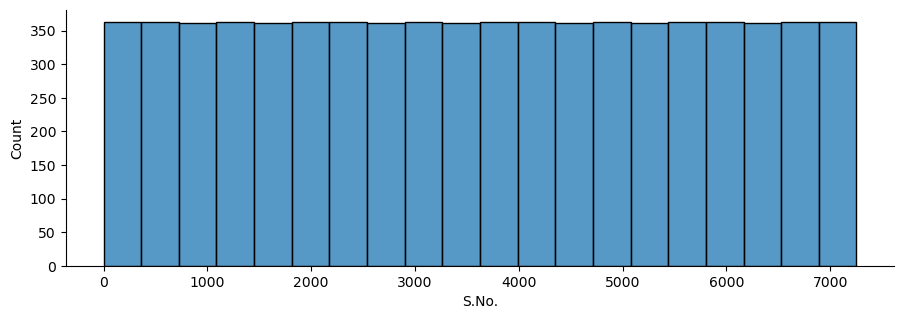

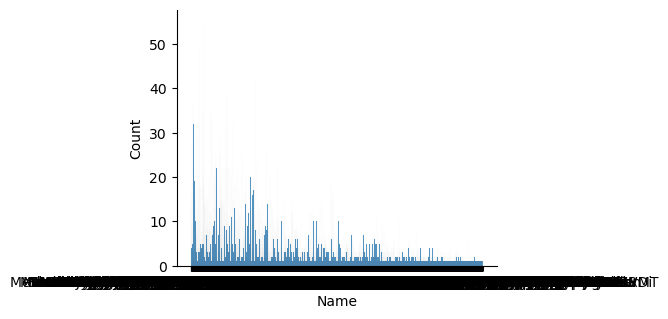

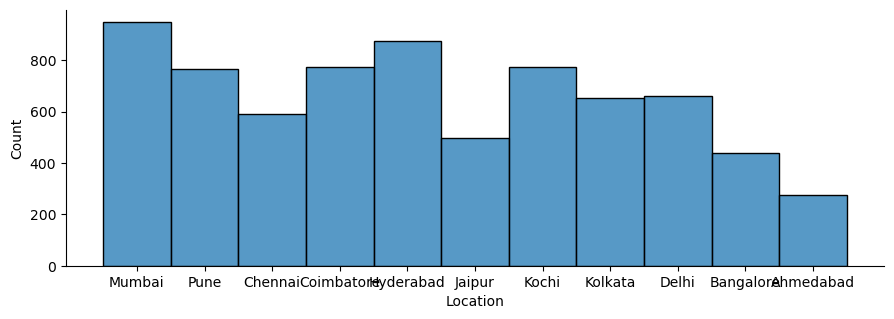

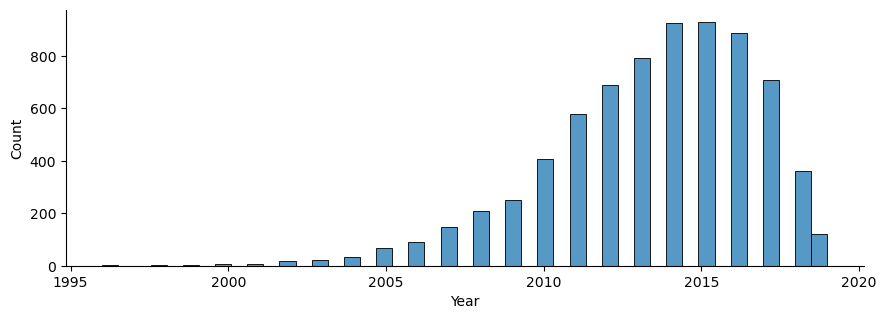

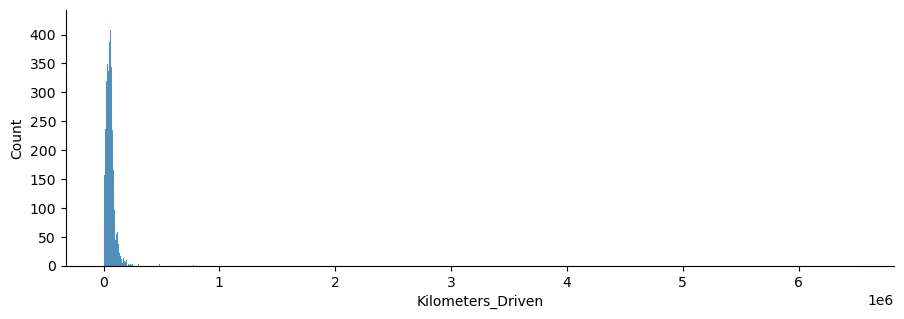

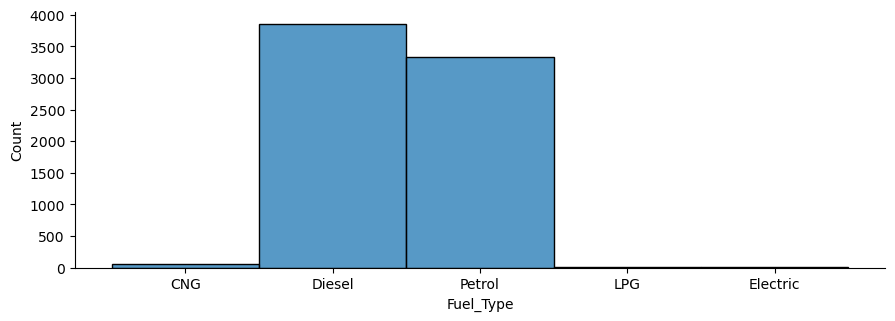

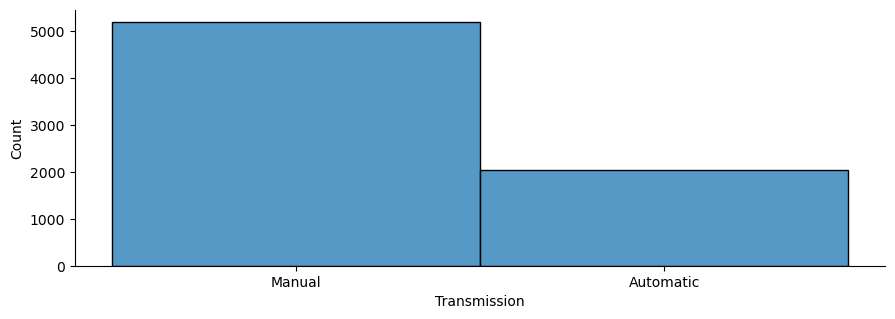

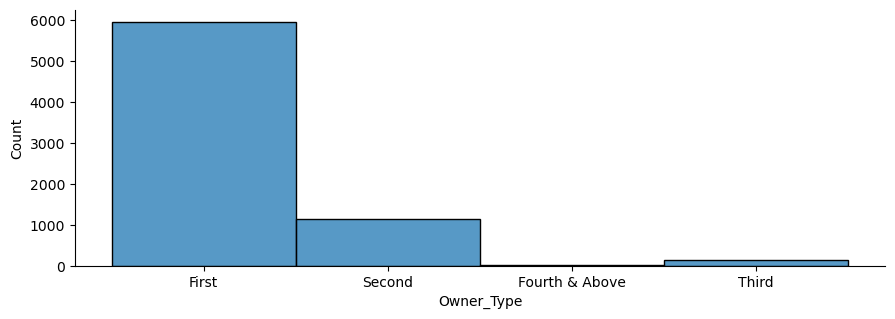

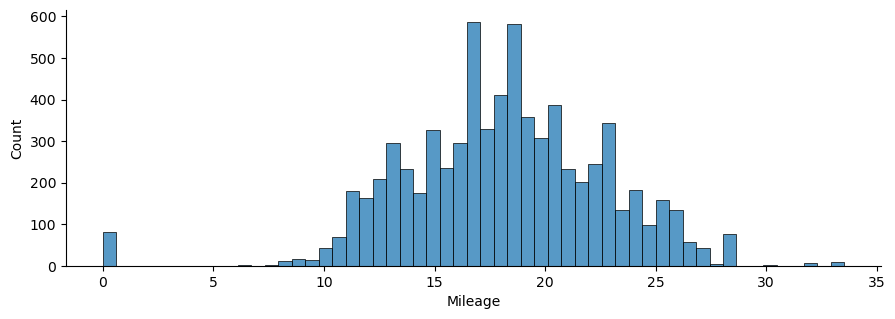

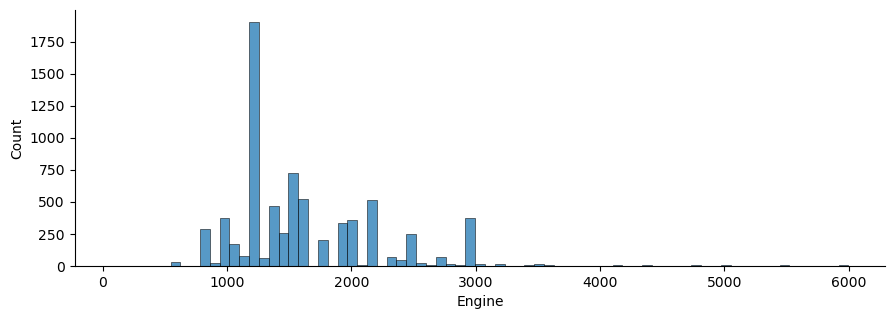

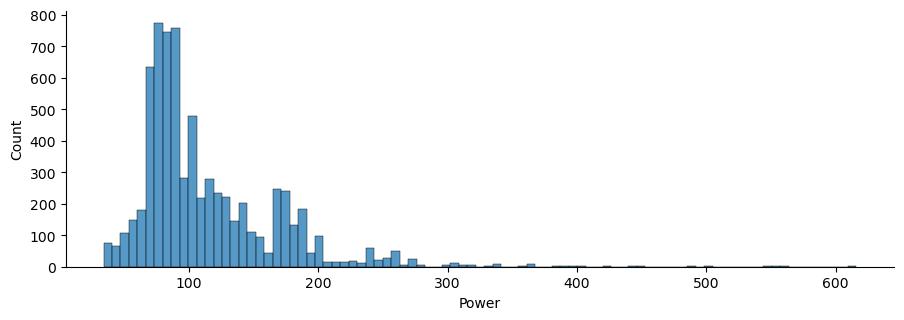

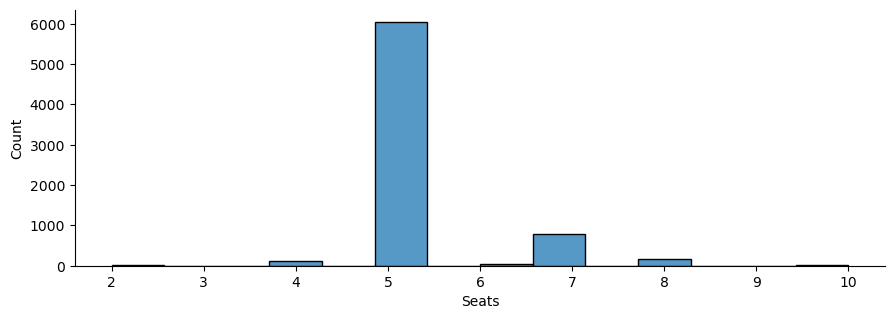

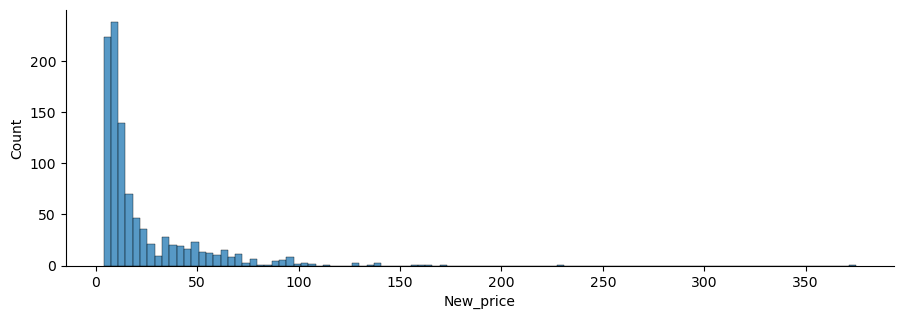

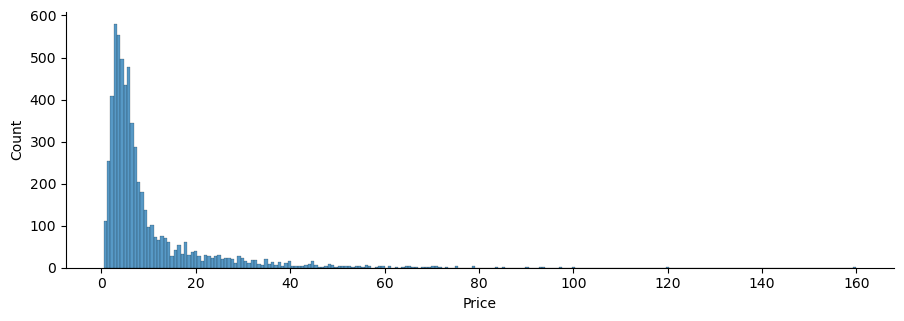

In [14]:
# A simple loop to plot histograms of all the variables.

for i, col in enumerate(cars_df.columns):
    ax = sns.displot(cars_df[col])
    plt.gcf().set_size_inches(10, 3)

**Observations**

- Most graph show high skewness. "Name" is obviously unreadable.

- Log transformations might help in some cases.

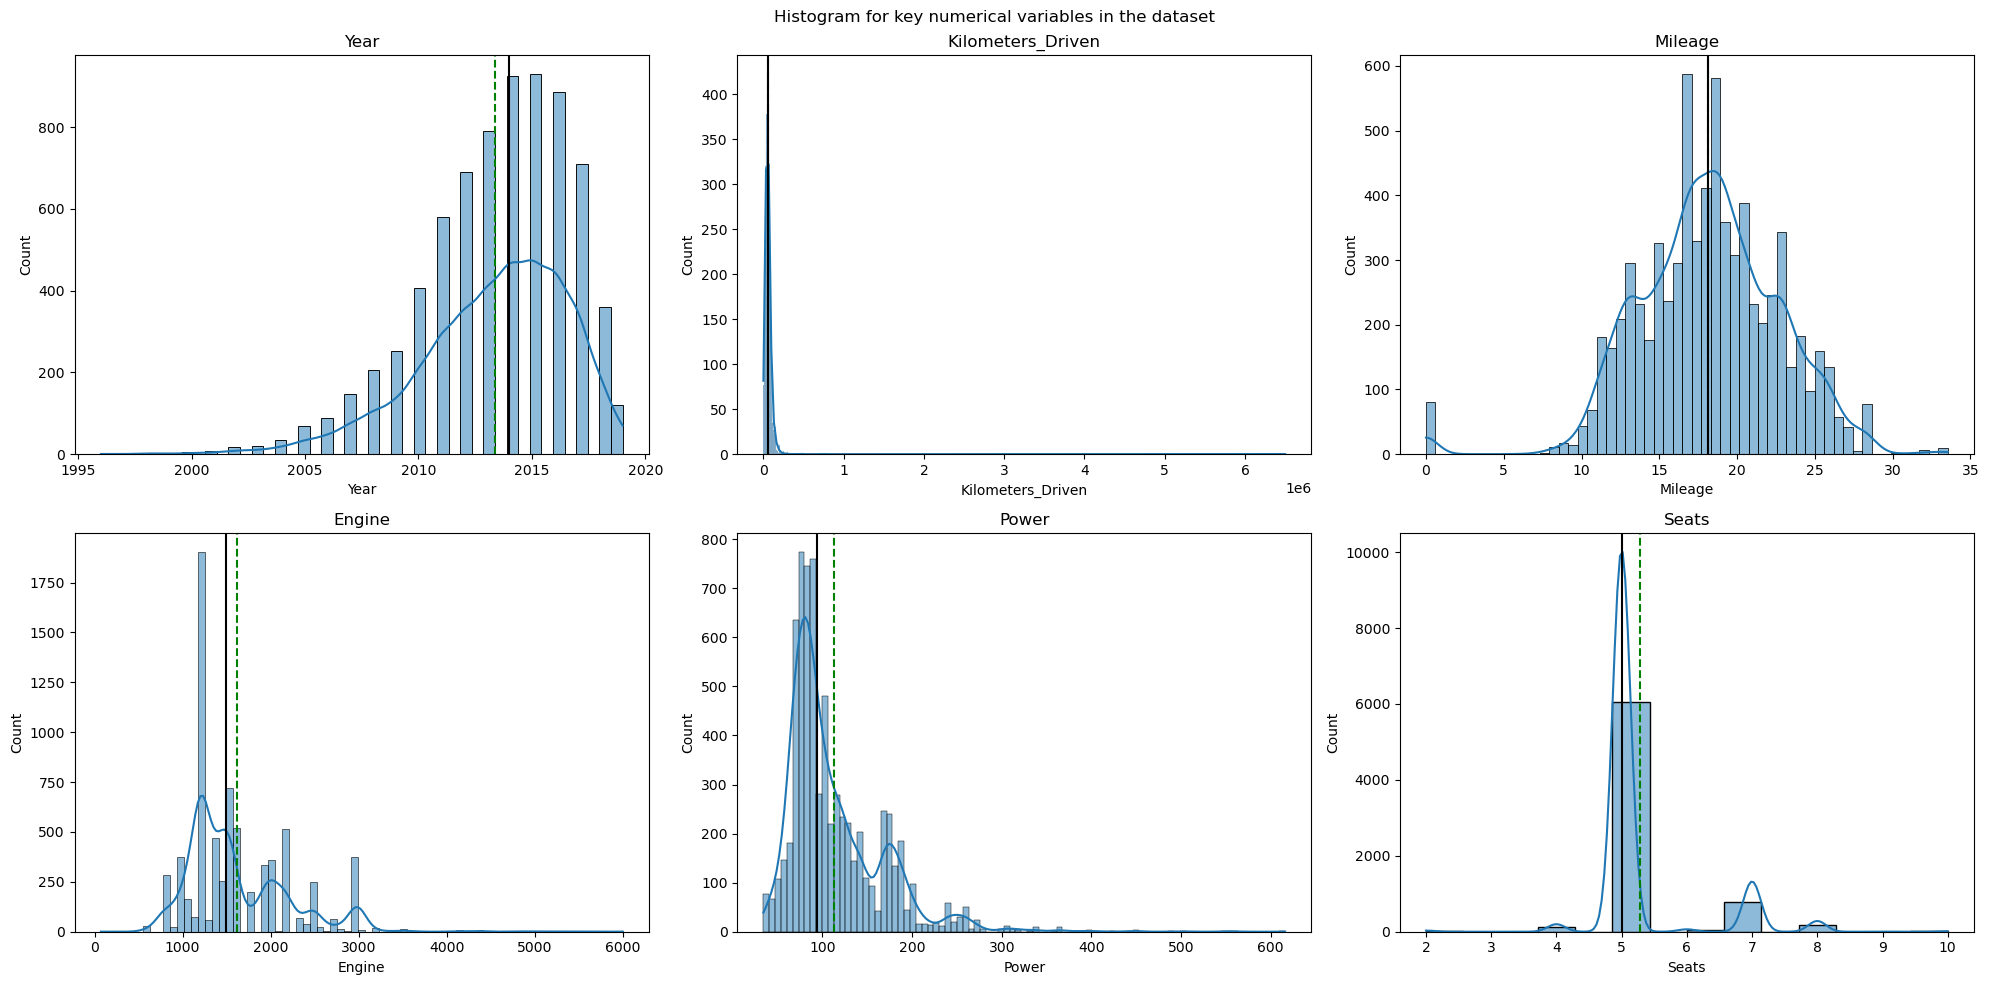

In [15]:
#Plotting some relevant histograms applying median and mean lines to each one.

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Histogram for key numerical variables in the dataset')

plot_titles = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']
plot_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']

for i, ax in enumerate(axes.flatten()):
    feature = plot_features[i]
    sns.histplot(x=feature, data=cars_df, kde=True, ax=ax)
    ax.set_title(plot_titles[i])
    ax.axvline(cars_df[feature].mean(), color="green", linestyle="--")
    ax.axvline(cars_df[feature].median(), color="black", linestyle="-")
    # Add mean and median to each histogram

plt.tight_layout()
plt.show()

**Observations**

- We can observe that most cars are between 4 and 7 years old.
- 'Kilometers_Driven' variable is incredibly skewed, the presence of an extreme outlier is evident.
- 'Mileage' is nearly normally distributed
- 'Engine' size, as expected, is farily standardized, due to regulations.
- 'Power' follows is positively skewed, with a similiar distribution to 'Engine', again, we intuitively know that engine size is directly correlated with the power output of an engine. It is likely that these two variable will be dropped for the model. 

S.No.
Skew : 0.0


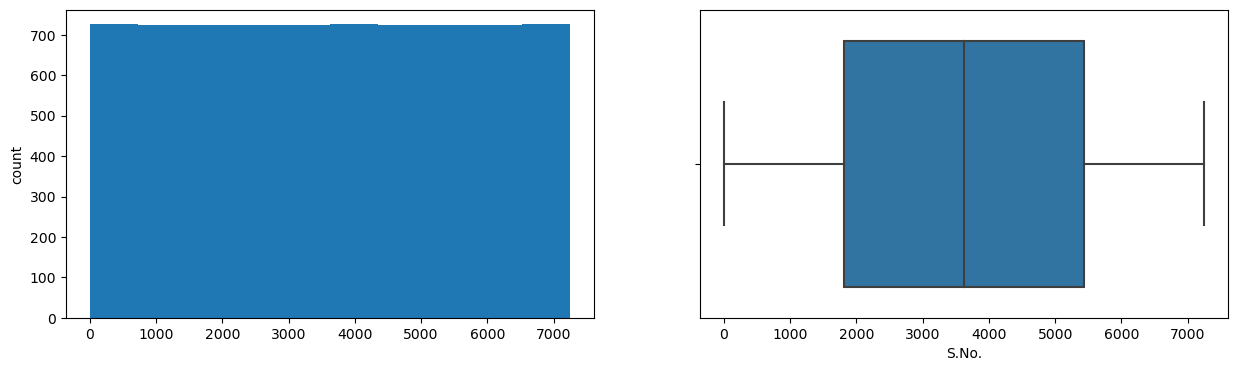

Year
Skew : -0.84


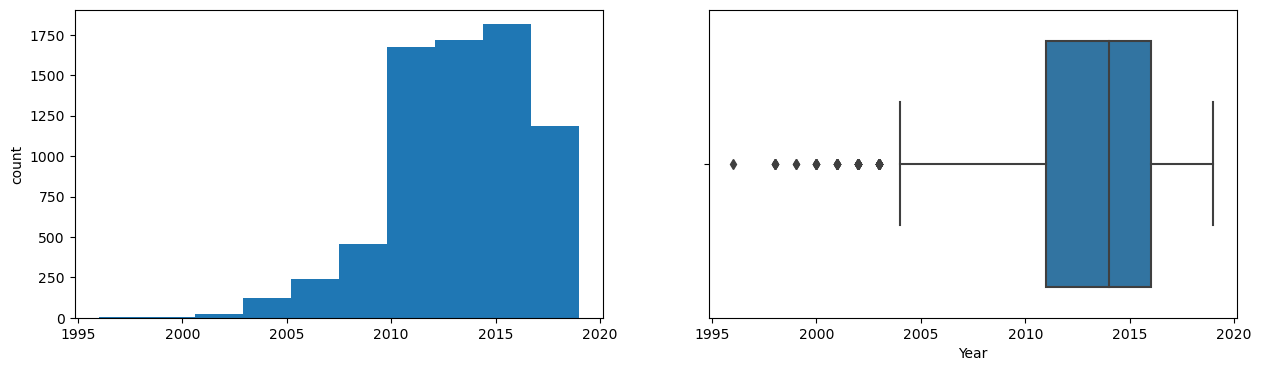

Kilometers_Driven
Skew : 61.58


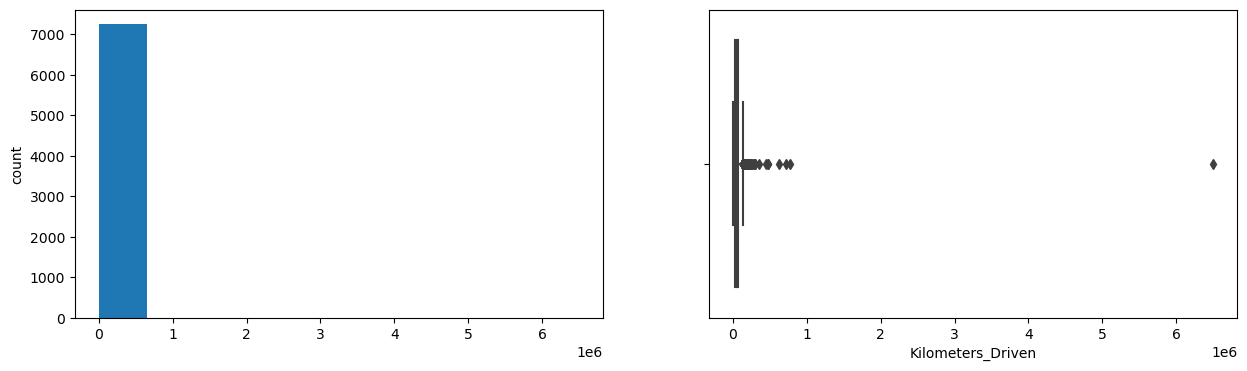

Mileage
Skew : -0.44


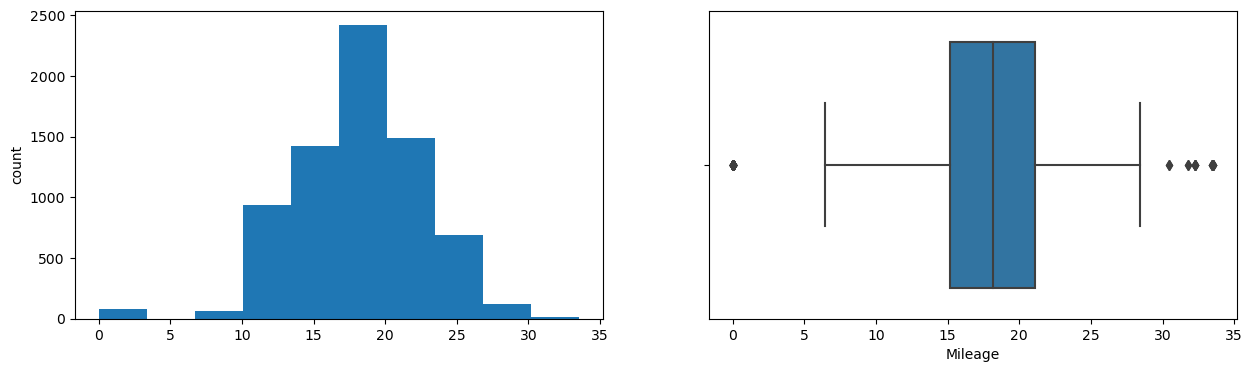

Engine
Skew : 1.41


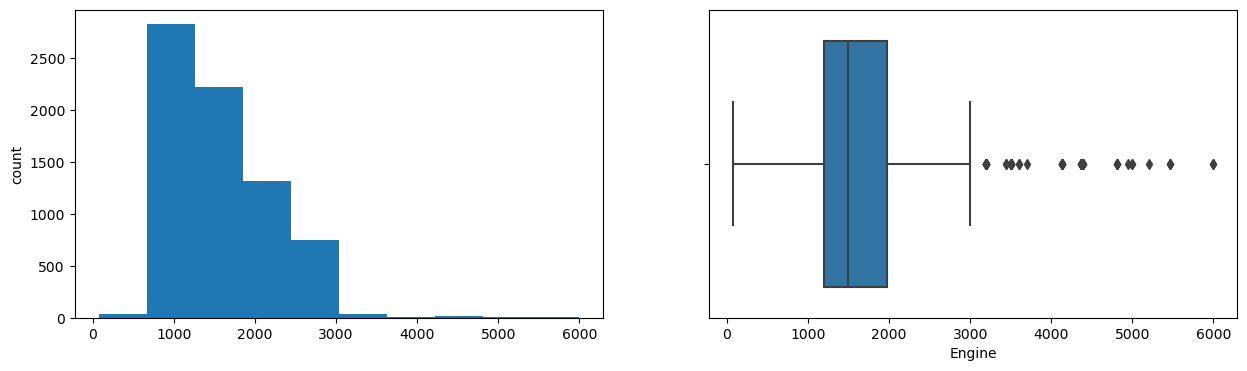

Power
Skew : 1.96


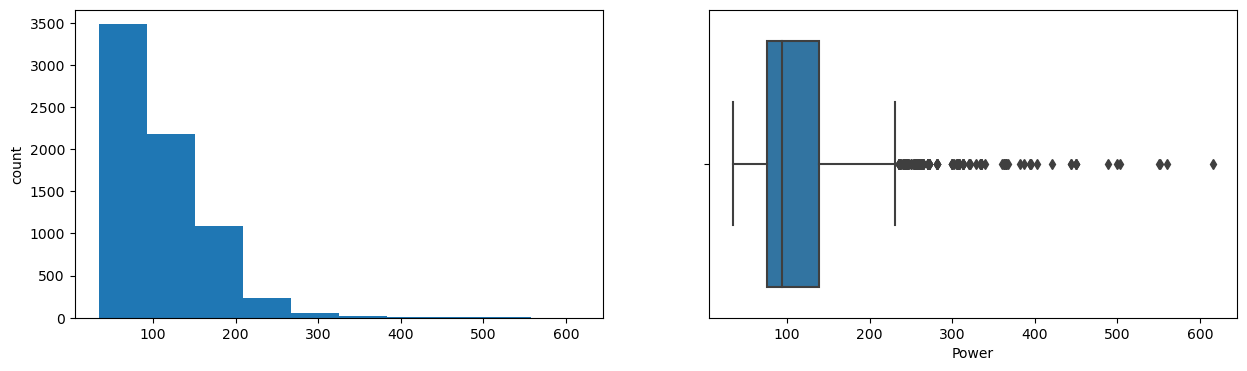

Seats
Skew : 1.96


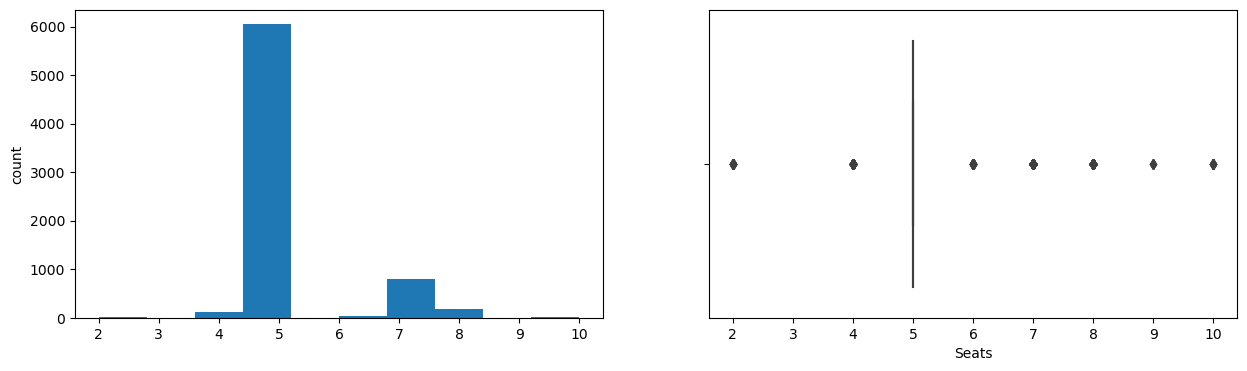

New_price
Skew : 4.13


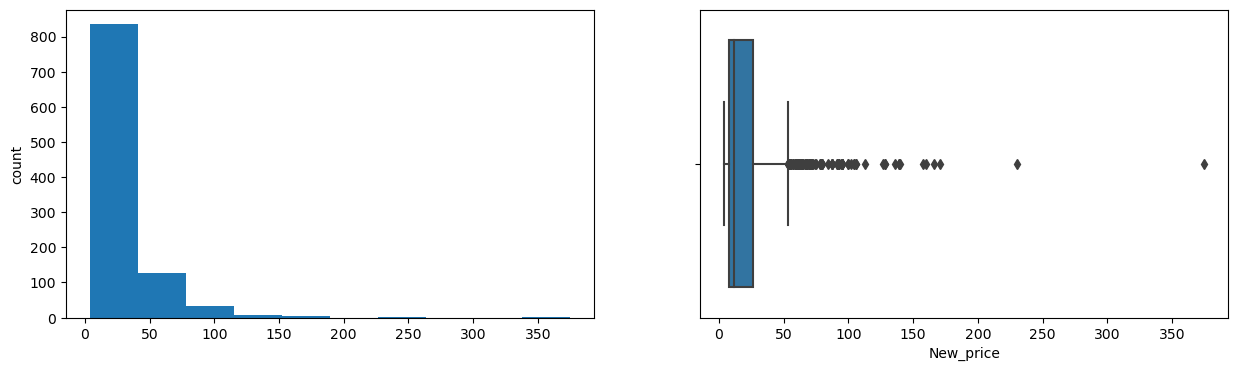

Price
Skew : 3.34


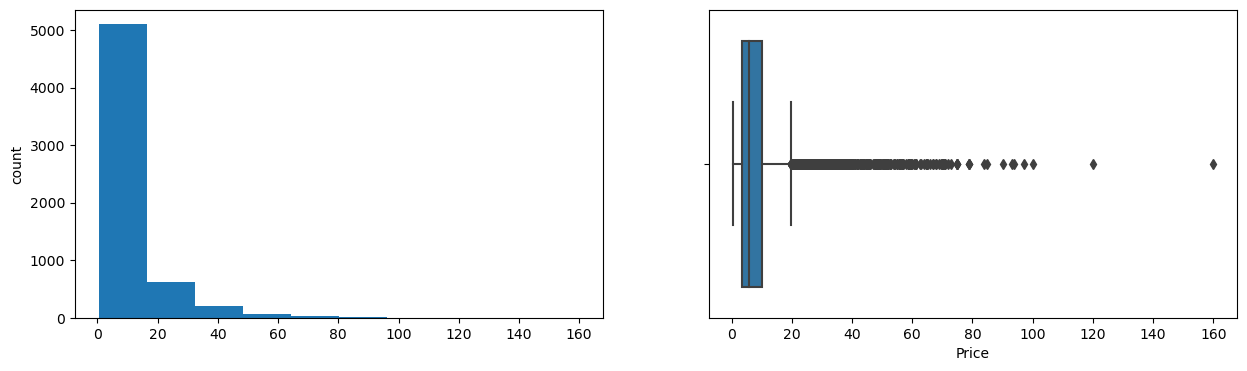

In [16]:
# Plotting some boxplots to identify possible outliers.

result = cars_df.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(cars_df[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    cars_df[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = cars_df[col])
    
    plt.show()

**Observations**

- It's pretty obvious that the variable "kilometers_driven" has an extreme outlier that is the product of an error, with over 6 million km, it's not a realistic value. 
We will drop this datapoint

- There is no need for the variable "S.No" in this analysis or model, so we will drop it.

- Most Features present a positive skewness indicating  not only the presence of outliers

In [17]:
# finding the 'kilometers_driven' outlier index value
cars_df.sort_values('Kilometers_Driven', ascending=False, na_position='last') 

S.No.                                             Name Location  Year  \
2328   2328                        BMW X5 xDrive 30d M Sport  Chennai  2017   
340     340           Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
1860   1860                 Volkswagen Vento Diesel Highline  Chennai  2013   
358     358                            Hyundai i10 Magna 1.2  Chennai  2009   
2823   2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai  2015   
...     ...                                              ...      ...   ...   
5339   5339           Hyundai i20 Active SX Dual Tone Petrol     Pune  2019   
1598   1598                             Tata Xenon XT EX 4X2   Jaipur  2017   
1242   1242                   Jaguar XE 2.0L Diesel Prestige    Delhi  2018   
5606   5606                       Maruti Wagon R ZXI AMT 1.2   Mumbai  2019   
1361   1361                    Maruti Alto 800 2016-2019 VXI   Mumbai  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2328            6500000    Diesel    Automatic      First    15.97  2993.0   
340              775000    Diesel    Automatic      First    19.30  1968.0   
1860             720000    Diesel       Manual      First    20.54  1598.0   
358              620000    Petrol       Manual      First    20.36  1197.0   
2823             480000    Diesel    Automatic      First    16.96  1968.0   
...                 ...       ...          ...        ...      ...     ...   
5339               1000    Petrol       Manual      First    17.19  1197.0   
1598               1000    Diesel       Manual      First    13.49  2179.0   
1242               1000    Diesel    Automatic      First    13.60  1999.0   
5606                600    Petrol    Automatic      First    21.50  1197.0   
1361                171    Petrol       Manual      First    24.70   796.0   

       Power  Seats  New_price  Price  
2328  258.00    5.0        NaN  65.00  
340   141.00    5.0        NaN   7.50  
1860  103.60    5.0        NaN   5.90  
358    78.90    5.0        NaN   2.70  
2823  138.03    5.0        NaN  13.00  
...      ...    ...        ...    ...  
5339   81.86    5.0      10.25   8.60  
1598  138.03    5.0        NaN   7.50  
1242  177.00    5.0      52.77  40.00  
5606   81.80    5.0       6.80   6.25  
1361   47.30    5.0        NaN   3.60  

[7253 rows x 14 columns]

In [18]:
# Dropping the extreme outlier in 'Kilometers_driven' and the whole 'S.No.' column creating a new DF.
cars_df_0 = cars_df.drop(labels=[2328], axis=0).drop(columns=['S.No.'], axis=1)

In [19]:
# Checking the new dataset without the outlier and the S.No. column
cars_df_0.sort_values('Kilometers_Driven', ascending=False, na_position='last') 

Name Location  Year  \
340            Skoda Octavia Ambition Plus 2.0 TDI AT  Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline  Chennai  2013   
358                             Hyundai i10 Magna 1.2  Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT  Chennai  2015   
3092                             Honda City i VTEC SV  Kolkata  2015   
...                                               ...      ...   ...   
2054                           Maruti Ignis 1.2 Alpha   Mumbai  2017   
2646       Ford Figo 2015-2019 1.2P Sports Edition MT   Mumbai  2019   
1598                             Tata Xenon XT EX 4X2   Jaipur  2017   
5606                       Maruti Wagon R ZXI AMT 1.2   Mumbai  2019   
1361                    Maruti Alto 800 2016-2019 VXI   Mumbai  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
340              775000    Diesel    Automatic      First    19.30  1968.0   
1860             720000    Diesel       Manual      First    20.54  1598.0   
358              620000    Petrol       Manual      First    20.36  1197.0   
2823             480000    Diesel    Automatic      First    16.96  1968.0   
3092             480000    Petrol       Manual      First    17.40  1497.0   
...                 ...       ...          ...        ...      ...     ...   
2054               1000    Petrol       Manual      First    20.89  1197.0   
2646               1000    Petrol       Manual      First    18.12  1196.0   
1598               1000    Diesel       Manual      First    13.49  2179.0   
5606                600    Petrol    Automatic      First    21.50  1197.0   
1361                171    Petrol       Manual      First    24.70   796.0   

       Power  Seats  New_price  Price  
340   141.00    5.0        NaN   7.50  
1860  103.60    5.0        NaN   5.90  
358    78.90    5.0        NaN   2.70  
2823  138.03    5.0        NaN  13.00  
3092  117.30    5.0        NaN   5.00  
...      ...    ...        ...    ...  
2054   81.80    5.0       7.87   6.36  
2646   86.80    5.0        NaN   6.80  
1598  138.03    5.0        NaN   7.50  
5606   81.80    5.0       6.80   6.25  
1361   47.30    5.0        NaN   3.60  

[7252 rows x 13 columns]

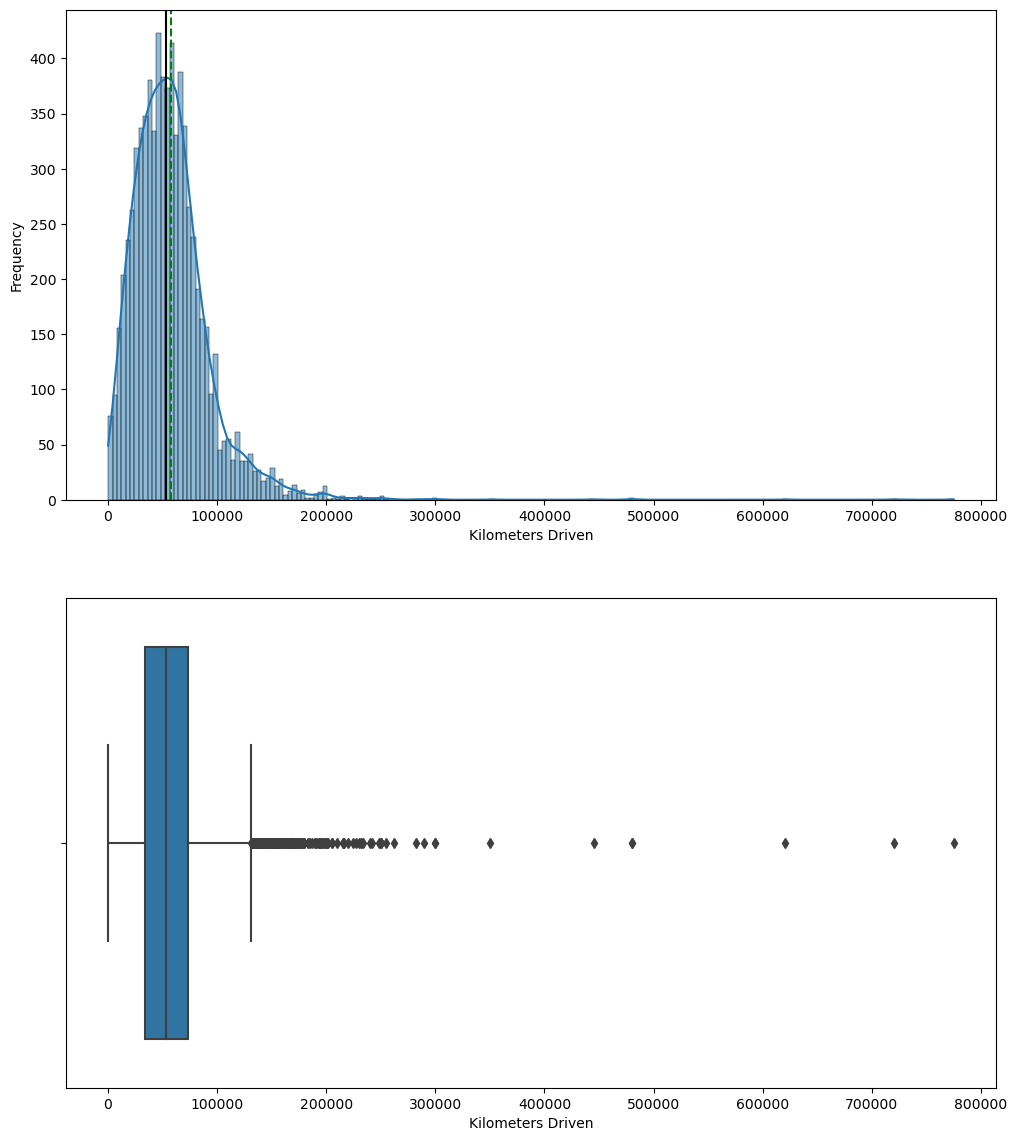

In [20]:
# Replotting some the histograms for 'Kilometers_driven' applying median and mean lines to each one.


fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Histogram
sns.histplot(x='Kilometers_Driven', data=cars_df_0, kde=True, ax=axes[0])
axes[0].axvline(cars_df_0['Kilometers_Driven'].mean(), color="green", linestyle="--")
axes[0].axvline(cars_df_0['Kilometers_Driven'].median(), color="black", linestyle="-")
axes[0].set_xlabel('Kilometers Driven')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x='Kilometers_Driven', data=cars_df_0, ax=axes[1])
axes[1].set_xlabel('Kilometers Driven')
axes[1].set_ylabel('')

plt.show()

**Observations**

- The extreme outlier significantly reduced the range of the feature, however, we can still observe some significant outliers. We shall deal with this in feature engineering.

### Further dealing with "Kilometers_driven" outliers

In [21]:
# Calculate mean and standard deviation
mean = np.mean(cars_df_0['Kilometers_Driven'])
std_dev = np.std(cars_df_0['Kilometers_Driven'])

# Calculate z-scores for each data point
z_scores = (cars_df_0['Kilometers_Driven'] - mean) / std_dev

z_scores

0       0.378408
1      -0.448326
2      -0.314982
3       0.778441
4      -0.457127
          ...   
7248    0.842739
7249    0.031713
7250   -0.795021
7251   -0.147981
7252    0.390222
Name: Kilometers_Driven, Length: 7252, dtype: float64

In [22]:
# Set the threshold for z-scores, a very strict threshold so that we are certain that only extreme values are selected.
threshold = 7

# Create a Boolean mask for outliers
outliers_mask_z = z_scores > threshold

# Filter the dataset to isolate the outliers
outliers_z = cars_df_0[outliers_mask_z]

In [23]:
outliers_z  

Name   Location  Year  \
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
358                             Hyundai i10 Magna 1.2    Chennai  2009   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
3092                             Honda City i VTEC SV    Kolkata  2015   
4491                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
6921                      Maruti Swift Dzire Tour LDI     Jaipur  2012   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
340              775000    Diesel    Automatic      First    19.30  1968.0   
358              620000    Petrol       Manual      First    20.36  1197.0   
1860             720000    Diesel       Manual      First    20.54  1598.0   
2823             480000    Diesel    Automatic      First    16.96  1968.0   
3092             480000    Petrol       Manual      First    17.40  1497.0   
4491             445000    Petrol       Manual      First    18.50  1197.0   
6921             350000    Diesel       Manual      First    23.40  1248.0   

       Power  Seats  New_price  Price  
340   141.00    5.0        NaN   7.50  
358    78.90    5.0        NaN   2.70  
1860  103.60    5.0        NaN   5.90  
2823  138.03    5.0        NaN  13.00  
3092  117.30    5.0        NaN   5.00  
4491   82.90    5.0        NaN   4.45  
6921   74.00    5.0        NaN    NaN

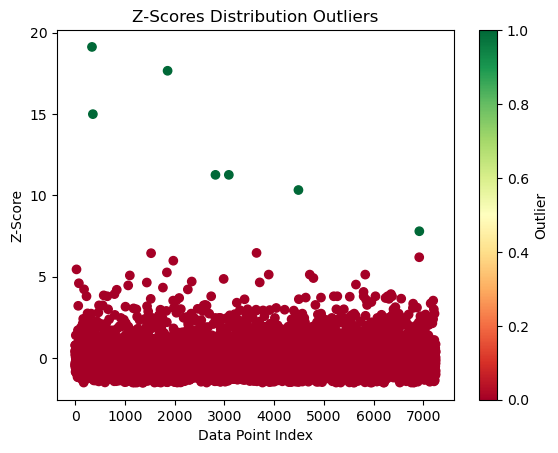

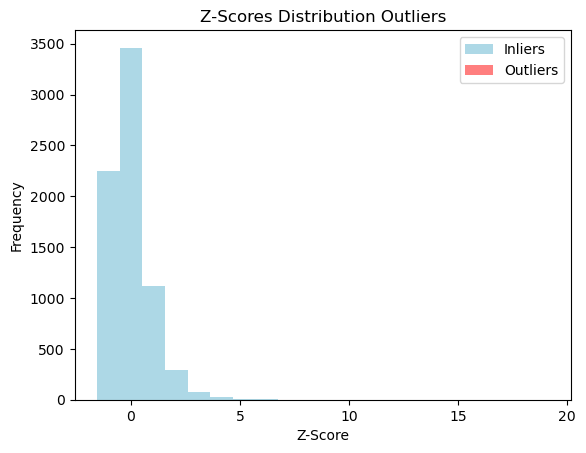

In [24]:
# Plot a scatter plot of z-scores with outliers highlighted
plt.scatter(range(len(z_scores)), z_scores, c=outliers_mask_z, cmap='RdYlGn')
plt.xlabel('Data Point Index')
plt.ylabel('Z-Score')
plt.title('Z-Scores Distribution Outliers')
plt.colorbar(label='Outlier')
plt.show()

# Plot a histogram of z-scores with outliers highlighted
plt.hist(z_scores, bins=20, color='lightblue')
plt.hist(z_scores[outliers_mask_z], bins=20, color='red', alpha=0.5)
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Z-Scores Distribution Outliers')
plt.legend(['Inliers', 'Outliers'])
plt.show()

In [25]:
# Perform a one-sample t-test to test if the z-scores significantly deviate from zero
t_statistic, p_value = ttest_1samp(z_scores, 0)

# Print the t-statistic and p-value
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: -5.423063847746525e-16
P-Value: 0.9999999999999996


### Using the Isolation Forest for the same purpose of detecting outliers

In [26]:
# Create an instance of Isolation Forest
isolation_forest = IsolationForest(contamination=0.001)  # Adjust the contamination parameter as needed

# Fit the Isolation Forest model
isolation_forest.fit(cars_df_0[['Kilometers_Driven']])

# Predict outliers
outliers_if = isolation_forest.predict(cars_df_0[['Kilometers_Driven']])

# Create a Boolean mask for outliers
outliers_mask_if = outliers_if == -1

# Filter the dataset to isolate the outliers
outliers_if_df = cars_df_0[outliers_mask_if]

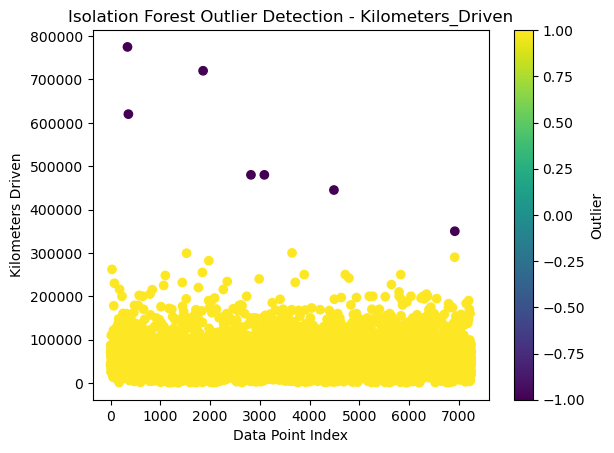

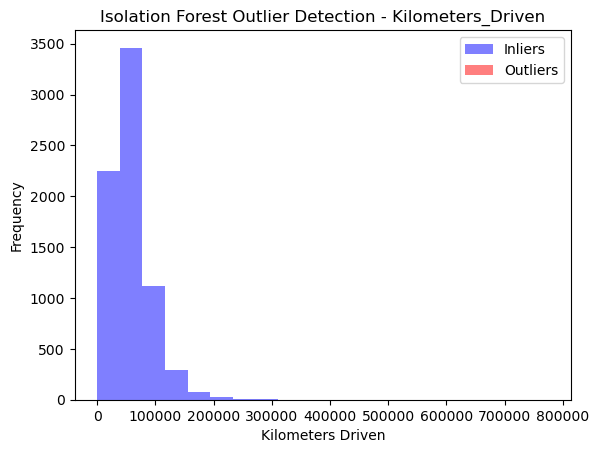

In [27]:
# Scatter plot of Isolation Forest predictions
plt.scatter(range(len(cars_df_0)), cars_df_0['Kilometers_Driven'], c=outliers_if, cmap='viridis')
plt.xlabel('Data Point Index')
plt.ylabel('Kilometers Driven')
plt.title('Isolation Forest Outlier Detection - Kilometers_Driven')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions
plt.hist(cars_df_0['Kilometers_Driven'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_0['Kilometers_Driven'][outliers_mask_if], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - Kilometers_Driven')
plt.legend()
plt.show()

**Observations:**

- The isolation forest method allows for a great visualization of the outliers with a simple to execute yet powerful method.

- Using a very strict threshold, we can determine 7 outliers that fall over 7 standard deviations from the mean and can be dropped for the purpose of this project. But we will also test the model with the inclusion of these data points further ahead to test their impact.

Skew : 3.34


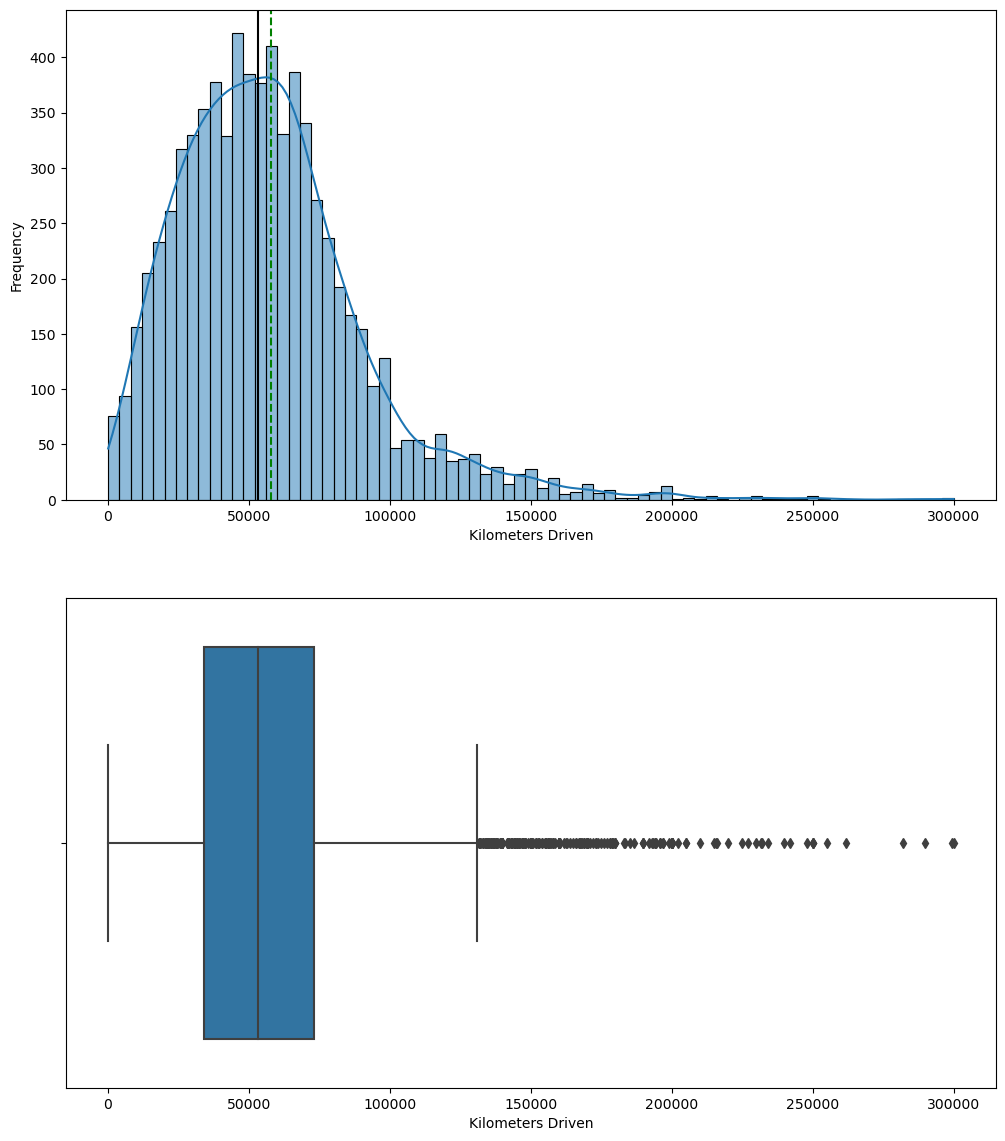

In [28]:
# Dropping the extreme outlier in 'Kilometers_driven' and the whole 'S.No.' column creating a new DF.
cars_df_1 = cars_df_0.drop(labels=[340, 358, 1860, 2823, 3092, 4491, 6921], axis=0)

# Replotting the histograms for 'Kilometers_driven' applyafter dropping the new outliers

fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Histogram
sns.histplot(x='Kilometers_Driven', data=cars_df_1, kde=True, ax=axes[0])
print('Skew :',round(cars_df[col].skew(),2))
axes[0].axvline(cars_df_0['Kilometers_Driven'].mean(), color="green", linestyle="--")
axes[0].axvline(cars_df_0['Kilometers_Driven'].median(), color="black", linestyle="-")
axes[0].set_xlabel('Kilometers Driven')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x='Kilometers_Driven', data=cars_df_1, ax=axes[1])
axes[1].set_xlabel('Kilometers Driven')
axes[1].set_ylabel('')

plt.show()

**Observations:**

- We went from a skewness of **61.58** to **3.34**.
- We can perform a log transformation if we want to increase the normality of the data.

### Performing the same analysis on the other numerical variables and inputing missing values
- First we need to deal with the null vlaues.

<AxesSubplot:>

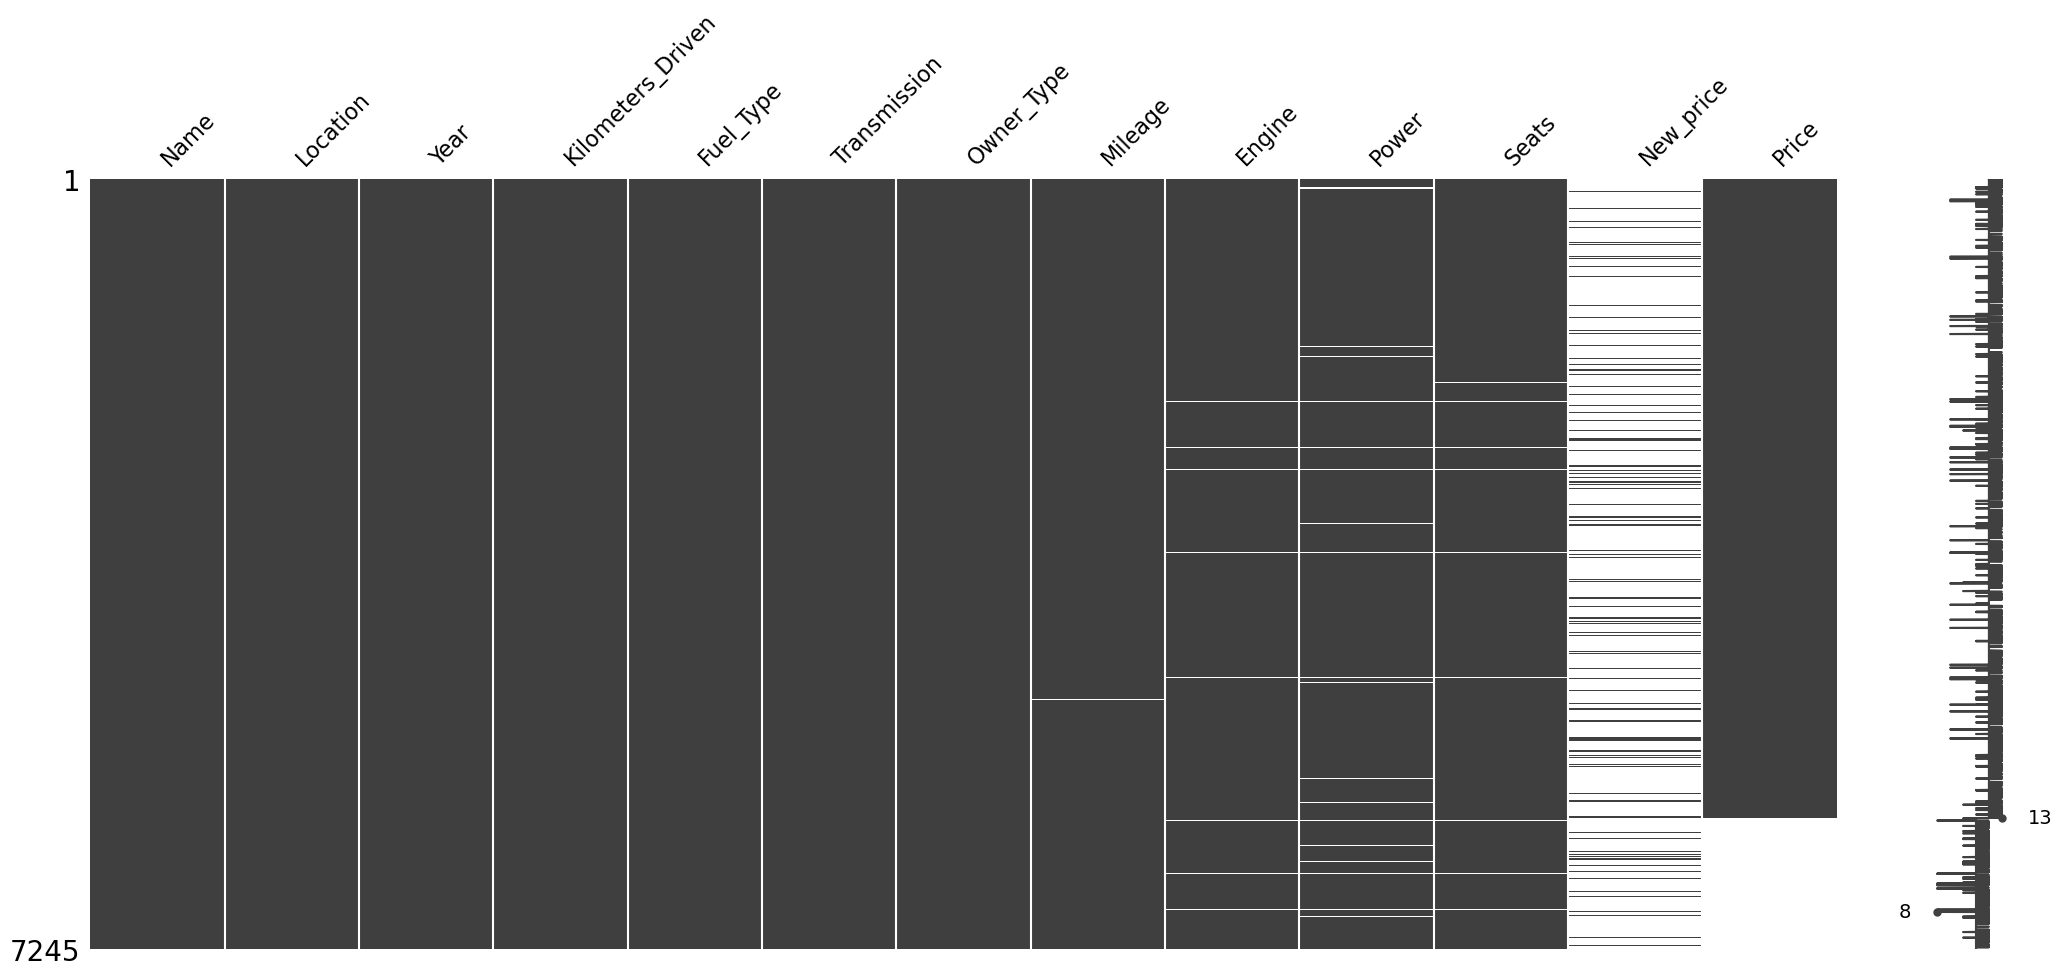

In [29]:
# using missingno to vizualise the nulls pattern along the data.

import missingno as msno

msno.matrix(cars_df_1)

**Observations**

- A very interesting way of looking for null values and their correlation. We can see the random distribution of outliers in "New_Price" and the complete lack of values for "Price" after a certain index number.

<AxesSubplot:>

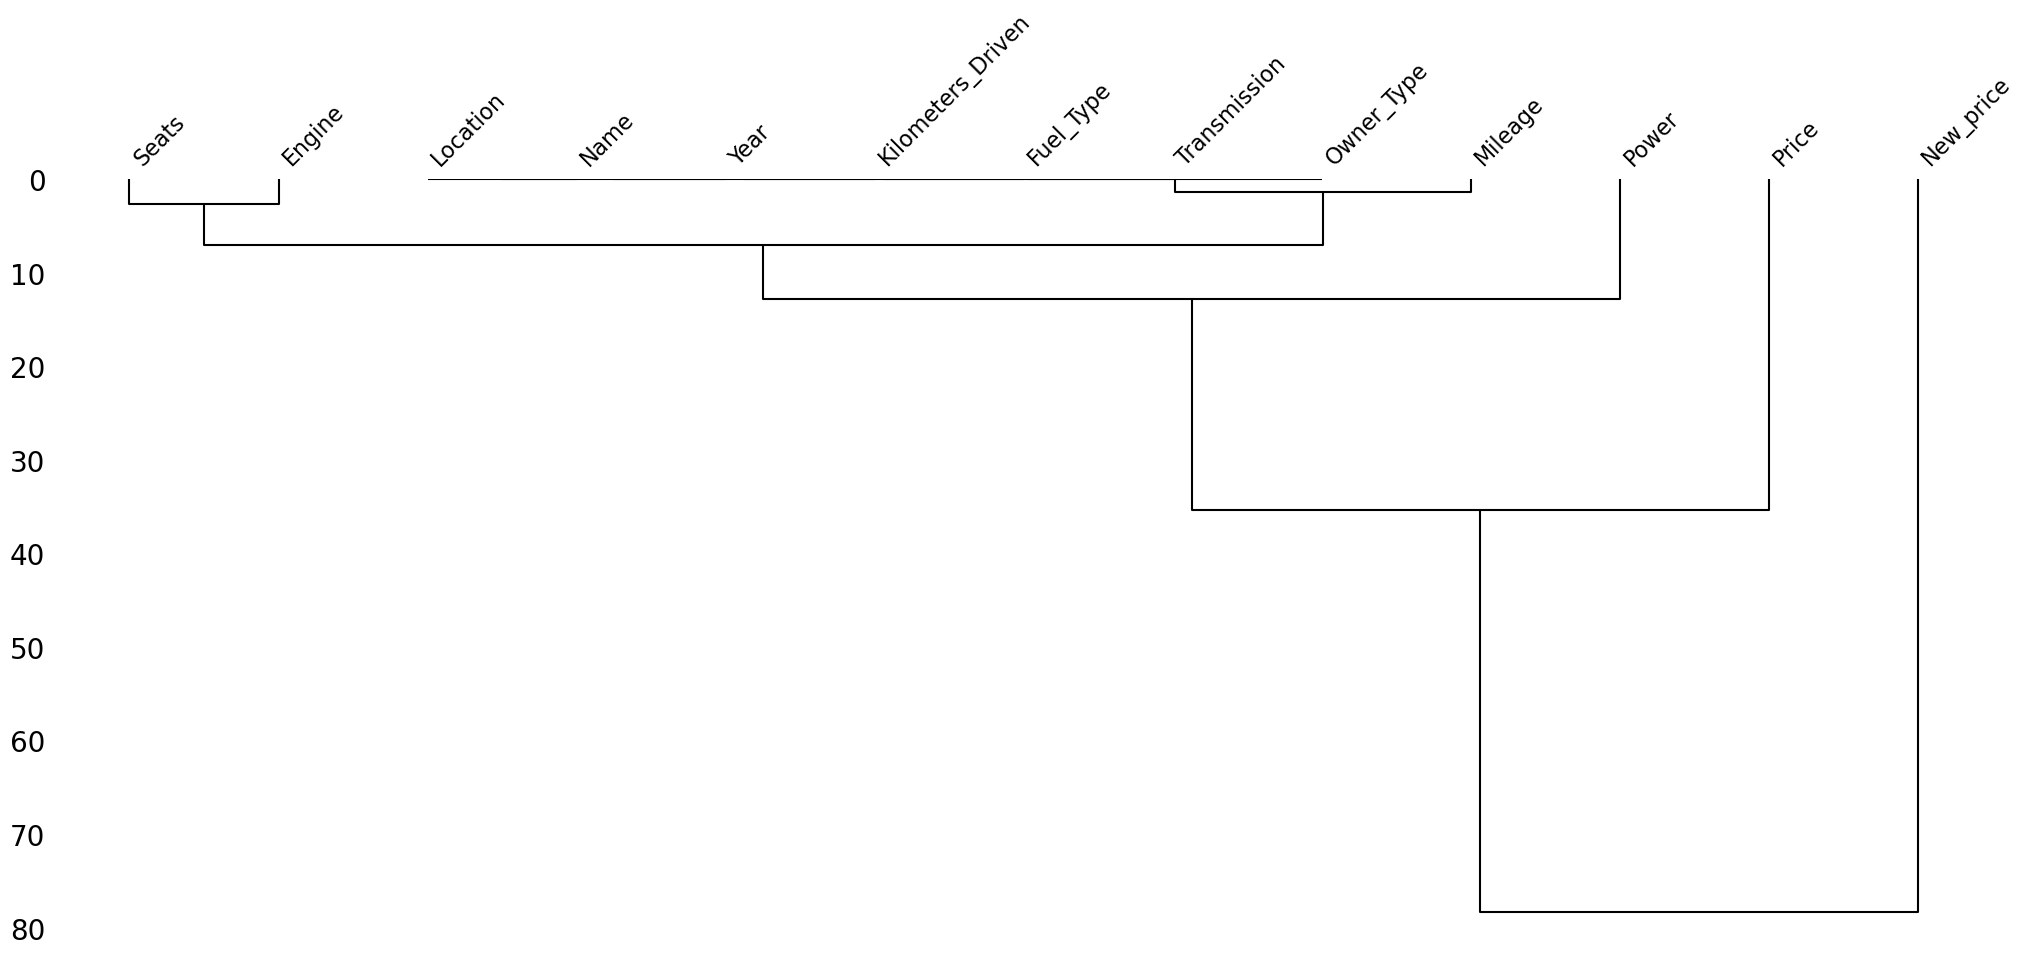

In [30]:
# using missingno to create a dendogram that shows the correlation of the nulls.

msno.dendrogram(cars_df_1)

In [31]:
# Reseting index in order to update the dropped rows.
cars_df_1 = cars_df_1.reset_index(drop = True)

In [32]:
# Imputing the missing values with KNNImputer

#Define a subset of the dataset
cars_df_2 = cars_df_1.filter(['Mileage','Engine','Power','Seats', 'New_price'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
cars_df_Scaled = pd.DataFrame(scaler.fit_transform(cars_df_2), columns = cars_df_2.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
cars_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(cars_df_Scaled), columns=cars_df_Scaled.columns)

# Inverse transform the scaled data
cars_knn_imputed_original = pd.DataFrame(scaler.inverse_transform(cars_knn_imputed),
columns=cars_knn_imputed.columns)

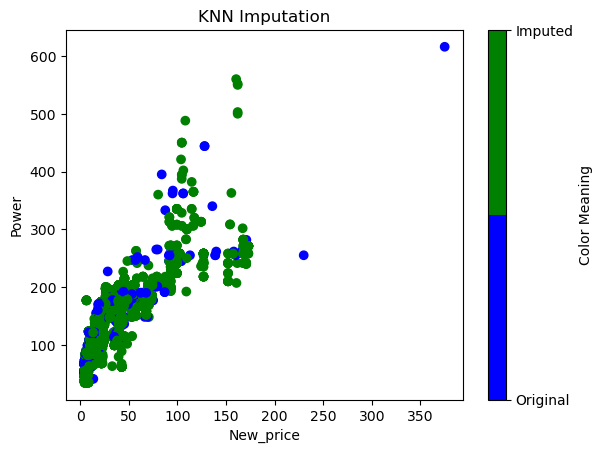

In [33]:
#plotting the comparison between imputed and original values

from matplotlib.colors import ListedColormap

# Define custom colormap
cmap = ListedColormap(['blue', 'green'])

# Create scatter plot
fig, ax = plt.subplots()
null_values = cars_df_Scaled['New_price'].isnull()
scatter_plot = ax.scatter(x='New_price', y='Power', data=cars_knn_imputed_original,
                          c=null_values, cmap=cmap)

# Add colorbar with legend
colorbar = plt.colorbar(scatter_plot, ticks=[0, 1])
colorbar.set_ticklabels(['Original', 'Imputed'])
colorbar.set_label('Color Meaning')

plt.title('KNN Imputation')
plt.xlabel('New_price')
plt.ylabel('Power')

plt.show()

Skew : 3.34
Skew : 3.34


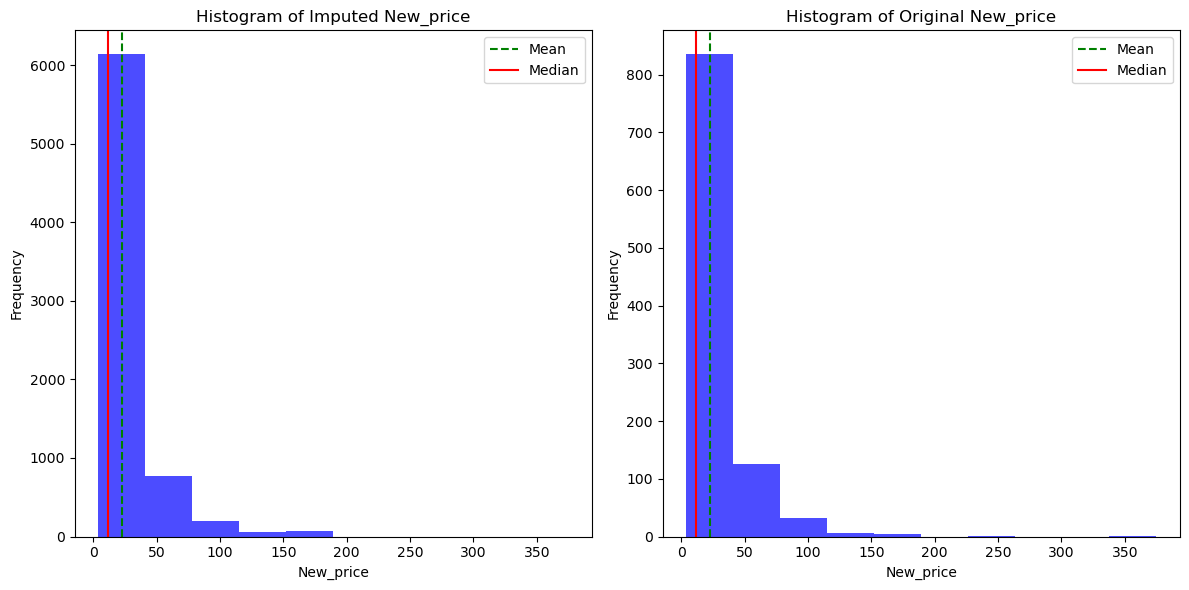

In [34]:
# Plotting to histograms to check the distribution of the original data vs the imputed data in the "New_Price" variable. 
#it is still faithful to the original.

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of imputed values
axes[0].hist(cars_knn_imputed_original['New_price'], alpha= 0.7, color='blue')
print('Skew :',round(cars_df_0[col].skew(),2))
axes[0].axvline(cars_knn_imputed_original['New_price'].mean(), color='green', linestyle='--', label='Mean')
axes[0].axvline(cars_knn_imputed_original['New_price'].median(), color='red', linestyle='-', label='Median')
axes[0].set_xlabel('New_price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Imputed New_price')
axes[0].legend()

# Histogram of original values
axes[1].hist(cars_df['New_price'], alpha= 0.7, color='blue')
print('Skew :',round(cars_df_0[col].skew(),2))
axes[1].axvline(cars_df['New_price'].mean(), color='green', linestyle='--', label='Mean')
axes[1].axvline(cars_df['New_price'].median(), color='red', linestyle='-', label='Median')
axes[1].set_xlabel('New_price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Original New_price')
axes[1].legend()

plt.tight_layout()
plt.show()

**Observations** 

We can see that the original distribution remais the same and that we succesfully inputed reasonable values to the columns "New_Price"

In [35]:
cars_knn_imputed_original.head()

Mileage  Engine   Power  Seats  New_price
0    26.60   998.0   58.16    5.0      5.236
1    19.67  1582.0  126.20    5.0     18.392
2    18.20  1199.0   88.70    5.0      8.610
3    20.77  1248.0   88.76    7.0     11.692
4    15.20  1968.0  140.80    5.0     22.518

In [36]:
# starting the process of merging the imputed dataset into the original dataset
#First we will create a new dataset withouth the new imputed values.
cars_df_3 = cars_df_1.drop('Mileage Engine Power Seats New_price'.split(), axis = 1)

In [37]:
#Checking the varaibles in the new dataset.
cars_df_3

Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7240                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7241                             Volkswagen Polo GT TSI      Mumbai  2015   
7242                             Nissan Micra Diesel XV     Kolkata  2012   
7243                             Volkswagen Polo GT TSI        Pune  2013   
7244  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Price  
0                 72000       CNG       Manual      First   1.75  
1                 41000    Diesel       Manual      First  12.50  
2                 46000    Petrol       Manual      First   4.50  
3                 87000    Diesel       Manual      First   6.00  
4                 40670    Diesel    Automatic     Second  17.74  
...                 ...       ...          ...        ...    ...  
7240              89411    Diesel       Manual      First    NaN  
7241              59000    Petrol    Automatic      First    NaN  
7242              28000    Diesel       Manual      First    NaN  
7243              52262    Petrol    Automatic      Third    NaN  
7244              72443    Diesel    Automatic      First    NaN  

[7245 rows x 8 columns]

In [38]:
#Merging the imputed data into the new dataset using the original index.
cars_df_3 = cars_df_3.merge(cars_knn_imputed_original, left_index = True, right_index = True, how = 'left')

In [39]:
# cheking the final dataset withouth nulls. (except for "price")
cars_df_3

Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7240                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7241                             Volkswagen Polo GT TSI      Mumbai  2015   
7242                             Nissan Micra Diesel XV     Kolkata  2012   
7243                             Volkswagen Polo GT TSI        Pune  2013   
7244  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Price  Mileage  \
0                 72000       CNG       Manual      First   1.75    26.60   
1                 41000    Diesel       Manual      First  12.50    19.67   
2                 46000    Petrol       Manual      First   4.50    18.20   
3                 87000    Diesel       Manual      First   6.00    20.77   
4                 40670    Diesel    Automatic     Second  17.74    15.20   
...                 ...       ...          ...        ...    ...      ...   
7240              89411    Diesel       Manual      First    NaN    20.54   
7241              59000    Petrol    Automatic      First    NaN    17.21   
7242              28000    Diesel       Manual      First    NaN    23.08   
7243              52262    Petrol    Automatic      Third    NaN    17.20   
7244              72443    Diesel    Automatic      First    NaN    10.00   

      Engine   Power  Seats  New_price  
0      998.0   58.16    5.0      5.236  
1     1582.0  126.20    5.0     18.392  
2     1199.0   88.70    5.0      8.610  
3     1248.0   88.76    7.0     11.692  
4     1968.0  140.80    5.0     22.518  
...      ...     ...    ...        ...  
7240  1598.0  103.60    5.0     13.166  
7241  1197.0  103.60    5.0     11.254  
7242  1461.0   63.10    5.0      9.292  
7243  1197.0  103.60    5.0     11.254  
7244  2148.0  170.00    5.0     68.014  

[7245 rows x 13 columns]

#### Dealing with the remaining nulls present in the "Price" column

In [40]:
cars_df_3.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Price                1233
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_price               0
dtype: int64

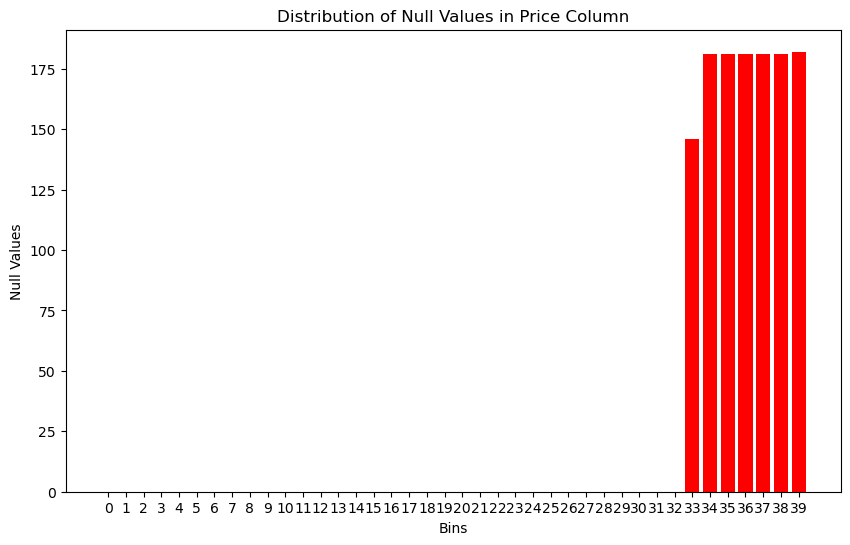

In [41]:
# Count the number of null values at each index
null_counts = cars_df_3['Price'].isnull().sum()

# Set the number of bins for binning the indices
num_bins = 40

# Bin the indices
bins = np.linspace(0, len(cars_df_3), num_bins + 1, dtype=int)

# Calculate the bin indices for each index
bin_indices = np.digitize(range(len(cars_df_3)), bins) - 1

# Count the number of null values in each bin
bin_null_counts = np.bincount(bin_indices, weights=cars_df_3['Price'].isnull())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(num_bins), bin_null_counts, color='red')
plt.title('Distribution of Null Values in Price Column')
plt.xlabel('Bins')
plt.ylabel('Null Values')
plt.xticks(range(num_bins))

plt.show()

In [42]:
null_price_values = cars_df_3.loc[cars_df_3['Price'].isnull(), 'Price']
null_price_table = null_price_values.to_frame()
print(null_price_table)

      Price
6012    NaN
6013    NaN
6014    NaN
6015    NaN
6016    NaN
...     ...
7240    NaN
7241    NaN
7242    NaN
7243    NaN
7244    NaN

[1233 rows x 1 columns]


- We can see that the "Price" column has outliers that from a certain value (near 33) continuously to the end of the dataframe. For the purpose of efficacy, we will drop them. We might have been able to impute them using a combination of brands and other variables.

**Note:** We will try this for the final submission.

In [43]:
cars_df_4 = cars_df_3.drop(null_price_table.index)

In [44]:
cars_df_4.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Price                0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
dtype: int64

### Checking for outliers in the remaining numerical columns.

In [45]:
# Create an instance of Isolation Forest to check for outliers with the same "contamination parameter" as we used before.
isolation_forest_mileage = IsolationForest(contamination=0.001)  # Keep the contamination parameter the same for consistency.

# Fit the Isolation Forest model
isolation_forest_mileage.fit(cars_df_4[['Mileage']])

# Predict outliers
outliers_if_mileage = isolation_forest_mileage.predict(cars_df_4[['Mileage']])

# Create a Boolean mask for outliers
outliers_mask_if_mileage = outliers_if_mileage == -1

# Filter the dataset to isolate the outliers
outliers_if_mileage_df = cars_df_4[outliers_mask_if_mileage]

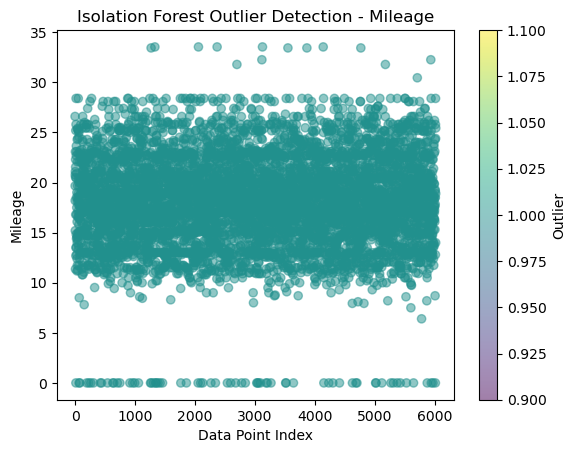

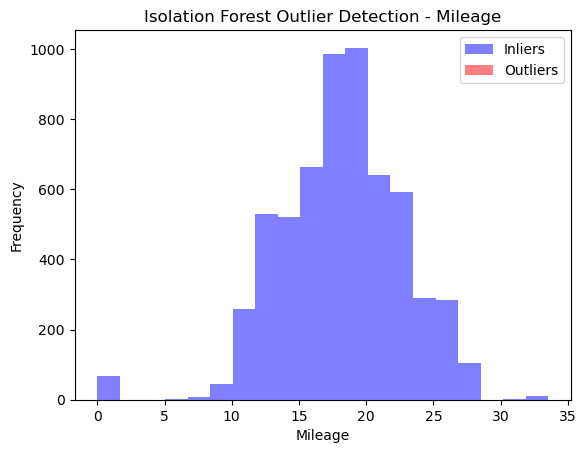

In [46]:
# Scatter plot of Isolation Forest predictions for Mileage.
plt.scatter(range(len(cars_df_4)), cars_df_4['Mileage'], c=outliers_if_mileage, cmap='viridis', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Mileage')
plt.title('Isolation Forest Outlier Detection - Mileage')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions for Mileag
plt.hist(cars_df_4['Mileage'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_4['Mileage'][outliers_mask_if_mileage], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - Mileage')
plt.legend()
plt.show()

**Observations**

- Mantaining the contamination parameter, we see no outliers in "Mileage"

In [47]:
# Create an instance of Isolation Forest to check for outliers with the same "contamination parameter" as we used before.
isolation_forest_New_price = IsolationForest(contamination=0.001) # Keep the contamination parameter the same for consistency.

# Fit the Isolation Forest model
isolation_forest_New_price.fit(cars_df_4[['New_price']])

# Predict outliers
outliers_if_New_price = isolation_forest_New_price.predict(cars_df_4[['New_price']])

# Create a Boolean mask for outliers
outliers_mask_if_New_price = outliers_if_New_price == -1

# Filter the dataset to isolate the outliers
outliers_if_New_price_df = cars_df_4[outliers_mask_if_New_price]

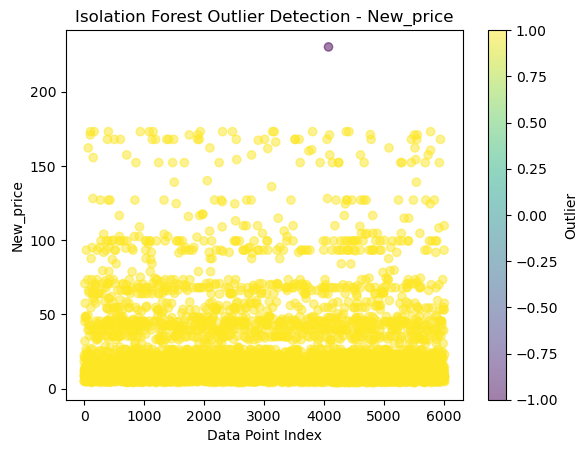

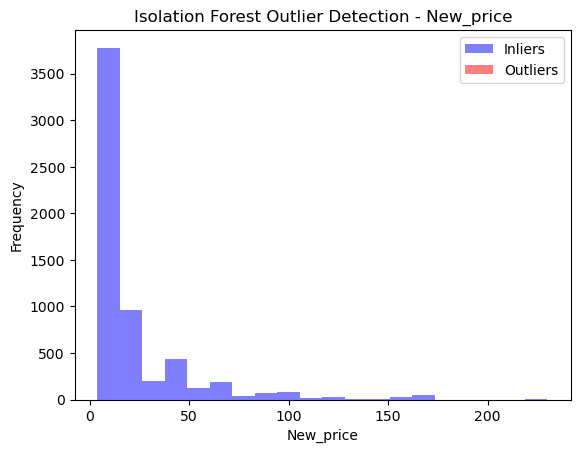

In [48]:
# Scatter plot of Isolation Forest predictions for Mileage.
plt.scatter(range(len(cars_df_4)), cars_df_4['New_price'], c=outliers_if_New_price, cmap='viridis', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('New_price')
plt.title('Isolation Forest Outlier Detection - New_price')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions for Mileag
plt.hist(cars_df_4['New_price'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_4['New_price'][outliers_mask_if_New_price], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('New_price')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - New_price')
plt.legend()
plt.show()

**Observations**

- Mantaining the contamination parameter, we see two outliers in "New_price" that we will drop after the analysis to every columns

In [49]:
# Create an instance of Isolation Forest to check for outliers with the same "contamination parameter" as we used before.
isolation_forest_Engine = IsolationForest(contamination=0.001) # Keep the contamination parameter the same for consistency.

# Fit the Isolation Forest model
isolation_forest_Engine.fit(cars_df_4[['Engine']])

# Predict outliers
outliers_if_Engine = isolation_forest_Engine.predict(cars_df_4[['Engine']])

# Create a Boolean mask for outliers
outliers_mask_if_Engine = outliers_if_Engine == -1

# Filter the dataset to isolate the outliers
outliers_if_Engine_df = cars_df_4[outliers_mask_if_Engine]

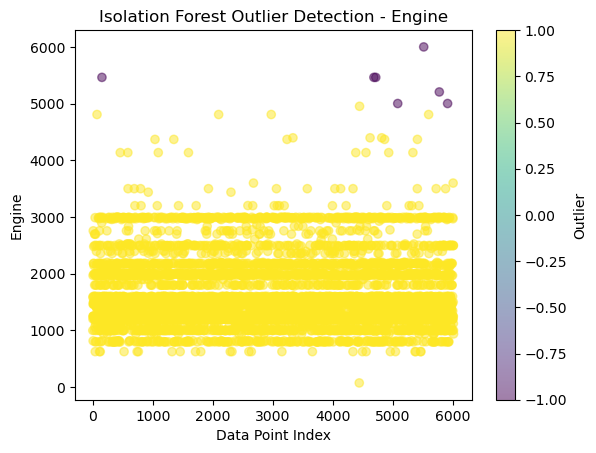

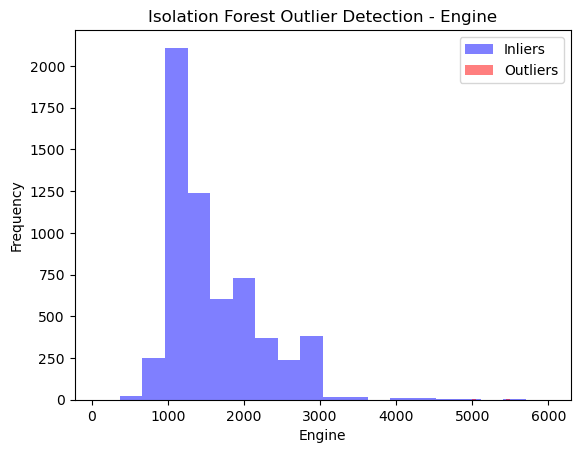

In [50]:
# Scatter plot of Isolation Forest predictions for Engine.
plt.scatter(range(len(cars_df_4)), cars_df_4['Engine'], c=outliers_if_Engine, cmap='viridis', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Engine')
plt.title('Isolation Forest Outlier Detection - Engine')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions for Mileag
plt.hist(cars_df_4['Engine'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_4['Engine'][outliers_mask_if_Engine], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('Engine')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - Engine')
plt.legend()
plt.show()

**Observations**

- Mantaining the contamination parameter, we see two outliers in "Power" that we will drop after the analysis to every columns

In [51]:
# Create an instance of Isolation Forest to check for outliers with the same "contamination parameter" as we used before.
isolation_forest_Power = IsolationForest(contamination=0.001) # Keep the contamination parameter the same for consistency.

# Fit the Isolation Forest model
isolation_forest_Power.fit(cars_df_4[['Power']])

# Predict outliers
outliers_if_Power = isolation_forest_Power.predict(cars_df_4[['Power']])

# Create a Boolean mask for outliers
outliers_mask_if_Power = outliers_if_Power == -1

# Filter the dataset to isolate the outliers
outliers_if_Power_df = cars_df_4[outliers_mask_if_Power]

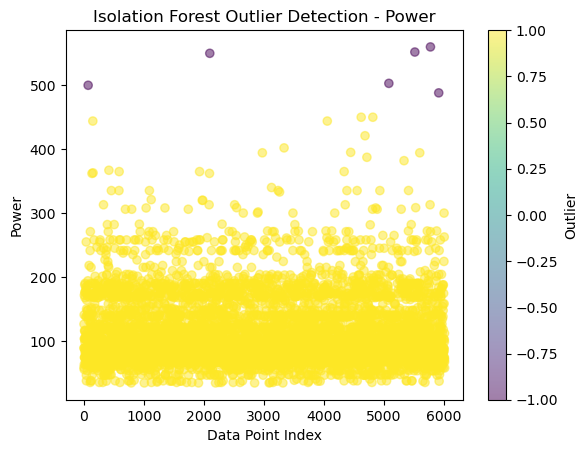

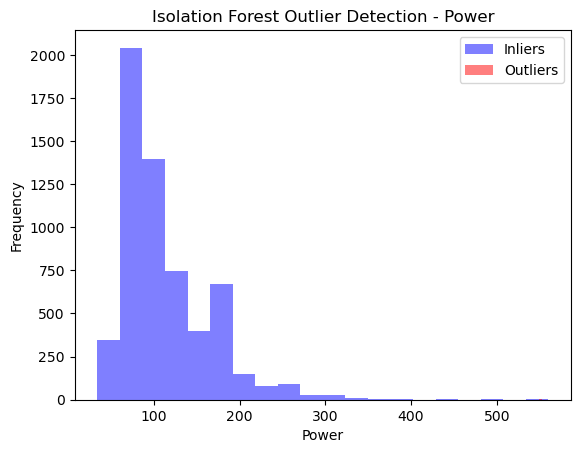

In [52]:
# Scatter plot of Isolation Forest predictions for Engine.
plt.scatter(range(len(cars_df_4)), cars_df_4['Power'], c=outliers_if_Power, cmap='viridis', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Power')
plt.title('Isolation Forest Outlier Detection - Power')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions for Mileag
plt.hist(cars_df_4['Power'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_4['Power'][outliers_mask_if_Power], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - Power')
plt.legend()
plt.show()

In [53]:
# Create an instance of Isolation Forest to check for outliers with the same "contamination parameter" as we used before.
isolation_forest_Price = IsolationForest(contamination=0.001) # Keep the contamination parameter the same for consistency.

# Fit the Isolation Forest model
isolation_forest_Price.fit(cars_df_4[['Price']])

# Predict outliers
outliers_if_Price = isolation_forest_Price.predict(cars_df_4[['Price']])

# Create a Boolean mask for outliers
outliers_mask_if_Price = outliers_if_Price == -1

# Filter the dataset to isolate the outliers
outliers_if_Price_df = cars_df_4[outliers_mask_if_Price]

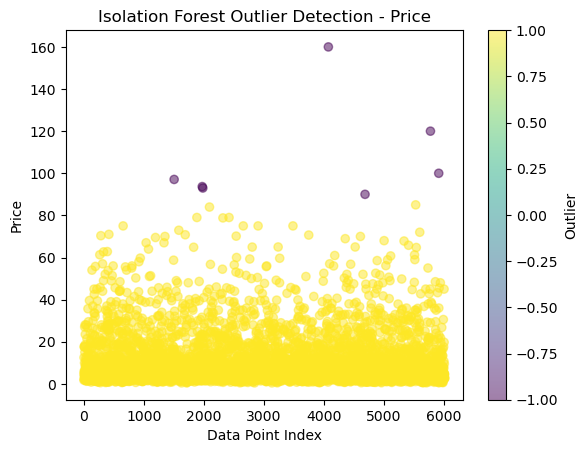

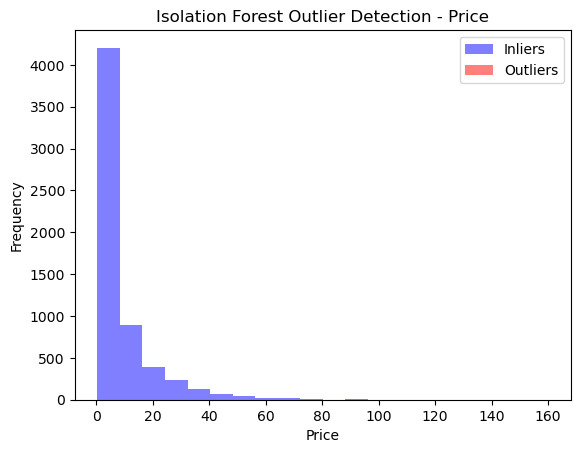

In [54]:
# Scatter plot of Isolation Forest predictions for Engine.
plt.scatter(range(len(cars_df_4)), cars_df_4['Price'], c=outliers_if_Price, cmap='viridis',alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.title('Isolation Forest Outlier Detection - Price')
plt.colorbar(label='Outlier')
plt.show()

# Histogram of Isolation Forest predictions for Mileag
plt.hist(cars_df_4['Price'], bins=20, color='blue', alpha=0.5, label='Inliers')
plt.hist(cars_df_4['Price'][outliers_mask_if_Power], bins=20, color='red', alpha=0.5, label='Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Isolation Forest Outlier Detection - Price')
plt.legend()
plt.show()

**Finding the outliers indexes**

In [55]:
outliers_if_New_price_df

Name   Location  Year  \
4073  Land Rover Range Rover 3.0 Diesel LWB Vogue  Hyderabad  2017   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Price  Mileage  \
4073              25000    Diesel    Automatic      First  160.0    13.33   

      Engine  Power  Seats  New_price  
4073  2993.0  255.0    5.0      230.0

In [56]:
outliers_if_Engine_df

Name    Location  Year  \
152   Mercedes-Benz S Class 2005 2013 S 500     Kolkata  2010   
4684         Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
4715          Mercedes-Benz SL-Class SL 500     Kolkata  2010   
5081        Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011   
5514        Bentley Continental Flying Spur   Hyderabad  2006   
5774             Lamborghini Gallardo Coupe       Delhi  2011   
5912                 Jaguar F Type 5.0 V8 S   Hyderabad  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type   Price  Mileage  \
152               35277    Petrol    Automatic      First   30.00     7.81   
4684               3000    Petrol    Automatic     Second   90.00    12.00   
4715              35000    Petrol    Automatic      First   29.50     8.10   
5081              43686    Petrol    Automatic      First   50.66    10.50   
5514              48000    Petrol    Automatic      First   59.00     8.60   
5774               6500    Petrol    Automatic      Third  120.00     6.40   
5912               8000    Petrol    Automatic      First  100.00    12.50   

      Engine  Power  Seats  New_price  
152   5461.0  362.9    5.0    155.574  
4684  5461.0  421.0    2.0    103.792  
4715  5461.0  387.3    2.0    104.506  
5081  5000.0  503.0    4.0    162.060  
5514  5998.0  552.0    4.0    162.060  
5774  5204.0  560.0    2.0    160.498  
5912  5000.0  488.1    2.0    108.192

In [57]:
outliers_if_Power_df

Name    Location  Year  Kilometers_Driven  \
70    Porsche Cayenne 2009-2014 Turbo      Mumbai  2008              73000   
2097          Porsche Cayenne Turbo S      Mumbai  2010              35000   
5081  Jaguar XJ 5.0 L V8 Supercharged  Coimbatore  2011              43686   
5514  Bentley Continental Flying Spur   Hyderabad  2006              48000   
5774       Lamborghini Gallardo Coupe       Delhi  2011               6500   
5912           Jaguar F Type 5.0 V8 S   Hyderabad  2015               8000   

     Fuel_Type Transmission Owner_Type   Price  Mileage  Engine  Power  Seats  \
70      Petrol    Automatic      First   14.50      8.5  4806.0  500.0    5.0   
2097    Petrol    Automatic     Second   32.00     11.9  4806.0  550.0    5.0   
5081    Petrol    Automatic      First   50.66     10.5  5000.0  503.0    4.0   
5514    Petrol    Automatic      First   59.00      8.6  5998.0  552.0    4.0   
5774    Petrol    Automatic      Third  120.00      6.4  5204.0  560.0    2.0   
5912    Petrol    Automatic      First  100.00     12.5  5000.0  488.1    2.0   

      New_price  
70      162.060  
2097    162.060  
5081    162.060  
5514    162.060  
5774    160.498  
5912    108.192

In [58]:
outliers_if_Price_df

Name    Location  Year  \
1503              Land Rover Range Rover Sport SE       Kochi  2019   
1971                           BMW 7 Series 740Li  Coimbatore  2018   
1981                           BMW 7 Series 740Li   Bangalore  2017   
4073  Land Rover Range Rover 3.0 Diesel LWB Vogue   Hyderabad  2017   
4684               Mercedes-Benz SLK-Class 55 AMG   Bangalore  2014   
5774                   Lamborghini Gallardo Coupe       Delhi  2011   
5912                       Jaguar F Type 5.0 V8 S   Hyderabad  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type   Price  Mileage  \
1503              26013    Diesel    Automatic      First   97.07    12.65   
1971              28060    Petrol    Automatic      First   93.67    12.05   
1981              17465    Petrol    Automatic      First   93.00    12.05   
4073              25000    Diesel    Automatic      First  160.00    13.33   
4684               3000    Petrol    Automatic     Second   90.00    12.00   
5774               6500    Petrol    Automatic      Third  120.00     6.40   
5912               8000    Petrol    Automatic      First  100.00    12.50   

      Engine  Power  Seats  New_price  
1503  2993.0  255.0    5.0    139.000  
1971  2979.0  320.0    5.0    117.436  
1981  2979.0  320.0    5.0    117.436  
4073  2993.0  255.0    5.0    230.000  
4684  5461.0  421.0    2.0    103.792  
5774  5204.0  560.0    2.0    160.498  
5912  5000.0  488.1    2.0    108.192

In [59]:
# Dropping the outliers found through the Isolation forest method

cars_df_5 = cars_df_4.drop(labels=[70, 152, 1503, 1971, 1981, 2097, 4073, 4684, 4715, 5081, 5514, 5774, 5912], axis=0)

In [60]:
cars_df_5.reset_index(drop = True)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
5994                  Maruti Swift VDI       Delhi  2014              27365   
5995          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
5996             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
5997                Maruti Wagon R VXI     Kolkata  2013              46000   
5998             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type  Price  Mileage  Engine   Power  Seats  \
0          CNG       Manual      First   1.75    26.60   998.0   58.16    5.0   
1       Diesel       Manual      First  12.50    19.67  1582.0  126.20    5.0   
2       Petrol       Manual      First   4.50    18.20  1199.0   88.70    5.0   
3       Diesel       Manual      First   6.00    20.77  1248.0   88.76    7.0   
4       Diesel    Automatic     Second  17.74    15.20  1968.0  140.80    5.0   
...        ...          ...        ...    ...      ...     ...     ...    ...   
5994    Diesel       Manual      First   4.75    28.40  1248.0   74.00    5.0   
5995    Diesel       Manual      First   4.00    24.40  1120.0   71.00    5.0   
5996    Diesel       Manual     Second   2.90    14.00  2498.0  112.00    8.0   
5997    Petrol       Manual      First   2.65    18.90   998.0   67.10    5.0   
5998    Diesel       Manual      First   2.50    25.44   936.0   57.60    5.0   

      New_price  
0         5.236  
1        18.392  
2         8.610  
3        11.692  
4        22.518  
...         ...  
5994      7.880  
5995      7.840  
5996     23.076  
5997      8.520  
5998      4.784  

[5999 rows x 13 columns]

## **Bivariate Analysis**

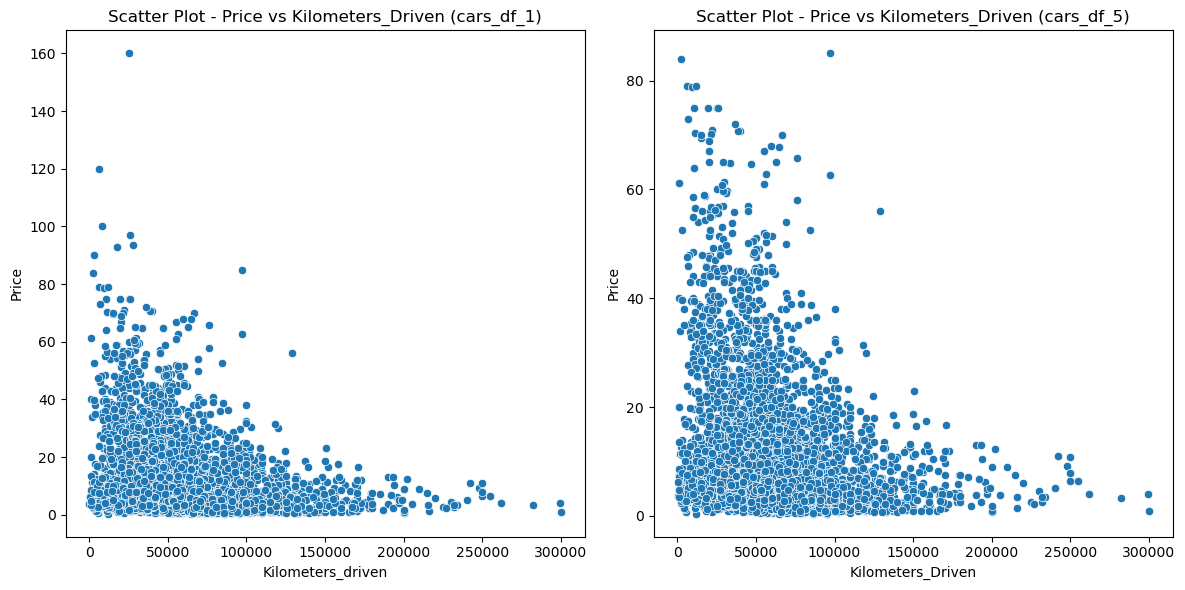

In [61]:
plt.figure(figsize=(12, 6))

# Scatter plot - cars_df_1
plt.subplot(1, 2, 1)
sns.scatterplot(x='Kilometers_Driven', y='Price', data=cars_df_1)
plt.title('Scatter Plot - Price vs Kilometers_Driven (cars_df_1)')
plt.xlabel('Kilometers_driven')
plt.ylabel('Price')

# Scatter plot - cars_df_5
plt.subplot(1, 2, 2)
sns.scatterplot(x='Kilometers_Driven', y='Price', data=cars_df_5)
plt.title('Scatter Plot - Price vs Kilometers_Driven (cars_df_5)')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

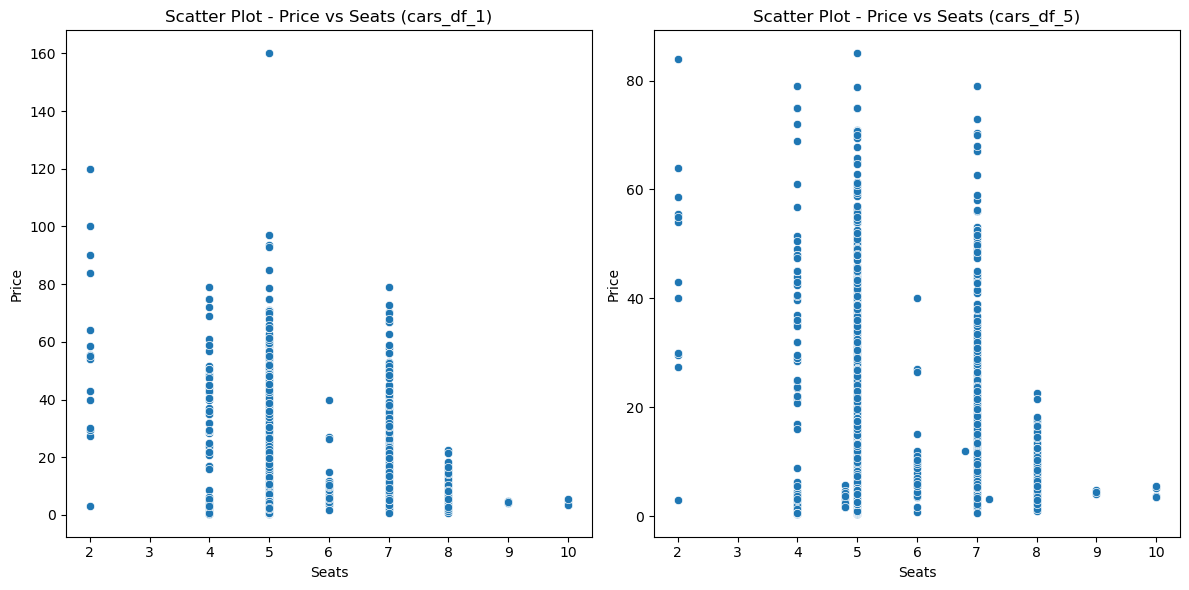

In [62]:
plt.figure(figsize=(12, 6))

# Scatter plot - cars_df_1
plt.subplot(1, 2, 1)
sns.scatterplot(x='Seats', y='Price', data=cars_df_1)
plt.title('Scatter Plot - Price vs Seats (cars_df_1)')
plt.xlabel('Seats')
plt.ylabel('Price')

# Scatter plot - cars_df_5
plt.subplot(1, 2, 2)
sns.scatterplot(x='Seats', y='Price', data=cars_df_5)
plt.title('Scatter Plot - Price vs Seats (cars_df_5)')
plt.xlabel('Seats')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

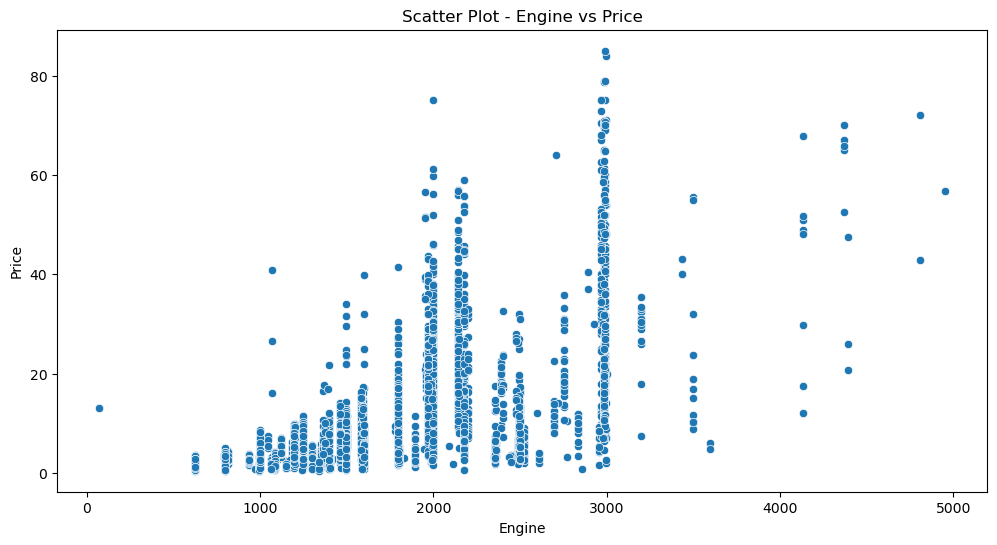

In [63]:
# a scatter plot of the relation between Engine and Price

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine', y='Price', data=cars_df_5)
plt.title('Scatter Plot - Engine vs Price')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

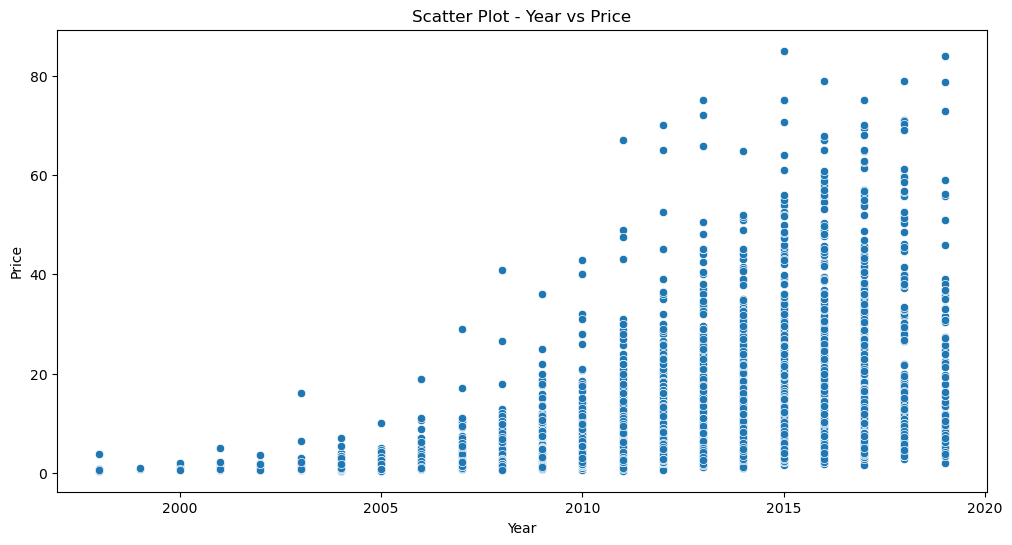

In [64]:
# a scatter plot of the relation between Year and Price

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Price', data=cars_df_5)
plt.title('Scatter Plot - Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

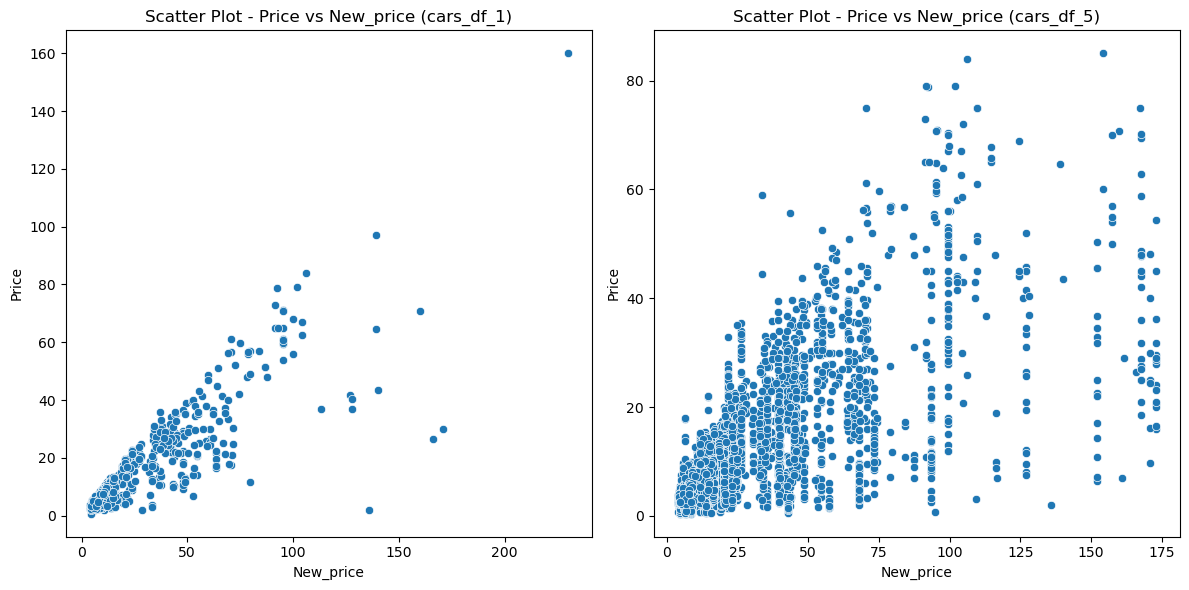

In [65]:
# a scatter plot of the relation between New_price and Price

plt.figure(figsize=(12, 6))

# Scatter plot - cars_df_1
plt.subplot(1, 2, 1)
sns.scatterplot(x='New_price', y='Price', data=cars_df_1)
plt.title('Scatter Plot - Price vs New_price (cars_df_1)')
plt.xlabel('New_price')
plt.ylabel('Price')

# Scatter plot - cars_df_5
plt.subplot(1, 2, 2)
sns.scatterplot(x='New_price', y='Price', data=cars_df_5)
plt.title('Scatter Plot - Price vs New_price (cars_df_5)')
plt.xlabel('New_price')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

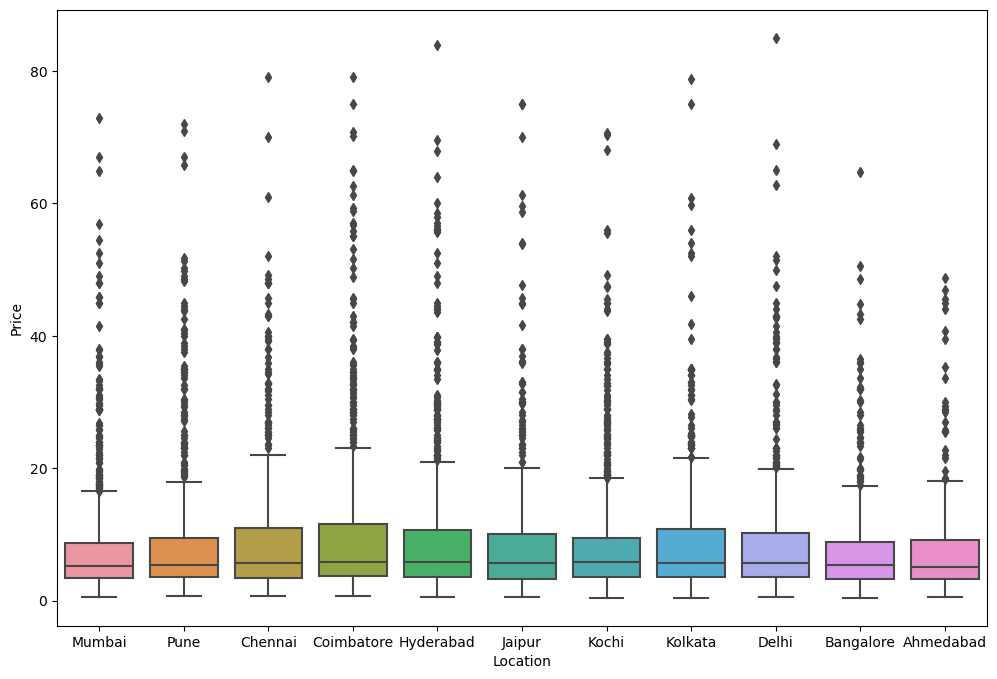

In [66]:
# Set the figure size
plt.figure(figsize = (12, 8))

# Create the boxplots
sns.boxplot(x = cars_df['Location'], y = cars_df_5['Price'])
plt.show()

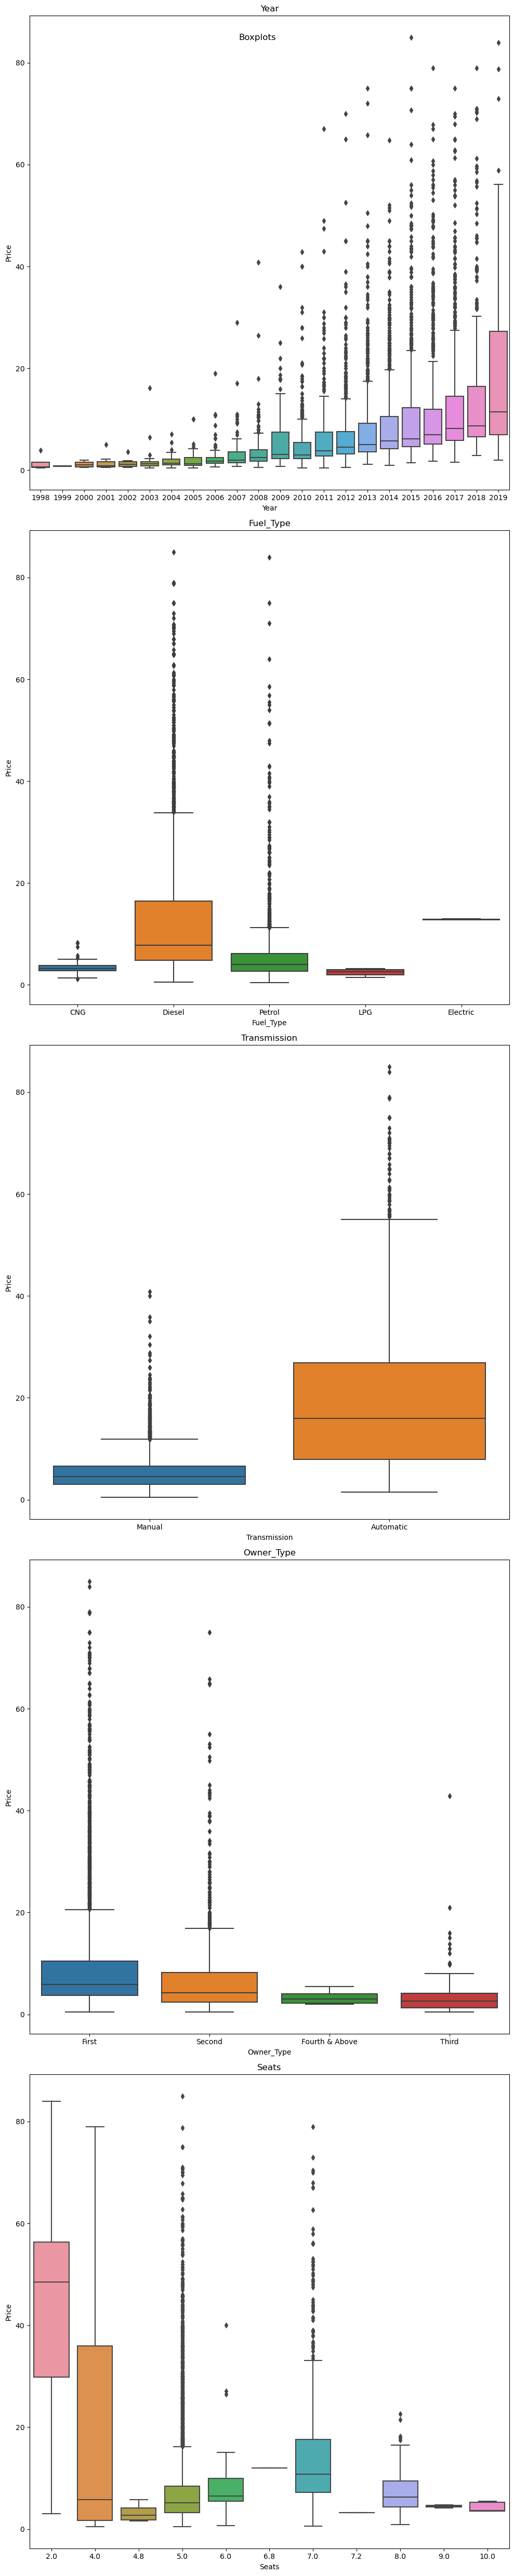

In [67]:
# reploting some key categorical variables to understand their distribution when compared to the variable "Price"

fig, axes = plt.subplots(5, 1, figsize=(10, 50))
fig.suptitle('Boxplots')

sns.boxplot(x=cars_df_5['Year'], y=cars_df_5['Price'], ax=axes[0])
axes[0].set_title('Year')

sns.boxplot(x=cars_df_5['Fuel_Type'], y=cars_df_5['Price'], ax=axes[1])
axes[1].set_title('Fuel_Type')

sns.boxplot(x=cars_df_5['Transmission'], y=cars_df_5['Price'], ax=axes[2])
axes[2].set_title('Transmission')

sns.boxplot(x=cars_df_5['Owner_Type'], y=cars_df_5['Price'], ax=axes[3])
axes[3].set_title('Owner_Type')

sns.boxplot(x=cars_df_5['Seats'], y=cars_df_5['Price'], ax=axes[4])
axes[4].set_title('Seats')

plt.tight_layout()
plt.show()

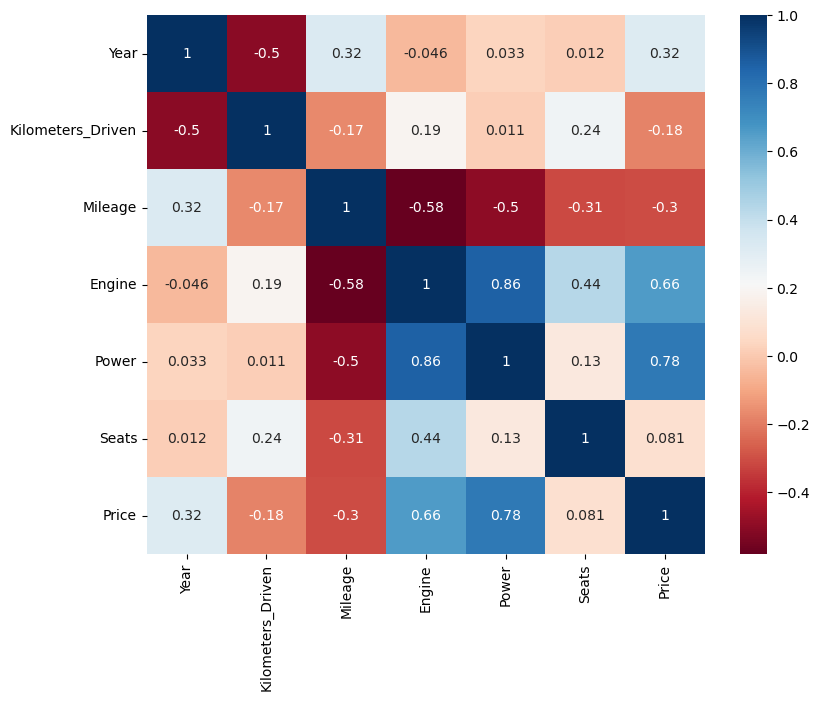

In [68]:
# Find correlation matrix
corr_mat = cars_df_5[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']].corr()

# Plot the heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(corr_mat, annot=True, cmap='RdBu')
plt.show()

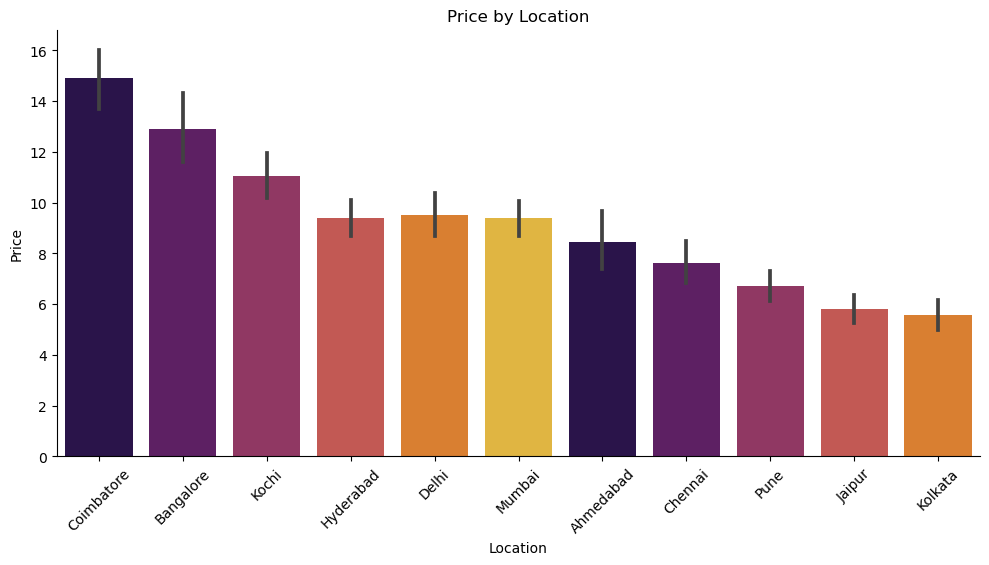

In [69]:
#Average price of cars by Location and sorting in descending order
order=cars_df.groupby(['Location'])['Price'].mean().fillna(0).sort_values(ascending= False).index
color_palette = sns.color_palette("inferno")

sns.catplot(x="Location", y="Price", data=cars_df_5, kind='bar', height=5, aspect=2, palette = color_palette, order=order).set(title='Price by Location') 
plt.xticks(rotation=45);

**Observations**

- We can infer from the correlation between Price vs Power and Price vs Engine that both those variable will probably not make the final model.

- The most correlated variable when compared to "Price" is "Power", followed by "Engine".

- The other variables present a mild correlation with "Price"

- Location vs Price is one of the most interesting relationships we found. It might be a good implementation solution.

In [73]:
#Brand "Maruti" vs Location sales
pd.crosstab(index=cars_df_6.Brand, columns=cars_df_6.Location.sort_values(ascending=True), margins=True, margins_name='Total')

maruti_city = cars_df_6[cars_df_6['Brand'] == 'Maruti'].groupby('Location')['Price'].median().sort_values(ascending=False)
maruti_city

Location
Coimbatore    6.100
Kochi         5.515
Bangalore     4.475
Ahmedabad     4.250
Chennai       4.250
Hyderabad     4.225
Delhi         4.150
Mumbai        3.920
Jaipur        3.500
Kolkata       3.500
Pune          3.300
Name: Price, dtype: float64

**Observation**


- Very interesting results showing the difference in median price of the Maruti Brand in diferent cities

In [74]:
# Retrieving the most frequent Maruti results in each city.

most_frequent_maruti = cars_df_6.loc[cars_df_6['Name'].str.contains('^Maruti')].groupby('Location')['Name'].apply(lambda x: x.mode()[0])
most_frequent_maruti

Location
Ahmedabad                Maruti Wagon R LXI
Bangalore             Maruti Swift VDI BSIV
Chennai                    Maruti Swift VDI
Coimbatore    Maruti Eeco 7 Seater Standard
Delhi                Maruti Swift Dzire LDI
Hyderabad                   Maruti Ritz VDi
Jaipur                     Maruti Swift VDI
Kochi                      Maruti Swift VDI
Kolkata              Maruti Swift Dzire VDI
Mumbai               Maruti Wagon R LXI CNG
Pune                       Maruti Swift VDI
Name: Name, dtype: object

In [75]:
#Getting the average price of the Maruti Swift

# Filter the dataframe based on the condition
maruti_swift_cars = cars_df_6[cars_df_6['Name'].str.startswith('Maruti Swift')]

# Calculate the average price separated by location
average_price_by_location = maruti_swift_cars.groupby('Location')['Price'].mean()

# Print the average price by location
average_price_by_location


Location
Ahmedabad     4.780000
Bangalore     4.753077
Chennai       4.720000
Coimbatore    6.136250
Delhi         4.207632
Hyderabad     5.535490
Jaipur        4.671316
Kochi         5.680000
Kolkata       3.885556
Mumbai        4.018519
Pune          4.060638
Name: Price, dtype: float64

In [76]:
#Getting the average price of Mercedes_Benz

# Filter the dataframe based on the condition
maruti_swift_cars = cars_df_6[cars_df_6['Name'].str.startswith('Mercedes')]

# Calculate the average price separated by location
average_price_by_location = maruti_swift_cars.groupby('Location')['Price'].mean()

# Print the average price by location
average_price_by_location

Location
Ahmedabad     23.835000
Bangalore     28.446667
Chennai       23.613636
Coimbatore    40.857917
Delhi         23.366176
Hyderabad     24.521786
Jaipur        21.520833
Kochi         25.561053
Kolkata       22.117143
Mumbai        22.534906
Pune          22.184815
Name: Price, dtype: float64

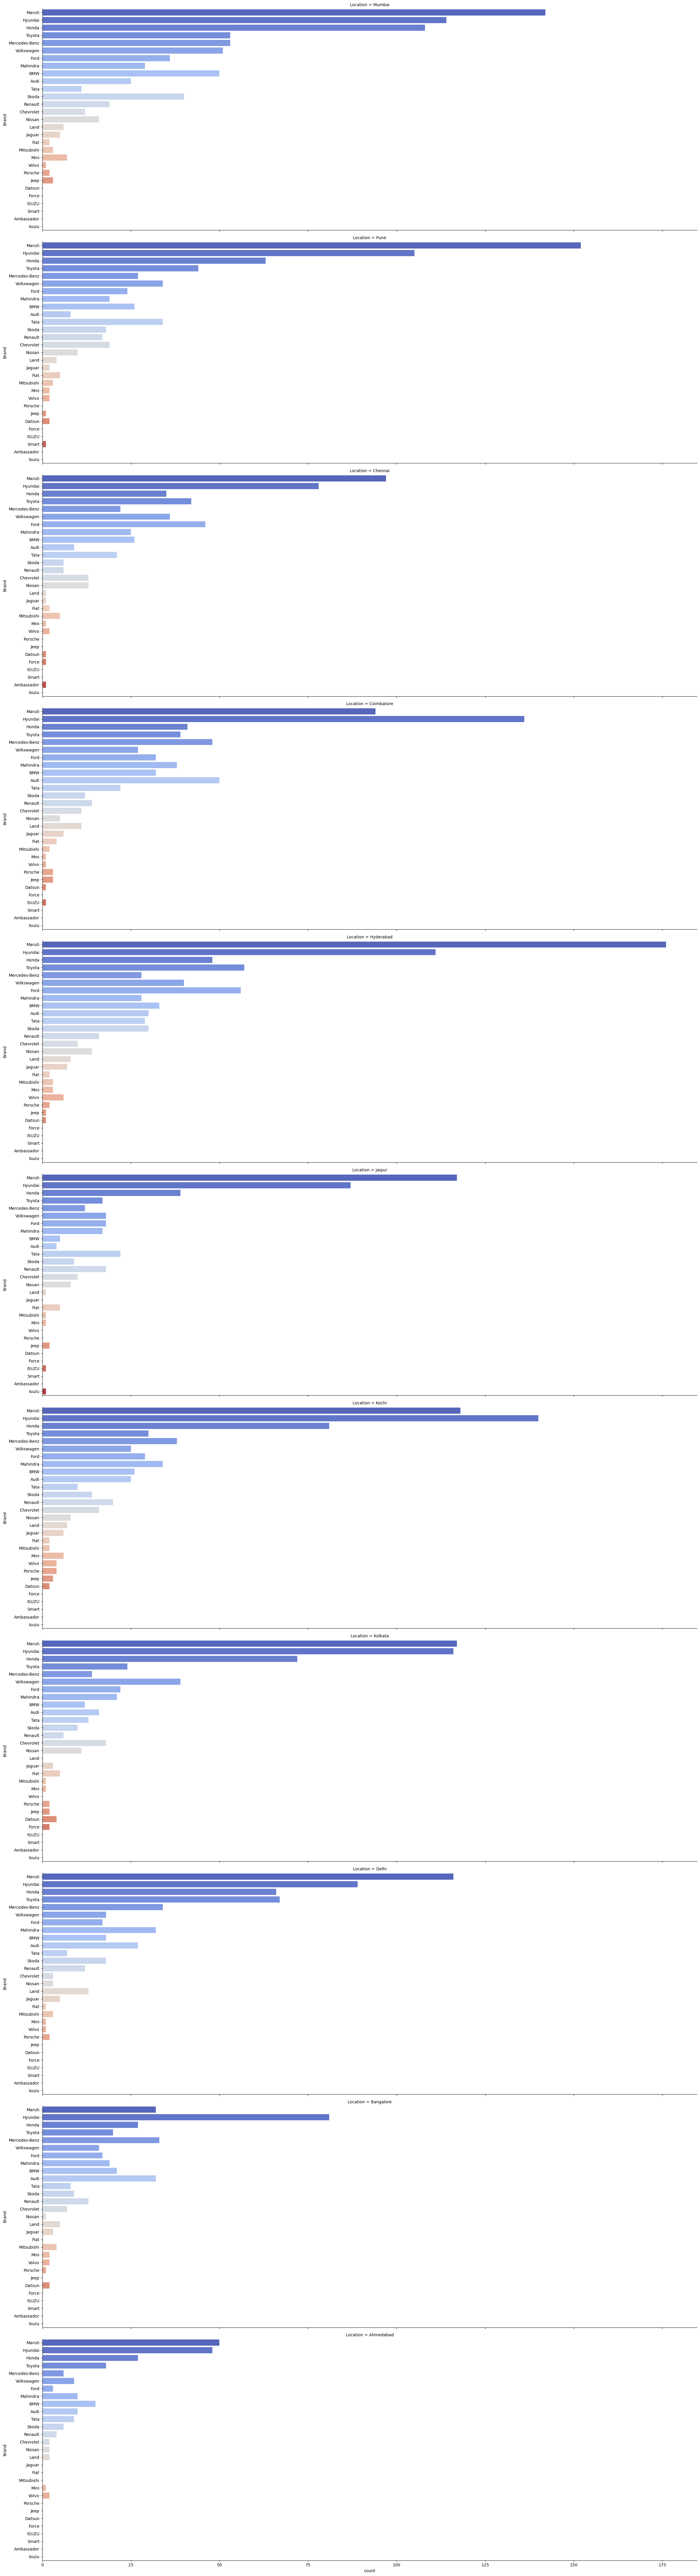

In [77]:
# A catplot bar plot showing the sales by brand in each Location
sns.catplot(data=cars_df_6, 
              y="Brand", 
              kind='count', 
              height=8, 
              aspect=3 ,
              row="Location",
              palette="coolwarm",
              order = cars_df_6["Brand"].value_counts(ascending=False).index
           )
plt.show()

In [78]:
# Average Sale Price of Car Across various locations
pd.set_option("display.max_rows", None) #to display all rows
pd.DataFrame(cars_df_6.groupby(['Brand', 'Location'])['Price'].mean().fillna(0))

Price
Brand         Location             
Ambassador    Chennai      1.350000
Audi          Ahmedabad   14.600000
              Bangalore   28.448438
              Chennai     26.694444
              Coimbatore  32.529400
              Delhi       19.034074
              Hyderabad   27.308000
              Jaipur      16.375000
              Kochi       26.771200
              Kolkata     14.978125
              Mumbai      24.089600
              Pune        24.250000
BMW           Ahmedabad   24.560667
              Bangalore   26.820952
              Chennai     26.740385
              Coimbatore  28.820000
              Delhi       20.183889
              Hyderabad   24.273939
              Jaipur      27.150000
              Kochi       30.864615
              Kolkata     15.087500
              Mumbai      23.260800
              Pune        18.940000
Chevrolet     Ahmedabad    3.525000
              Bangalore    3.978571
              Chennai      2.410769
              Coimbatore   4.589091
              Delhi        2.036667
              Hyderabad    4.055000
              Jaipur       2.395000
              Kochi        3.722500
              Kolkata      2.353889
              Mumbai       3.020833
              Pune         2.256316
Datsun        Bangalore    2.880000
              Chennai      2.750000
              Coimbatore   3.310000
              Hyderabad    2.990000
              Kochi        3.540000
              Kolkata      2.675000
              Pune         3.525000
Fiat          Chennai      2.375000
              Coimbatore   5.670000
              Delhi        1.650000
              Hyderabad    4.550000
              Jaipur       1.900000
              Kochi        4.890000
              Kolkata      2.316000
              Mumbai       4.325000
              Pune         2.770000
Force         Chennai     12.000000
              Kolkata      8.000000
Ford          Ahmedabad    5.716667
              Bangalore    4.717059
              Chennai      5.874783
              Coimbatore  10.850625
              Delhi        8.202941
              Hyderabad    6.626071
              Jaipur       4.606667
              Kochi       10.497241
              Kolkata      4.716364
              Mumbai       6.723056
              Pune         4.515833
Honda         Ahmedabad    5.521481
              Bangalore    5.625185
              Chennai      4.915429
              Coimbatore   7.058049
              Delhi        4.350303
              Hyderabad    6.608125
              Jaipur       4.672051
              Kochi        6.798642
              Kolkata      4.231667
              Mumbai       5.328148
              Pune         4.851270
Hyundai       Ahmedabad    5.619375
              Bangalore    6.295556
              Chennai      4.484487
              Coimbatore   7.765294
              Delhi        5.122472
              Hyderabad    4.569730
              Jaipur       4.380575
              Kochi        6.219643
              Kolkata      3.732672
              Mumbai       5.286754
              Pune         4.493429
ISUZU         Coimbatore  16.090000
              Jaipur       8.000000
Isuzu         Jaipur      20.000000
Jaguar        Bangalore   27.316667
              Chennai     26.500000
              Coimbatore  28.838333
              Delhi       44.300000
              Hyderabad   43.000000
              Kochi       35.200000
              Kolkata     22.066667
              Mumbai      43.650000
              Pune        27.500000
Jeep          Coimbatore  21.550000
              Hyderabad   16.900000
              Jaipur      19.500000
              Kochi       18.010000
              Kolkata     16.250000
              Mumbai      18.400000
              Pune        18.500000
Land          Ahmedabad   20.500000
              Bangalore   49.500000
              Chennai     16.500000
              Coimbatore  49.528182
              Delhi       34.211538
              Hyderabad   30.02875

## **Multivariate Analysis - Final Project**

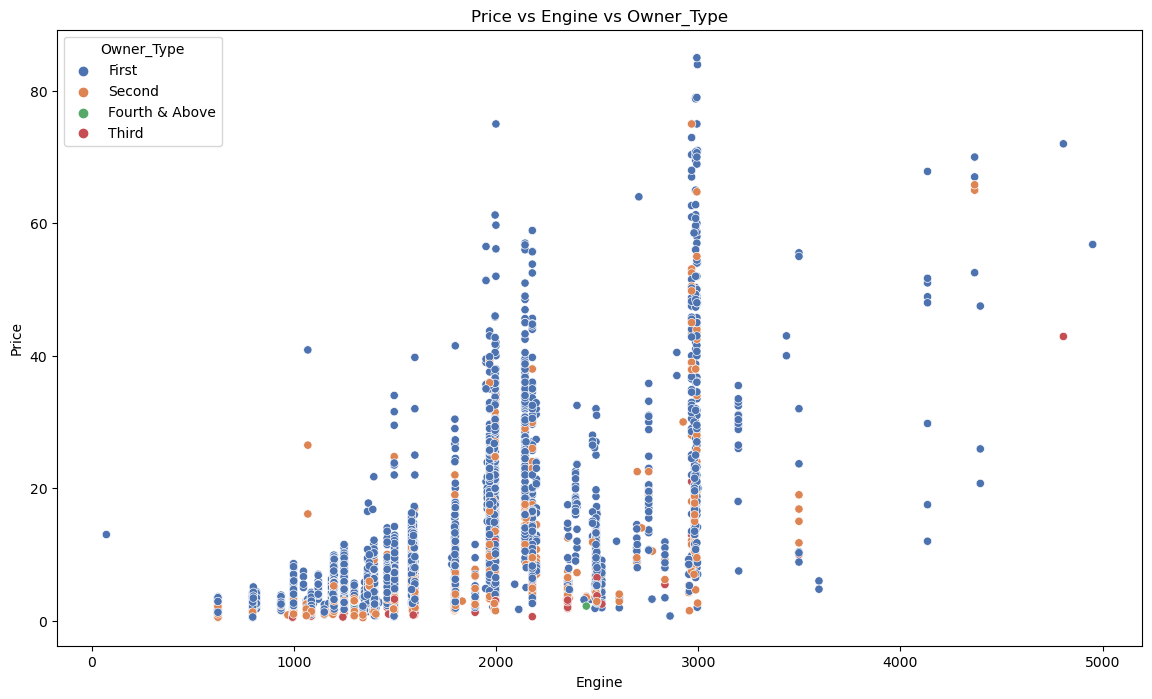

In [79]:
#Price vs Engine vs Transmission 

plt.figure(figsize=(14,8))
plt.title("Price vs Engine vs Owner_Type")
sns.scatterplot(x='Engine', y='Price', hue='Owner_Type', data=cars_df_6, palette='deep')
plt.show()

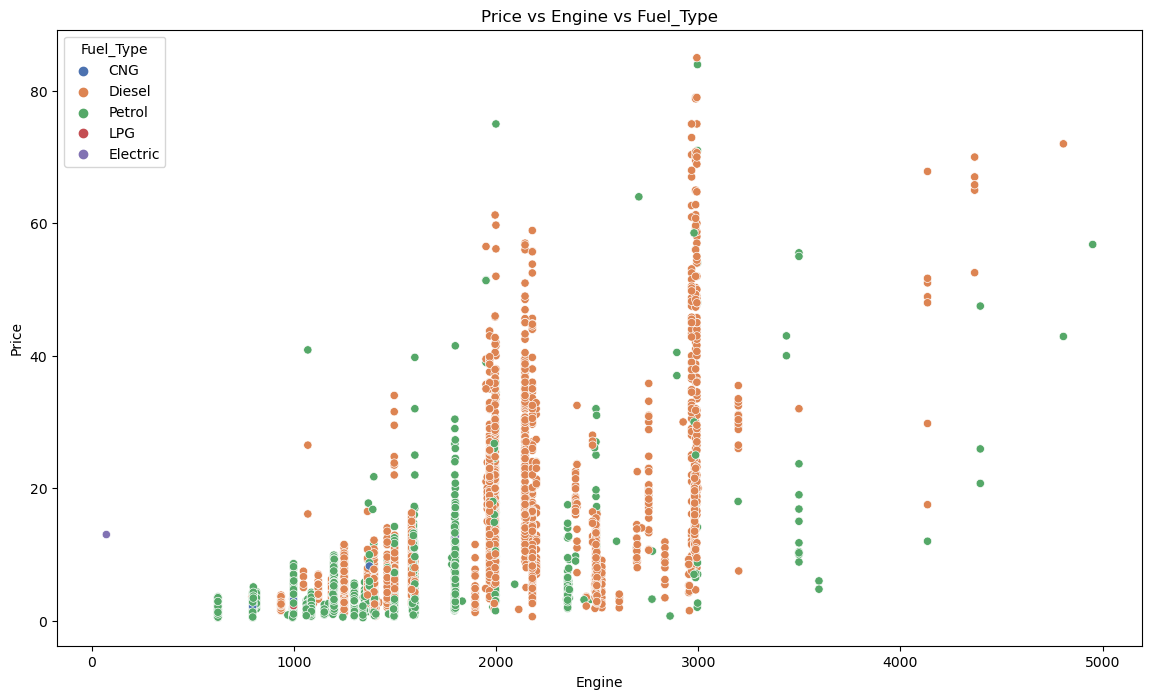

In [80]:
#Price vs Engine vs Transmission 

plt.figure(figsize=(14,8))
plt.title("Price vs Engine vs Fuel_Type")
sns.scatterplot(x='Engine', y='Price', hue='Fuel_Type', data=cars_df_6, palette='deep')
plt.show()

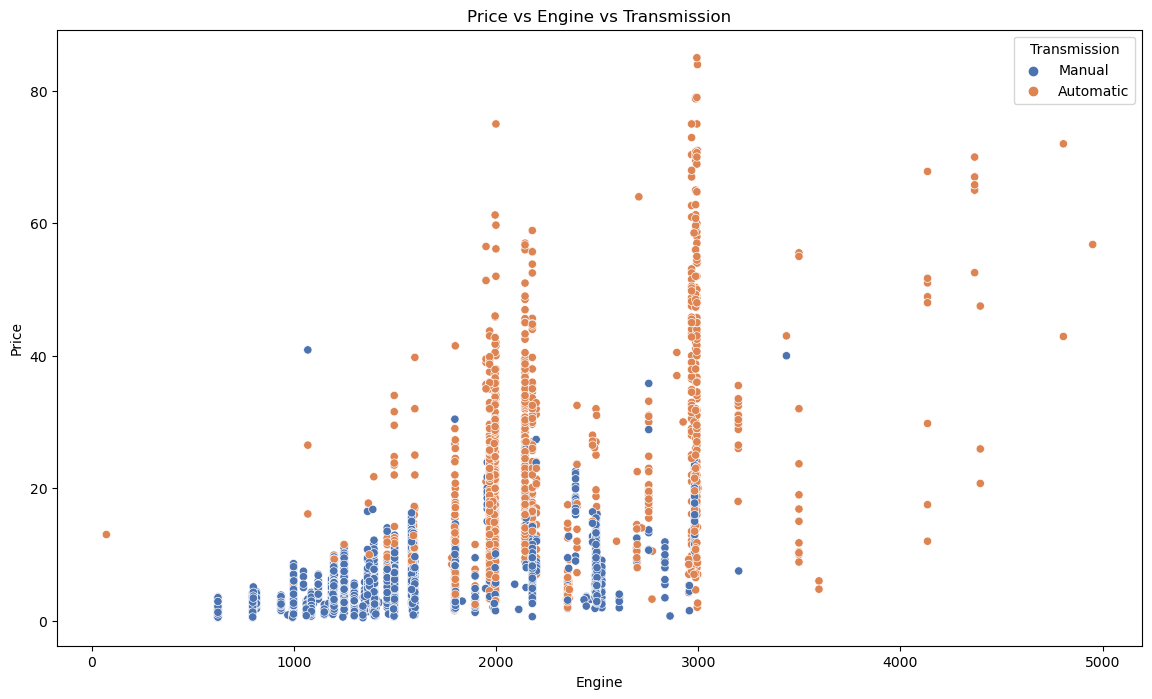

In [81]:
#Price vs Engine vs Transmission 

plt.figure(figsize=(14,8))
plt.title("Price vs Engine vs Transmission")
sns.scatterplot(x='Engine', y='Price', hue='Transmission', data=cars_df_6, palette='deep')
plt.show()

In [241]:
# Creating bins filters to impute "Car_Class" values to the DataFrame

cars_df_class = cars_df_6
cars_df_class['Car_Class'] = pd.cut(cars_df_class['Price'],[-np.inf,4.99,9.99,20.99,44.99,74.99,np.inf],
                       labels=["Class1","Class2","Class3","Class4","Class5","Class6"])

cars_df_class['Car_Class'].value_counts()

Class1    2611
Class2    1903
Class3     836
Class4     525
Class5     115
Class6       9
Name: Car_Class, dtype: int64

In [83]:
# Dropping the redundant "Car_Type"
cars_df_class.drop(['Car_Type'], axis = 1)

KeyError: "['Car_Type'] not found in axis"

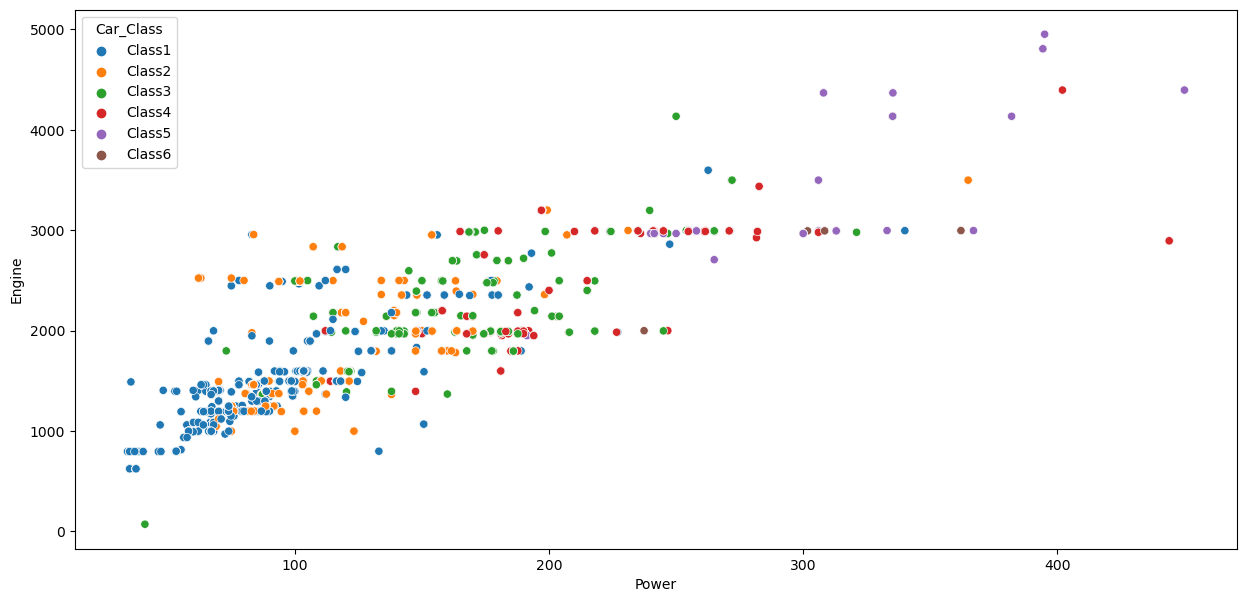

In [84]:
# Plottinh a distribution of "Car_Class" in Engine vs Power
plt.figure(figsize=(15,7))
sns.scatterplot(data=cars_df_class,y='Engine',x='Power',hue='Car_Class')
plt.show()

**Observations**

We tend to see higher "Class" cars as the Price and Engine size rise aswell.

<AxesSubplot:xlabel='Engine', ylabel='Mileage'>

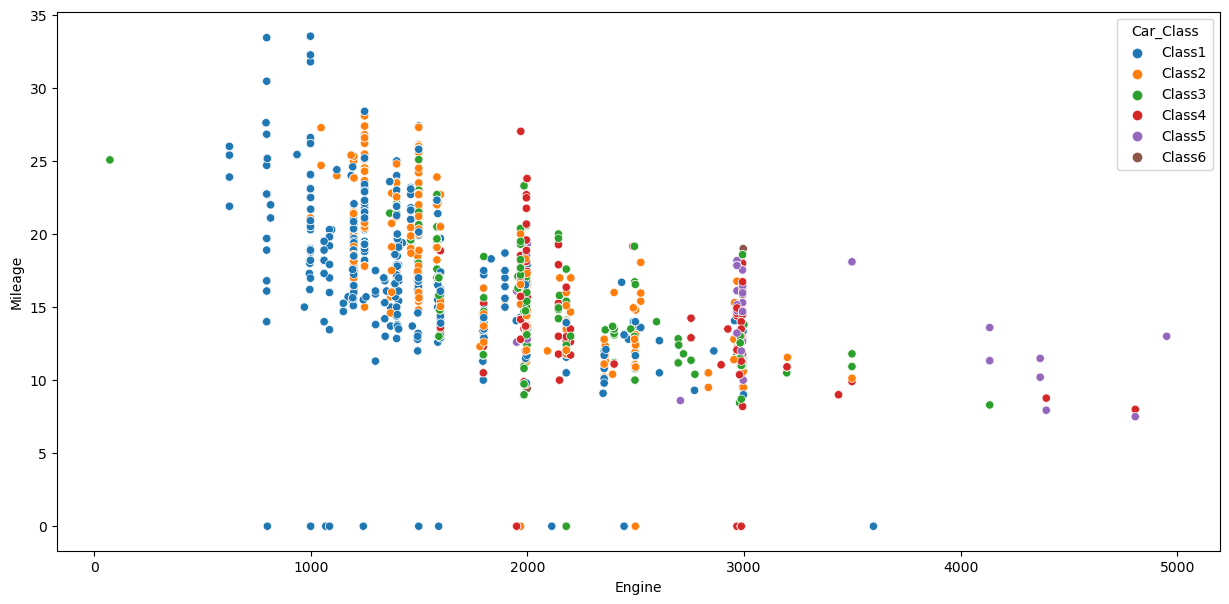

In [85]:
#Engine Vs Mileage Vs Car_Type
plt.figure(figsize=(15,7))
sns.scatterplot(x='Engine', y='Mileage',hue='Car_Class', data=cars_df_class)

**Observation**

Just like our intuition tells us, cars with higher Engine size and less Mileage tend to be from "Higher Classes"

## **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [238]:
# Extracting a new column "Brand" from the "Name" column.
cars_df_6 = cars_df_5.copy()
cars_df_6['Brand'] = cars_df_5['Name'].str.split().str[0]

In [239]:
cars_df_6['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Datsun', 'Jaguar',
       'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart',
       'Porsche', 'Ambassador', 'Isuzu', 'ISUZU', 'Force'], dtype=object)

In [242]:
cars_df_6.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Price                0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
Brand                0
Car_Class            0
dtype: int64

In [89]:
# Correcting an error in the data. Isuzu has two spellings
cars_df_6['Brand'] = cars_df_6['Brand'].replace('ISUZU', 'Isuzu')

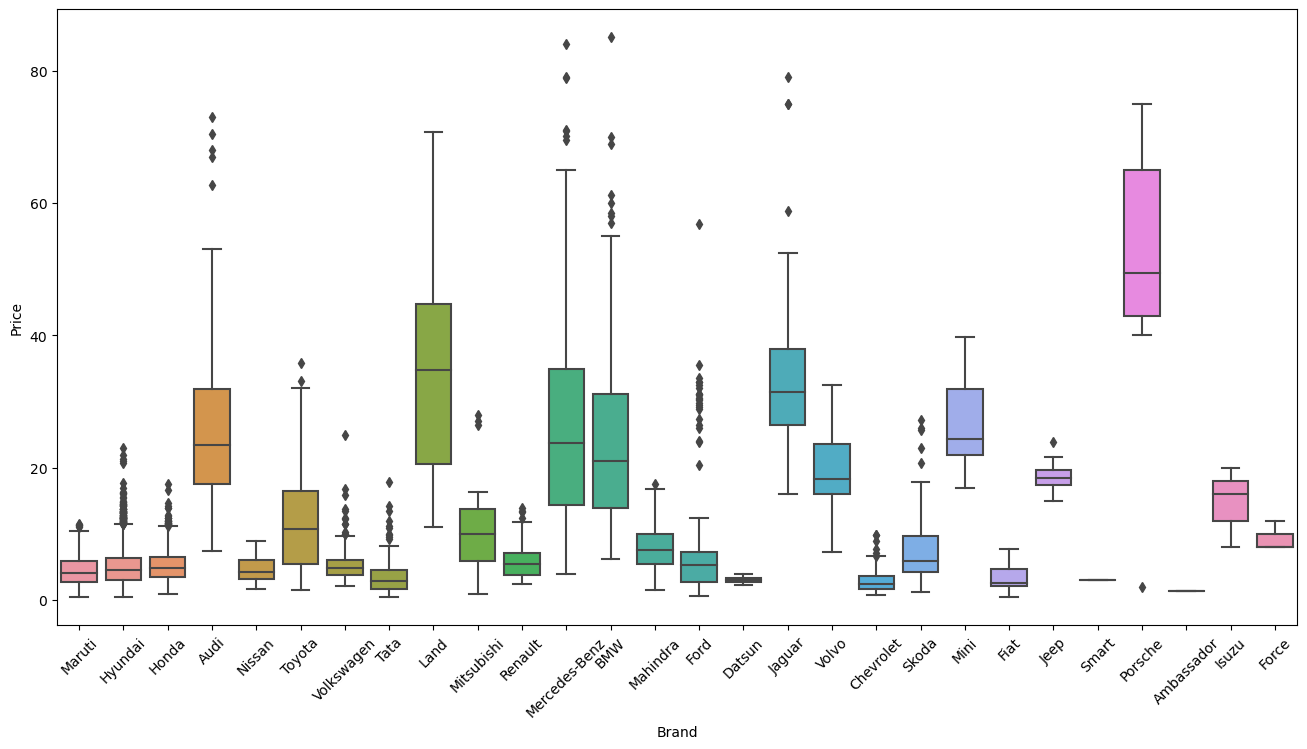

In [90]:
# Set the figure size
plt.figure(figsize = (16, 8))

# Create the boxplots
sns.boxplot(x = cars_df_6['Brand'], y = cars_df_6['Price'])
plt.xticks(rotation=45)
plt.show()

#### Further Feature Engineering was also processed along the notebook when necessity arised - Final Project

**Observations**



In [91]:
cars_df_6.describe().T

count          mean           std      min        25%  \
Year               5999.0   2013.359227      3.268849  1998.00   2011.000   
Kilometers_Driven  5999.0  57199.918320  33771.935771   171.00  34000.000   
Price              5999.0      9.332217     10.593822     0.44      3.500   
Mileage            5999.0     18.152388      4.574697     0.00     15.230   
Engine             5999.0   1614.013769    583.613532    72.00   1197.500   
Power              5999.0    112.181372     51.640335    34.20     74.900   
Seats              5999.0      5.281547      0.800753     2.00      5.000   
New_price          5999.0     22.429453     26.701872     3.91      8.376   

                        50%        75%        max  
Year                2014.00   2016.000    2019.00  
Kilometers_Driven  53000.00  73000.000  300000.00  
Price                  5.60      9.900      85.00  
Mileage               18.16     21.100      33.54  
Engine              1493.00   1969.000    4951.00  
Power                 94.00    138.100     450.00  
Seats                  5.00      5.000      10.00  
New_price             11.63     23.076     173.00

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

- One of the most important observations was the distribution of the nulls in the "Price" variable. 

- I was able to impute "New_price" nulls with KNN imputer mantaining the distribution of the data and gaining a valuable predictor that would otherwise be dscarded.



# **Building Various Models**


## Model Building - Linear Regression

In [243]:
# Dropping the Name column
cars_df_7 = cars_df_6.drop(columns=['Name'], axis=1)

In [244]:
# Creating dummy variables for the categorical variables
cars_df_7 = pd.get_dummies(cars_df_7, drop_first = True)

cars_df_7.head()

Year  Kilometers_Driven  Price  Mileage  Engine   Power  Seats  New_price  \
0  2010              72000   1.75    26.60   998.0   58.16    5.0      5.236   
1  2015              41000  12.50    19.67  1582.0  126.20    5.0     18.392   
2  2011              46000   4.50    18.20  1199.0   88.70    5.0      8.610   
3  2012              87000   6.00    20.77  1248.0   88.76    7.0     11.692   
4  2013              40670  17.74    15.20  1968.0  140.80    5.0     22.518   

   Location_Bangalore  Location_Chennai  ...  Brand_Smart  Brand_Tata  \
0                   0                 0  ...            0           0   
1                   0                 0  ...            0           0   
2                   0                 1  ...            0           0   
3                   0                 1  ...            0           0   
4                   0                 0  ...            0           0   

   Brand_Toyota  Brand_Volkswagen  Brand_Volvo  Car_Class_Class2  \
0             0                 0            0                 0   
1             0                 0            0                 0   
2             0                 0            0                 0   
3             0                 0            0                 1   
4             0                 0            0                 0   

   Car_Class_Class3  Car_Class_Class4  Car_Class_Class5  Car_Class_Class6  
0                 0                 0                 0                 0  
1                 1                 0                 0                 0  
2                 0                 0                 0                 0  
3                 0                 0                 0                 0  
4                 1                 0                 0                 0  

[5 rows x 59 columns]

#### Splitting the data into training and testing

In [97]:
# Splitting the data

X = cars_df_7.drop('Price', axis=1)  # Features 
y = cars_df_7['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (4799, 52) (4799,)
Test set shape: (1200, 52) (1200,)


#### Functions to display metrics easily


In [95]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [98]:
# checking the datashape to make sure both dataframes have the same dimensions.

print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (1200, 52)
X_train shape: (4799, 52)
y_test shape: (1200,)
y_train shape: (4799,)


In [99]:
# Adding the intercept term
X_train_const = sm.add_constant(X_train)

# Add constant to test data
X_test_const = sm.add_constant(X_test)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(y_train, X_train_const)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     380.3
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:13   Log-Likelihood:                -14182.
No. Observations:                4799   AIC:                         2.847e+04
Df Residuals:                    4747   BIC:                         2.880e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **Evaluation Metrics for first build**

In [100]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test = model_performance_regression(ols_res_0, X_train_const, y_train)
lin_reg_test

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.647086  2.673607   0.803394        0.801198  54.540605

#### **Removing Multicollinearity**

In [101]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])],
    index = X_train_const.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        815098.584042
Year                              2.133867
Kilometers_Driven                 1.866304
Mileage                           3.000828
Engine                           10.819508
Power                            10.190682
Seats                             2.624753
New_price                         5.111772
Location_Bangalore                2.408032
Location_Chennai                  2.913202
Location_Coimbatore               3.376565
Location_Delhi                    2.967193
Location_Hyderabad                3.685406
Location_Jaipur                   2.656753
Location_Kochi                    3.482811
Location_Kolkata                  2.918211
Location_Mumbai                   3.879243
Location_Pune                     3.289865
Fuel_Type_Diesel                 27.535851
Fuel_Type_Electric                1.061326
Fuel_Type_LPG                     1.186237
Fuel_Type_Petrol                 28.103089
Transmission_Manual               2.2747

In [102]:
X_train_1 = X_train_const.drop(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Fuel_Type_LPG', 'Fuel_Type_Electric'], axis=1)


In [103]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(y_train, X_train_1)

# Fitting the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     403.7
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:17   Log-Likelihood:                -14226.
No. Observations:                4799   AIC:                         2.855e+04
Df Residuals:                    4751   BIC:                         2.886e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [104]:
# Getting the evaluation metrics for the OLS model

lin_reg_test_1 = model_performance_regression(ols_res_1, X_train_1, y_train)
lin_reg_test_1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.689809  2.701494   0.799762        0.797696  54.504586

In [105]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])],
    index = X_train_1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        806399.425681
Year                              2.113470
Kilometers_Driven                 1.757975
Mileage                           2.134041
Engine                            9.472602
Power                            10.056216
Seats                             2.569258
New_price                         5.094418
Location_Bangalore                2.407335
Location_Chennai                  2.906475
Location_Coimbatore               3.365096
Location_Delhi                    2.961456
Location_Hyderabad                3.680119
Location_Jaipur                   2.650422
Location_Kochi                    3.460483
Location_Kolkata                  2.914918
Location_Mumbai                   3.852462
Location_Pune                     3.276623
Transmission_Manual               2.259274
Owner_Type_Fourth & Above         1.018536
Owner_Type_Second                 1.173598
Owner_Type_Third                  1.121352
Brand_Audi                      183.7107

In [106]:
X_train_2 = X_train_1.drop(['Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra','Brand_Maruti', 'Brand_Mercedes-Benz',
'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart', 'Brand_Tata',
'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo'], axis=1)

In [107]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_2 = sm.OLS(y_train, X_train_2)

# Fitting the Model
ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     647.9
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:17   Log-Likelihood:                -14851.
No. Observations:                4799   AIC:                         2.975e+04
Df Residuals:                    4777   BIC:                         2.989e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [108]:
# Getting the evaluation metrics for the OLS model

lin_reg_test_2 = model_performance_regression(ols_res_2, X_train_2, y_train)
lin_reg_test_2

RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  5.342704  3.24113   0.740129        0.738932  63.917628

In [109]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])],
    index = X_train_2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        766394.996449
Year                              2.014463
Kilometers_Driven                 1.717570
Mileage                           1.879863
Engine                            7.145192
Power                             8.342491
Seats                             1.943585
New_price                         4.031389
Location_Bangalore                2.394294
Location_Chennai                  2.884862
Location_Coimbatore               3.349194
Location_Delhi                    2.947616
Location_Hyderabad                3.659944
Location_Jaipur                   2.628359
Location_Kochi                    3.439511
Location_Kolkata                  2.892625
Location_Mumbai                   3.819674
Location_Pune                     3.261869
Transmission_Manual               1.882155
Owner_Type_Fourth & Above         1.014540
Owner_Type_Second                 1.166154
Owner_Type_Third                  1.104583
dtype: float64



In [110]:
# Removing "Power" based on the  VIF score and "Owner_Type" based of the p-value.

X_train_3 = X_train_2.drop(['Owner_Type_Third', 'Owner_Type_Second', 'Owner_Type_Fourth & Above'], axis=1)

In [111]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_3 = sm.OLS(y_train, X_train_3)

# Fitting the Model
ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     754.3
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:18   Log-Likelihood:                -14856.
No. Observations:                4799   AIC:                         2.975e+04
Df Residuals:                    4780   BIC:                         2.987e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1823.9956    

In [112]:
# Getting the evaluation metrics for the OLS model

lin_reg_test_3 = model_performance_regression(ols_res_3, X_train_3, y_train)
lin_reg_test_3

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.348041  3.244095   0.739609        0.738574  63.879052

In [113]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])],
    index = X_train_3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  708233.327245
Year                        1.863364
Kilometers_Driven           1.714960
Mileage                     1.878058
Engine                      7.143900
Power                       8.336862
Seats                       1.942068
New_price                   4.029033
Location_Bangalore          2.381213
Location_Chennai            2.863314
Location_Coimbatore         3.345832
Location_Delhi              2.947446
Location_Hyderabad          3.653169
Location_Jaipur             2.623658
Location_Kochi              3.435305
Location_Kolkata            2.882499
Location_Mumbai             3.817447
Location_Pune               3.248682
Transmission_Manual         1.882029
dtype: float64



In [114]:
# Removing "Power" based on the  VIF score and "Owner_Type" based of the p-value.

X_train_4 = X_train_3.drop(X_train_3.columns[X_train_3.columns.str.startswith('Location_')], axis=1)

In [115]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_4 = sm.OLS(y_train, X_train_4)

# Fitting the Model
ols_res_4 = ols_model_4.fit()

print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1604.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:18   Log-Likelihood:                -14959.
No. Observations:                4799   AIC:                         2.994e+04
Df Residuals:                    4790   BIC:                         2.999e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1888.7510    

In [116]:
# Getting the evaluation metrics for the OLS model

lin_reg_test_4 = model_performance_regression(ols_res_4, X_train_4, y_train)
lin_reg_test_4

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.463907  3.326785   0.728204        0.727694  65.109226

In [117]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])],
    index = X_train_4.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  634529.715546
Year                        1.669446
Kilometers_Driven           1.553567
Mileage                     1.845917
Engine                      7.116382
Power                       8.267562
Seats                       1.932393
New_price                   3.992934
Transmission_Manual         1.864110
dtype: float64



In [118]:
# Removing "Power" based on the  VIF score and "Owner_Type" based of the p-value.

X_train_5 = X_train_4.drop(['Seats'], axis=1)

In [119]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_5 = sm.OLS(y_train, X_train_5)

# Fitting the Model
ols_res_5 = ols_model_5.fit()

print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1834.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:20   Log-Likelihood:                -14959.
No. Observations:                4799   AIC:                         2.993e+04
Df Residuals:                    4791   BIC:                         2.999e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1895.9292    

In [120]:
# Getting the evaluation metrics for the OLS model

lin_reg_test_5 = model_performance_regression(ols_res_5, X_train_5, y_train)
lin_reg_test_5

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.464096  3.327362   0.728186        0.727732  65.131889

In [121]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])],
    index = X_train_5.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  609560.534753
Year                        1.597767
Kilometers_Driven           1.531955
Mileage                     1.777390
Engine                      4.930271
Power                       7.672646
New_price                   3.859484
Transmission_Manual         1.825052
dtype: float64



In [122]:
X_train_6= X_train_5.drop(['Mileage'], axis=1)

In [123]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_6 = sm.OLS(y_train, X_train_6)

# Fitting the Model
ols_res_6 = ols_model_6.fit()

print(ols_res_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2139.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:20   Log-Likelihood:                -14960.
No. Observations:                4799   AIC:                         2.993e+04
Df Residuals:                    4792   BIC:                         2.998e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1876.1758    

In [124]:
# Getting the evaluation metrics for the  OLS model

lin_reg_test_6 = model_performance_regression(ols_res_6, X_train_6, y_train)
lin_reg_test_6

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.46453  3.321043   0.728142        0.727745  64.979696

In [125]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])],
    index = X_train_6.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  527177.863331
Year                        1.372401
Kilometers_Driven           1.511978
Engine                      4.331894
Power                       7.672387
New_price                   3.855146
Transmission_Manual         1.808649
dtype: float64



In [126]:
X_train_7= X_train_6.drop(['Power'], axis=1)

In [127]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_7 = sm.OLS(y_train, X_train_7)

# Fitting the Model
ols_res_7 = ols_model_7.fit()

print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2408.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:21   Log-Likelihood:                -15071.
No. Observations:                4799   AIC:                         3.015e+04
Df Residuals:                    4793   BIC:                         3.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1926.2932    

In [128]:
# Getting the evaluation metrics for the  OLS model

lin_reg_test_7 = model_performance_regression(ols_res_7, X_train_7, y_train)
lin_reg_test_7

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.592667  3.367629   0.715243        0.714887  64.260951

In [129]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])],
    index = X_train_7.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  525405.081516
Year                        1.367282
Kilometers_Driven           1.489122
Engine                      2.429683
New_price                   2.610319
Transmission_Manual         1.631184
dtype: float64



### **Linearity of Variables**

In [130]:
# Residuals
residual_0 = ols_res_7.resid 

In [131]:
residual_0.mean()

1.3856995845279685e-11

<AxesSubplot:ylabel='Count'>

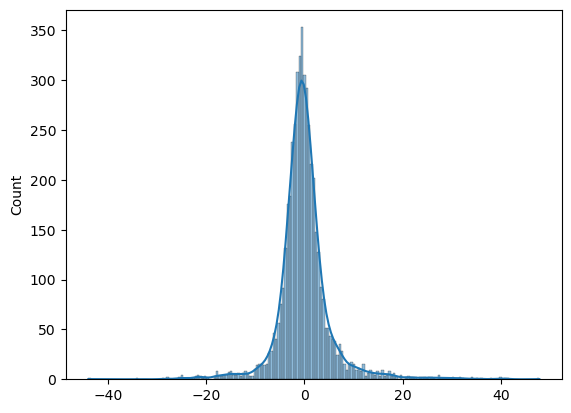

In [132]:
# Plot histogram of residuals
sns.histplot(residual_0, kde = True)

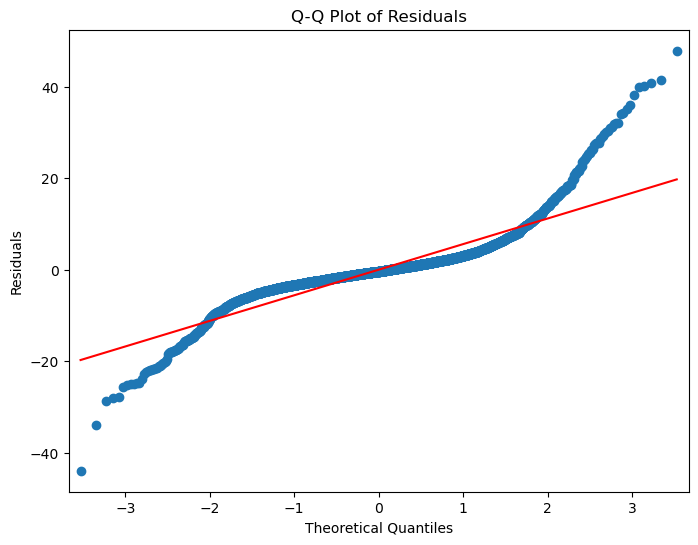

In [133]:
# Generate a Q-Q plot of the residuals
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residual_0, line='s', ax=ax)

# Set plot labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Residuals')
ax.set_title('Q-Q Plot of Residuals')

# Display the plot
plt.show()

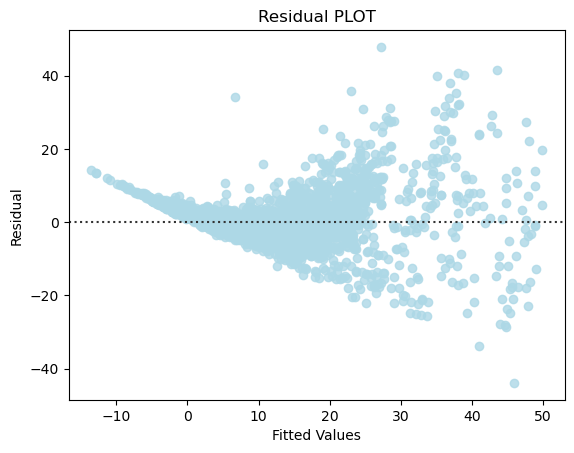

In [134]:
# Predicted values
fitted = ols_res_7.fittedvalues

sns.residplot(x = fitted, y = residual_0, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

In [135]:
# Log transformation in the dependent variable.
train_target_log = np.log(y_train)

In [136]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_8 = sm.OLS(train_target_log, X_train_7)

# Fitting the Model
ols_res_8 = ols_model_8.fit()


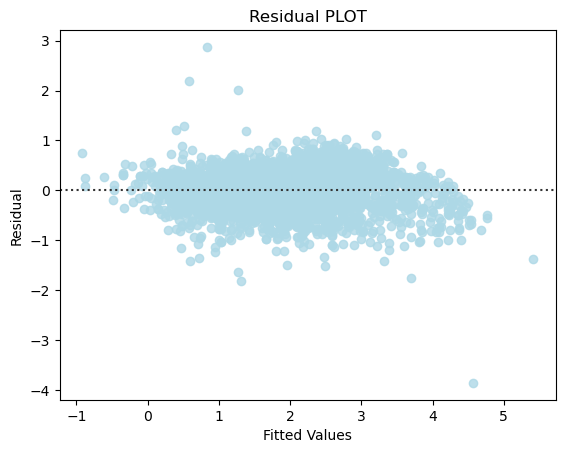

In [137]:
# Predicted values
fitted = ols_res_8.fittedvalues

# Residuals
residual_1 = ols_res_8.resid 

sns.residplot(x = fitted, y = residual_1, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

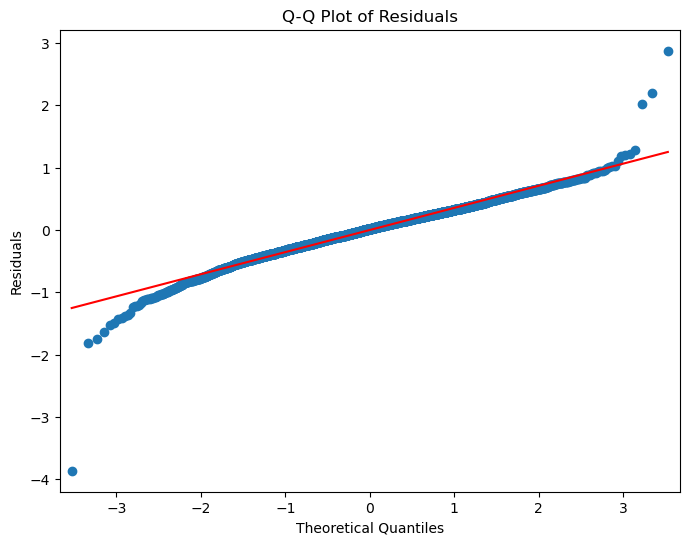

In [138]:
# Generate a Q-Q plot of the residuals_1 after log transformation
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residual_1, line='s', ax=ax)

# Set plot labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Residuals')
ax.set_title('Q-Q Plot of Residuals')

# Display the plot
plt.show()

<AxesSubplot:ylabel='Count'>

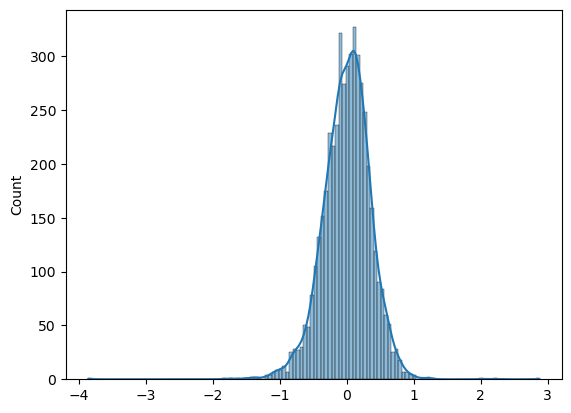

In [139]:
# Plot histogram of residuals after the log transformation
sns.histplot(residual_1, kde = True)

In [140]:
print(ols_res_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     4684.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:24   Log-Likelihood:                -1835.5
No. Observations:                4799   AIC:                             3683.
Df Residuals:                    4793   BIC:                             3722.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -268.9240    

In [141]:
# Getting the evaluation metrics for the this version of the OLS model

lin_reg_test_7 = model_performance_regression(ols_res_8, X_train_7, train_target_log)
lin_reg_test_7

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.354705  0.270891    0.83011        0.829897   inf

In [142]:
# Getting the evaluation metrics for the this version of the OLS model

lin_reg_test_8 = model_performance_regression(ols_res_8, X_train_7, train_target_log)
lin_reg_test_8

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.354705  0.270891    0.83011        0.829897   inf

In [143]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])],
    index = X_train_7.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  525405.081516
Year                        1.367282
Kilometers_Driven           1.489122
Engine                      2.429683
New_price                   2.610319
Transmission_Manual         1.631184
dtype: float64



**Observations**

- It is curious that the **condition number** is very high even though the **VIF** results don't show multicollinearity. It is my understanding that this might be caused by the difference in the features scale. Therefore, we will try the same process with the **data scaled**.
- **Outliers** can also be a variable that influences this score, however, as explained before, all of the remaining values that could be considered outliers, are perfectly inside the realm of reality and therefore, we will not be dropping them.

### Cross Validation

In [144]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 10  # Choose the desired number of folds
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

lin_reg = LinearRegression()

mse_scores = -1 * cross_val_score(lin_reg, X_train_7, y_train, cv=cv, scoring='neg_mean_squared_error')

rmse_scores = np.sqrt(mse_scores)

mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

Mean RMSE: 5.584037176079837
Standard Deviation of RMSE: 0.45469344550272833


### Trying the model with scaled data

In [145]:
# Copying X_train features

X_train_scaled = X_train.copy()

# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(X_train_scaled)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = X_train_scaled.index, columns = X_train_scaled.columns)

train_features_scaled.head(15)

Year  Kilometers_Driven   Mileage    Engine     Power  Seats  \
5638  0.714286           0.160535  0.509839  0.311334  0.209476  0.375   
1758  0.666667           0.290970  0.619261  0.241033  0.131313  0.625   
2350  0.666667           0.193980  0.607036  0.230580  0.107504  0.375   
4290  0.952381           0.063545  0.506857  0.230785  0.095719  0.375   
3040  0.904762           0.034114  0.574538  0.424472  0.320875  0.375   
5978  0.714286           0.230769  0.703339  0.264808  0.079024  0.375   
3435  0.809524           0.084468  0.600477  0.292273  0.130592  0.375   
831   0.904762           0.140468  0.672033  0.271367  0.131145  0.375   
1485  0.619048           0.120401  0.685748  0.271367  0.134199  0.375   
1508  0.714286           0.239084  0.697674  0.241033  0.095719  0.375   
440   0.857143           0.273431  0.475850  0.502357  0.067100  0.625   
629   0.190476           0.230769  0.000000  0.207829  0.066859  0.375   
1356  0.666667           0.160562  0.587358  0.148391  0.029101  0.375   
5595  0.857143           0.268977  0.387299  0.496413  0.159692  0.750   
927   0.809524           0.264214  0.678891  0.292273  0.154858  0.375   

      New_price  Location_Bangalore  Location_Chennai  Location_Coimbatore  \
5638   0.056018                 0.0               0.0                  0.0   
1758   0.046023                 0.0               0.0                  0.0   
2350   0.020746                 0.0               0.0                  0.0   
4290   0.028411                 0.0               0.0                  0.0   
3040   0.355633                 0.0               0.0                  0.0   
5978   0.030161                 0.0               0.0                  0.0   
3435   0.035295                 0.0               0.0                  0.0   
831    0.045420                 1.0               0.0                  0.0   
1485   0.044698                 0.0               0.0                  0.0   
1508   0.026164                 0.0               0.0                  0.0   
440    0.043586                 0.0               0.0                  1.0   
629    0.229535                 0.0               1.0                  0.0   
1356   0.013508                 0.0               0.0                  1.0   
5595   0.113348                 0.0               0.0                  0.0   
927    0.044367                 0.0               1.0                  0.0   

      ...  Brand_Mitsubishi  Brand_Nissan  Brand_Porsche  Brand_Renault  \
5638  ...               0.0           0.0            0.0            0.0   
1758  ...               0.0           0.0            0.0            0.0   
2350  ...               0.0           0.0            0.0            0.0   
4290  ...               0.0           0.0            0.0            0.0   
3040  ...               0.0           0.0            0.0            0.0   
5978  ...               0.0           0.0            0.0            0.0   
3435  ...               0.0           0.0            0.0            0.0   
831   ...               0.0           0.0            0.0            0.0   
1485  ...               0.0           0.0            0.0            0.0   
1508  ...               0.0           0.0            0.0            0.0   
440   ...               0.0           0.0            0.0            0.0   
629   ...               0.0           0.0            0.0            0.0   
1356  ...               0.0           0.0            0.0            0.0   
5595  ...               0.0           0.0            0.0            0.0   
927   ...               0.0           0.0            0.0            0.0   

      Brand_Skoda  Brand_Smart  Brand_Tata  Brand_Toyota  Brand_Volkswagen  \
5638          0.0          0.0         0.0           0.0               0.0   
1758          0.0          0.0         0.0           0.0               0.0   
2350          0.0          0.0         0.0           0.0               0.0   
4290          0.0          0.0         0.0           0.0       

In [146]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_0 = sm.OLS(y_train, train_features_scaled)

# Fitting the Model
ols_res_scaled_0 = ols_model_scaled_0.fit()

print(ols_res_scaled_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     380.3
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:26   Log-Likelihood:                -14182.
No. Observations:                4799   AIC:                         2.847e+04
Df Residuals:                    4747   BIC:                         2.880e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **Evaluation Metrics for first build**

In [147]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_0 = model_performance_regression(ols_res_scaled_0, train_features_scaled, y_train)
lin_reg_test_scaled_0

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.647086  2.673607   0.803394        0.801198  54.540605

#### **Removing Multicollinearity**

In [148]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index = train_features_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        5138.642277
Year                            2.133867
Kilometers_Driven               1.866304
Mileage                         3.000828
Engine                         10.819508
Power                          10.190682
Seats                           2.624753
New_price                       5.111772
Location_Bangalore              2.408032
Location_Chennai                2.913202
Location_Coimbatore             3.376565
Location_Delhi                  2.967193
Location_Hyderabad              3.685406
Location_Jaipur                 2.656753
Location_Kochi                  3.482811
Location_Kolkata                2.918211
Location_Mumbai                 3.879243
Location_Pune                   3.289865
Fuel_Type_Diesel               27.535851
Fuel_Type_Electric              1.061326
Fuel_Type_LPG                   1.186237
Fuel_Type_Petrol               28.103089
Transmission_Manual             2.274717
Owner_Type_Fourth & Above       1.018802
Ow

In [149]:
train_features_scaled_1 = train_features_scaled.drop(['Brand_Audi', 'Brand_BMW', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra','Brand_Maruti', 'Brand_Mercedes-Benz',
'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart', 'Brand_Tata',
'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo'], axis=1)

In [150]:
# Adding the intercept term
train_features_scaled_1 = sm.add_constant(train_features_scaled_1)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_1 = sm.OLS(y_train, train_features_scaled_1)

# Fitting the Model
ols_res_scaled_1 = ols_model_scaled_1.fit()

print(ols_res_scaled_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     575.0
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:28   Log-Likelihood:                -14751.
No. Observations:                4799   AIC:                         2.955e+04
Df Residuals:                    4773   BIC:                         2.972e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [151]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_1 = model_performance_regression(ols_res_scaled_1, train_features_scaled_1, y_train)
lin_reg_test_scaled_1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.232499  3.202885   0.750739        0.749381  64.933038

#### **Removing Multicollinearity**

In [152]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_1.values, i) for i in range(train_features_scaled_1.shape[1])],
    index = train_features_scaled_1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        301.318818
Year                           2.039300
Kilometers_Driven              1.815247
Mileage                        2.581534
Engine                         8.206717
Power                          8.417568
Seats                          1.978515
New_price                      4.060061
Location_Bangalore             2.394418
Location_Chennai               2.888952
Location_Coimbatore            3.356254
Location_Delhi                 2.953205
Location_Hyderabad             3.664123
Location_Jaipur                2.633367
Location_Kochi                 3.457858
Location_Kolkata               2.895390
Location_Mumbai                3.843650
Location_Pune                  3.272952
Fuel_Type_Diesel              26.996327
Fuel_Type_Electric             1.048535
Fuel_Type_LPG                  1.182919
Fuel_Type_Petrol              27.519081
Transmission_Manual            1.893535
Owner_Type_Fourth & Above      1.014814
Owner_Type_Second         

In [153]:
train_features_scaled_2 = train_features_scaled_1.drop(['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Fuel_Type_LPG', 'Fuel_Type_Electric'], axis=1)

In [154]:
# Adding the intercept term
train_features_scaled_2 = sm.add_constant(train_features_scaled_2)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_2 = sm.OLS(y_train, train_features_scaled_2)

# Fitting the Model
ols_res_scaled_2 = ols_model_scaled_2.fit()

print(ols_res_scaled_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     647.9
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:29   Log-Likelihood:                -14851.
No. Observations:                4799   AIC:                         2.975e+04
Df Residuals:                    4777   BIC:                         2.989e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [155]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_2 = model_performance_regression(ols_res_scaled_2, train_features_scaled_2, y_train)
lin_reg_test_scaled_2

RMSE      MAE  R-squared  Adj. R-squared       MAPE
0  5.342704  3.24113   0.740129        0.738932  63.917628

In [156]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_2.values, i) for i in range(train_features_scaled_2.shape[1])],
    index = train_features_scaled_2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        121.096314
Year                           2.014463
Kilometers_Driven              1.717570
Mileage                        1.879863
Engine                         7.145192
Power                          8.342491
Seats                          1.943585
New_price                      4.031389
Location_Bangalore             2.394294
Location_Chennai               2.884862
Location_Coimbatore            3.349194
Location_Delhi                 2.947616
Location_Hyderabad             3.659944
Location_Jaipur                2.628359
Location_Kochi                 3.439511
Location_Kolkata               2.892625
Location_Mumbai                3.819674
Location_Pune                  3.261869
Transmission_Manual            1.882155
Owner_Type_Fourth & Above      1.014540
Owner_Type_Second              1.166154
Owner_Type_Third               1.104583
dtype: float64



In [157]:
train_features_scaled_3 = train_features_scaled_2.drop(['Owner_Type_Fourth & Above', 'Owner_Type_Third', 'Owner_Type_Second'], axis=1)

In [158]:
# Adding the intercept term
train_features_scaled_3 = sm.add_constant(train_features_scaled_3)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_3 = sm.OLS(y_train, train_features_scaled_3)

# Fitting the Model
ols_res_scaled_3 = ols_model_scaled_3.fit()

print(ols_res_scaled_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     754.3
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:30   Log-Likelihood:                -14856.
No. Observations:                4799   AIC:                         2.975e+04
Df Residuals:                    4780   BIC:                         2.987e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.1592    

In [159]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_3 = model_performance_regression(ols_res_scaled_3, train_features_scaled_3, y_train)
lin_reg_test_scaled_3

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.348041  3.244095   0.739609        0.738574  63.879052

In [160]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_3.values, i) for i in range(train_features_scaled_3.shape[1])],
    index = train_features_scaled_3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  115.328955
Year                     1.863364
Kilometers_Driven        1.714960
Mileage                  1.878058
Engine                   7.143900
Power                    8.336862
Seats                    1.942068
New_price                4.029033
Location_Bangalore       2.381213
Location_Chennai         2.863314
Location_Coimbatore      3.345832
Location_Delhi           2.947446
Location_Hyderabad       3.653169
Location_Jaipur          2.623658
Location_Kochi           3.435305
Location_Kolkata         2.882499
Location_Mumbai          3.817447
Location_Pune            3.248682
Transmission_Manual      1.882029
dtype: float64



In [161]:
train_features_scaled_4 = train_features_scaled_3.drop(train_features_scaled_3.columns[train_features_scaled_3.columns.str.startswith('Location_')], axis=1)

In [162]:
# Adding the intercept term
train_features_scaled_4 = sm.add_constant(train_features_scaled_4)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_4 = sm.OLS(y_train, train_features_scaled_4)

# Fitting the Model
ols_res_scaled_4 = ols_model_scaled_4.fit()

print(ols_res_scaled_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1604.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:30   Log-Likelihood:                -14959.
No. Observations:                4799   AIC:                         2.994e+04
Df Residuals:                    4790   BIC:                         2.999e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.6915    

In [163]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_4 = model_performance_regression(ols_res_scaled_4, train_features_scaled_4, y_train)
lin_reg_test_scaled_4

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.463907  3.326785   0.728204        0.727694  65.109226

In [164]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_4.values, i) for i in range(train_features_scaled_4.shape[1])],
    index = train_features_scaled_4.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  87.628737
Year                    1.669446
Kilometers_Driven       1.553567
Mileage                 1.845917
Engine                  7.116382
Power                   8.267562
Seats                   1.932393
New_price               3.992934
Transmission_Manual     1.864110
dtype: float64



In [165]:
train_features_scaled_5 = train_features_scaled_4.drop(['Seats', 'Mileage', 'Power'], axis=1)

In [166]:
# Adding the intercept term
train_features_scaled_5 = sm.add_constant(train_features_scaled_5)

# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_5 = sm.OLS(y_train, train_features_scaled_5)

# Fitting the Model
ols_res_scaled_5 = ols_model_scaled_5.fit()

print(ols_res_scaled_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2408.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:31   Log-Likelihood:                -15071.
No. Observations:                4799   AIC:                         3.015e+04
Df Residuals:                    4793   BIC:                         3.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -12.4781    

In [167]:
# Getting the evaluation metrics for the first OLS model

lin_reg_test_scaled_5 = model_performance_regression(ols_res_scaled_5, train_features_scaled_5, y_train)
lin_reg_test_scaled_5

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.592667  3.367629   0.715243        0.714887  64.260951

In [168]:
# checking VIF scores to determine correlation of the independent variables

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_5.values, i) for i in range(train_features_scaled_5.shape[1])],
    index = train_features_scaled_5.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  59.920509
Year                    1.367282
Kilometers_Driven       1.489122
Engine                  2.429683
New_price               2.610319
Transmission_Manual     1.631184
dtype: float64



In [169]:
# Residuals
residual_scaled = ols_res_scaled_5.resid 

In [170]:
residual_scaled.mean()

-4.3825932441131416e-15

<AxesSubplot:ylabel='Count'>

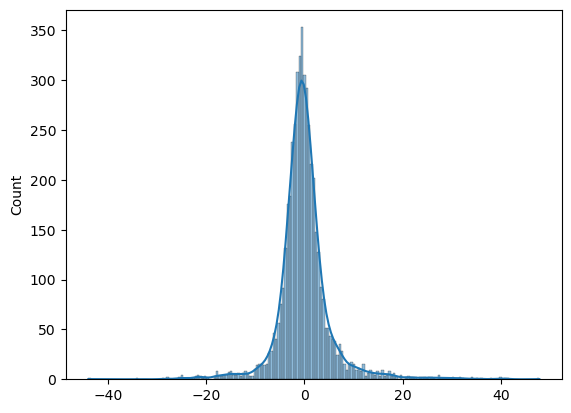

In [171]:
# Plot histogram of residuals
sns.histplot(residual_scaled, kde = True)

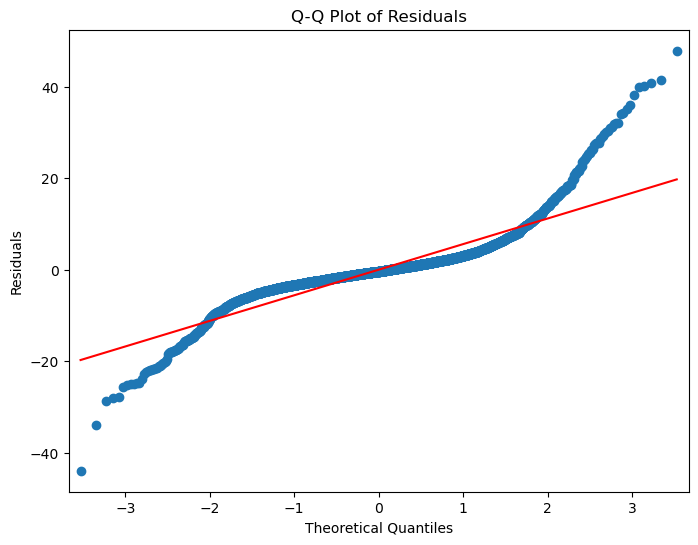

In [172]:
# Generate a Q-Q plot of the residuals
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residual_scaled, line='s', ax=ax)

# Set plot labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Residuals')
ax.set_title('Q-Q Plot of Residuals')

# Display the plot
plt.show()

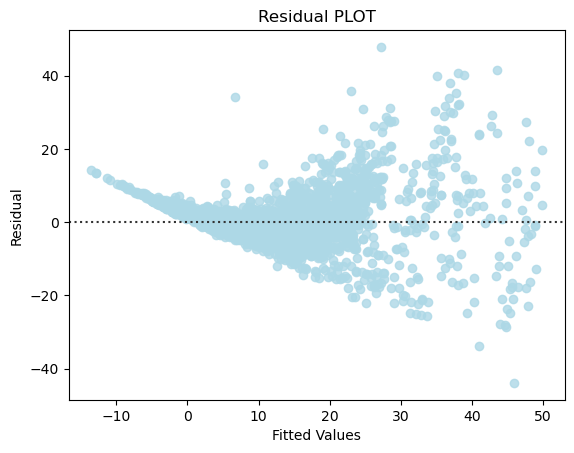

In [173]:
# Predicted values
fitted = ols_res_scaled_5.fittedvalues

sns.residplot(x = fitted, y = residual_scaled, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

In [174]:
# Calling the OLS algorithm on the train features and the target variable
ols_model_scaled_6 = sm.OLS(train_target_log, train_features_scaled_5)

# Fitting the Model
ols_res_scaled_6 = ols_model_scaled_6.fit()


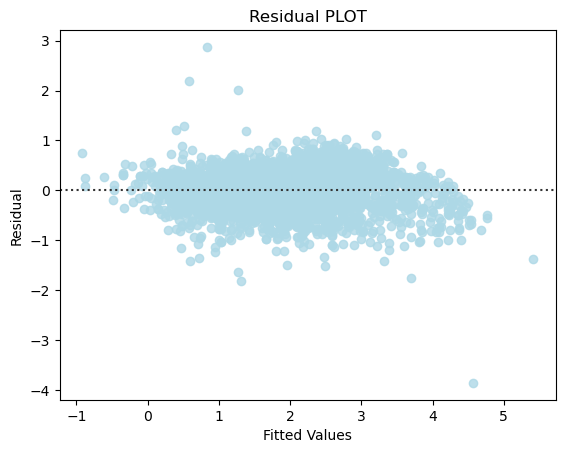

In [175]:
# Predicted values
fitted = ols_res_scaled_6.fittedvalues

# Residuals
residual_scaled_1 = ols_res_scaled_6.resid 

sns.residplot(x = fitted, y = residual_scaled_1, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

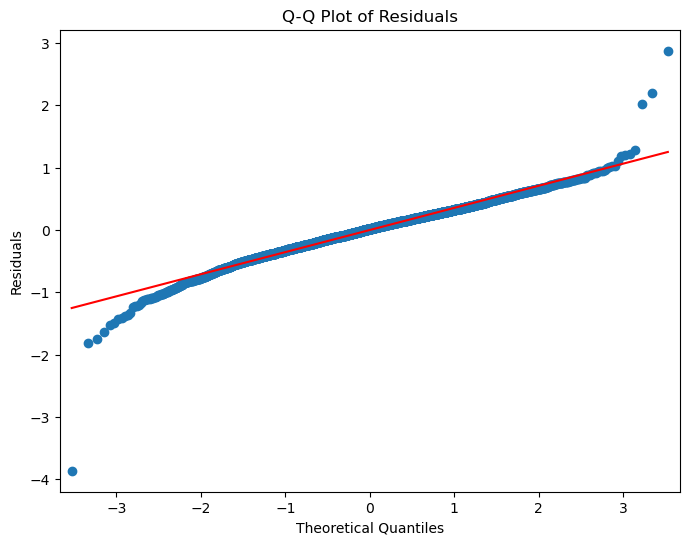

In [176]:
# Generate a Q-Q plot of the residuals_1 after log transformation
fig, ax = plt.subplots(figsize=(8, 6))
qqplot(residual_scaled_1, line='s', ax=ax)

# Set plot labels and title
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Residuals')
ax.set_title('Q-Q Plot of Residuals')

# Display the plot
plt.show()

<AxesSubplot:ylabel='Count'>

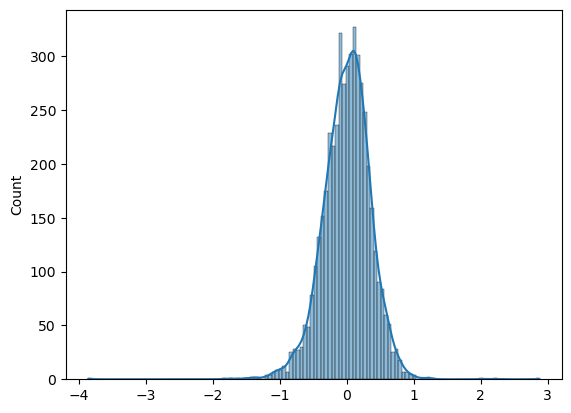

In [177]:
# Plot histogram of residuals after the log transformation
sns.histplot(residual_scaled_1, kde = True)

In [178]:
print(ols_res_scaled_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     4684.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:56:34   Log-Likelihood:                -1835.5
No. Observations:                4799   AIC:                             3683.
Df Residuals:                    4793   BIC:                             3722.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0645    

In [179]:
lin_reg_test_scaled_6 = model_performance_regression(ols_res_scaled_6, train_features_scaled_5, train_target_log)
lin_reg_test_scaled_6

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.354705  0.270891    0.83011        0.829897   inf

**Assumptions of linear regression**

In [180]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, train_features_scaled_5, train_target_log, cv = 10)

cv_Score12 = cross_val_score(linearregression, train_features_scaled_5, train_target_log, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.829 (+/- 0.037)
Mean Squared Error: 0.126 (+/- 0.024)


In [181]:
# printing Mean Square Error score
print("Mean Square Error:", (ols_res_scaled_6.mse_resid))

Mean Square Error: 0.12597282674113222


**Observations**


- The R-Squared on the cross-validation is **0.829 ** which is almost similar to the R-Squared on the training dataset **(0.83)**.
- The MSE on cross-validation is **0.126** which is almost similar to the MSE on the training dataset of **0.1259**

In [182]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(train_target_log, ols_res_scaled_6)

lzip(name, test)

ValueError: not enough values to unpack (expected 2, got 0)

**Observations**


- As we observe from the above test, the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means the residuals are homoscedastic.


- Although the scores might be improved with some more feature engineering, like outlier removal, for example, we will not pursue this route because of what was described before.


- Log transformation of the dependent variable largely helps with normality.

## Lasso Regression

In [183]:
# Removing the constant

X_train_8 = X_train_7.drop('const', axis=1)

In [184]:
# fitting the lasso model
lasso_model = Lasso()
lasso_model.fit(X_train_8, train_target_log)

Lasso()

In [185]:
#Getting the scores for the fitted model
lasso_reg = model_performance_regression(lasso_model, X_train_8, train_target_log)
lasso_reg

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.533692  0.409921   0.615394        0.614993   inf

### Lasso Regression with optimized $\large\alpha$

In [186]:
# optimizing the model

folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train_8,train_target_log)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [187]:
# Getting the best parameters from the grid search performed before.
model_cv.best_params_

{'alpha': 0.001}

In [188]:
#Refitting the model with the optimized settings
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train_8, train_target_log)

Lasso(alpha=0.001)

In [189]:
# Creating a variable for the log transformation of y_test
y_test_log = np.log(y_test)

In [190]:
# Creating a X_test variable with the same variables remaining in X_train
common_columns = X_test.columns.intersection(X_train_8.columns)
X_test_final = X_test[common_columns]

In [191]:
# Getting the scores for the optimized model.
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test_final, y_test_log)
lasso_reg_tuned

RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.354556  0.272954   0.843161        0.842504   inf

**Observations**

- The optimized Lasso Regression model with an alpha value of 0.001 performs better than the original model, with improved R-squared and adjusted R-squared values on the test data. This tells us that the optimized model provides a better fit to the test data and can generalize better to unseen data. 

## Decision Tree

In [192]:
# Fitting the first decision tree model
dtree_0 = DecisionTreeRegressor(random_state=1)
dtree_0.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [193]:
# Getting the model performance stats
dtree_model_train_perf_1 = model_performance_regression(dtree_0, X_test, y_test)
dtree_model_train_perf_1

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  3.979973  1.801846   0.869814        0.863912  20.683777

<AxesSubplot:xlabel='Importance'>

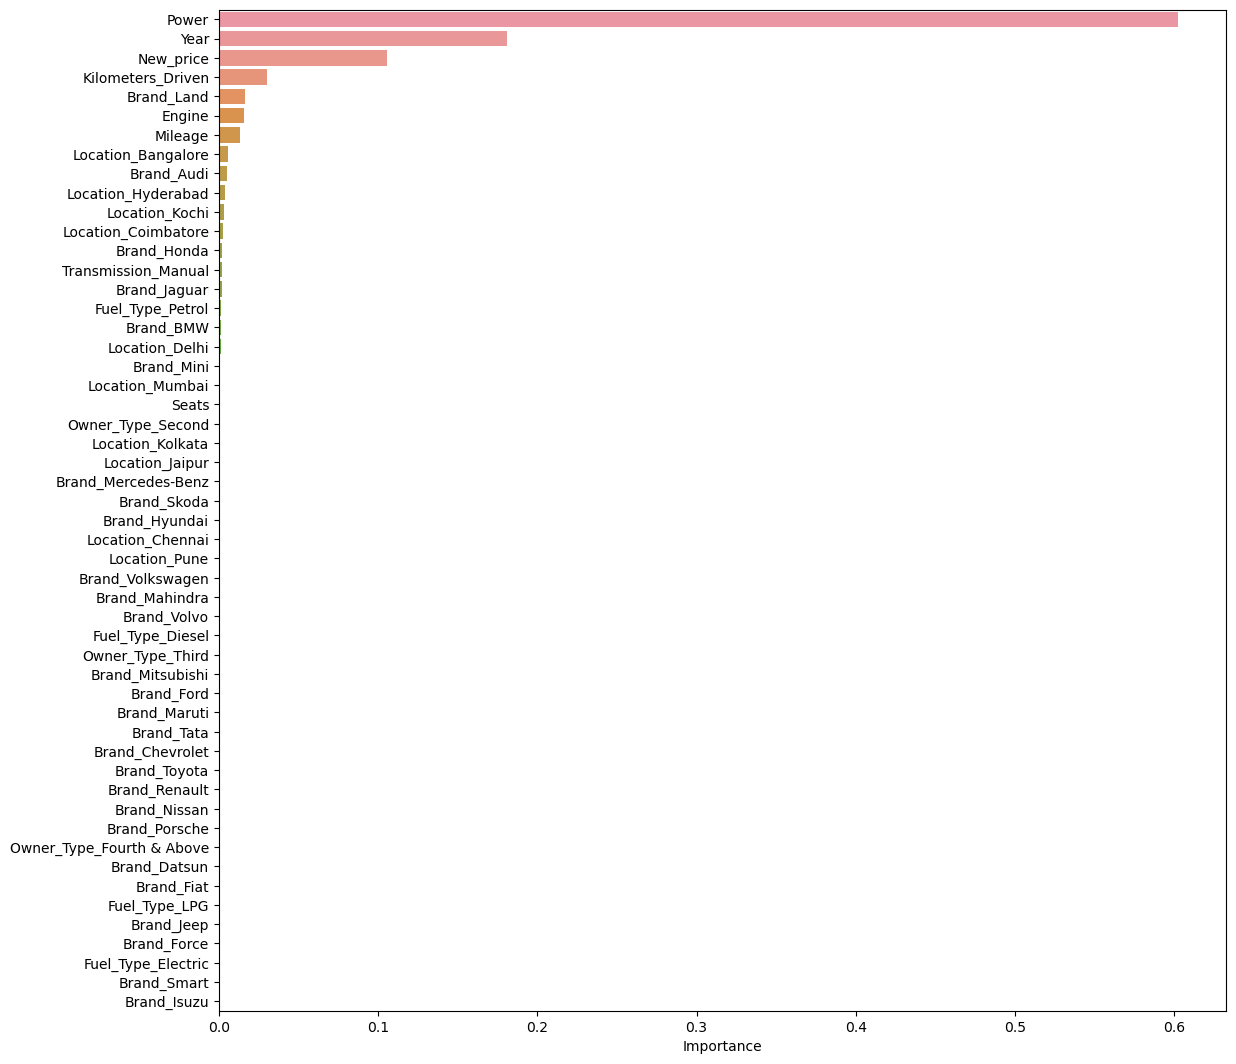

In [194]:
# Plot the feature importance

importances = dtree_0.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

### **Hyperparameter Tuning: Decision Tree**

In [195]:
# Choosing the type of regressor
dtree_estimator = DecisionTreeRegressor(random_state = 1)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = ['r2','neg_mean_absolute_percentage_error']

# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,5,9,12],
           "min_samples_leaf":[1,3,5,7,9,10],
           "min_weight_fraction_leaf":[0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90] }


# Run the grid search
gridCV = GridSearchCV(dtree_estimator, param_grid=parameters, scoring = scoring, cv = 5, refit = 'neg_mean_absolute_percentage_error')

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# best hyperparameters 
gridCV.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [196]:
# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1, random_state=1)

In [197]:
dtree_model_train_perf_2 = model_performance_regression(dtree_estimator, X_test, y_test)
dtree_model_train_perf_2

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  7.153289  3.727726   0.579453        0.560388  46.872185

<AxesSubplot:xlabel='Importance'>

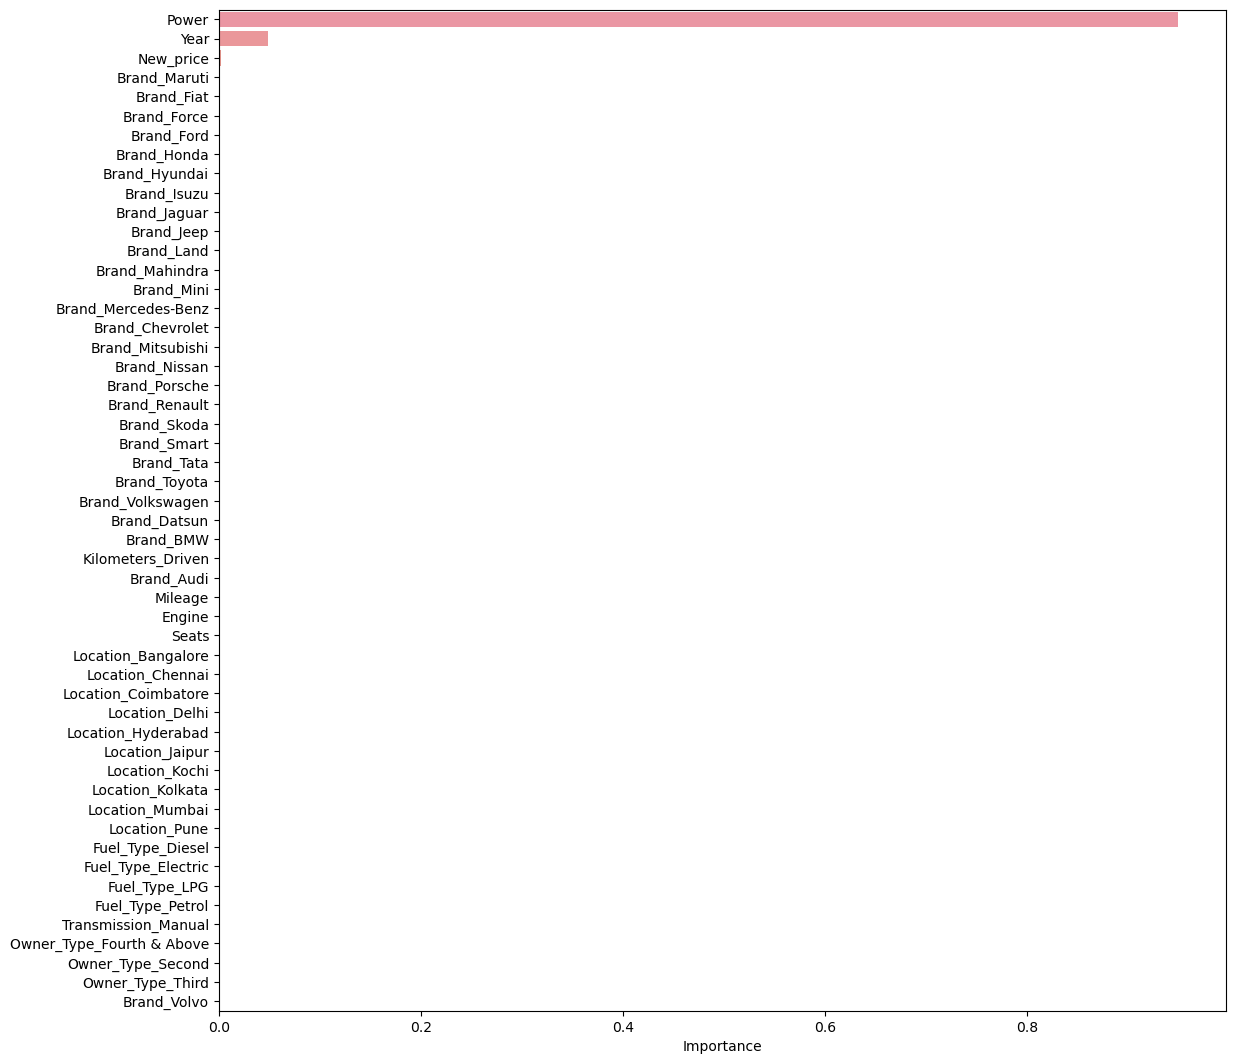

In [198]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

### **Observations**
- In this case, the problem that resulted in the sudden drop in the scores was the GridSearch parameters that did not include in some cases the default option, which turned out to be the best.

In [200]:
# Choose the type of regressor
dtree_estimator_2 = DecisionTreeRegressor(random_state = 1)


# Hyper parameters range intialization for tuning 

parameters_1={"splitter":["best","random"],
            "max_depth" : [None,1,5,9,12],
           "min_samples_leaf":[1,3,5,7,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.3,0.5,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50,70,90] }


# Run the grid search
gridCV_1 = GridSearchCV(dtree_estimator_2, param_grid = parameters_1, scoring = 'r2', cv = 10)

# Fitting the grid search on the train data
gridCV_1 = gridCV_1.fit(X_train, y_train)

# best hyperparameters 
gridCV_1.best_params_

KeyboardInterrupt: 

In [201]:
# Set the classifier to the best combination of parameters
dtree_estimator_2 = gridCV_1.best_estimator_

# Fit the best estimator to the data
dtree_estimator_2.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
dtree_model_train_perf_2 = model_performance_regression(dtree_estimator_2, X_test, y_test)
dtree_model_train_perf_2

**Observation**

- With the parameters corrected, the scores increased significantly.
- This grid search was made to improve r2, however, the r-score was already very solid. 
It could be possible with more computational power to improve the grid search.

In [202]:
#Visualizing the first 4 branches of the decision tree.
from sklearn import tree

features = list(X_train.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator_2, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 3000x2000 with 0 Axes>

In [203]:
# The next 3 cells drop categorical dummy variables to test if they have an negative impact on the model.
X_train_dt_0 = X_train.drop(X_train.columns[X_train.columns.str.startswith('Brand_')], axis=1)

In [204]:
X_train_dt_0 = X_train_dt_0.drop(X_train_dt_0.columns[X_train_dt_0.columns.str.startswith('Owner')], axis=1)

In [205]:
X_train_dt_0 = X_train_dt_0.drop(X_train_dt_0.columns[X_train_dt_0.columns.str.startswith('Location')], axis=1)

In [206]:
# Plot the feature importance

importances = dtree_estimator_2.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [207]:
# Creating a test variable without the same columns as we dropped above.
columns_to_drop = X_test.columns[X_test.columns.str.startswith('Brand_')].tolist() + \
                 X_test.columns[X_test.columns.str.startswith('Owner')].tolist() + \
                 X_test.columns[X_test.columns.str.startswith('Location')].tolist()

X_test_dt_0 = X_test.drop(columns_to_drop, axis=1)

In [208]:
# Repeating the process after dropping the above variables

dtree_estimator_3 = DecisionTreeRegressor(random_state = 1)

# Run the grid search
gridCV_2 = GridSearchCV(dtree_estimator_2, param_grid = parameters_1, scoring = 'r2', cv = 10)

# Fitting the grid search on the train data
gridCV_2 = gridCV_2.fit(X_train_dt_0, y_train)

# best hyperparameters 
gridCV_2.best_params_

KeyboardInterrupt: 

In [ ]:
# Set the classifier to the best combination of parameters
dtree_estimator_3 = gridCV_2.best_estimator_

# Fit the best estimator to the data
dtree_estimator_3.fit(X_train_dt_0, y_train)

In [ ]:
dtree_model_train_perf_3 = model_performance_regression(dtree_estimator_3, X_test_dt_0, y_test)
dtree_model_train_perf_3

**Observations**

- Dropping some of the categorical columns that could be making the model slightly biased didn't help to increase the scores. Therefore, we conclude the best model to be "dtree_estimator_2".

In [ ]:
y_pred = dtree_estimator_3.predict(X_test_dt_0)
y_pred

In [ ]:
# Scatter Plot to show the comparison of the distribution between the real values of the test data vs the pedicted data
plt.scatter(X_test['Kilometers_Driven'], y_test, color='red', label='Real')
plt.scatter(X_test['Kilometers_Driven'], y_pred, color='blue', label='Predicted')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Comparison of Real Price vs Predicted Price')
plt.legend()
plt.show()


**Observation**

The distribution of the predicted values vs the original values presents a very strong predictor.

## Random Forest

In [209]:
# Fittig the first Random Forest model
forest_0 = RandomForestRegressor(random_state=1)
forest_0.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [210]:
# Getting performance metrics for the model
forest_model_train_perf_0 = model_performance_regression(forest_0, X_test, y_test)
forest_model_train_perf_0

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  2.97414  1.364525   0.927301        0.924006  16.196208

**Feature Importance**

<AxesSubplot:xlabel='Importance'>

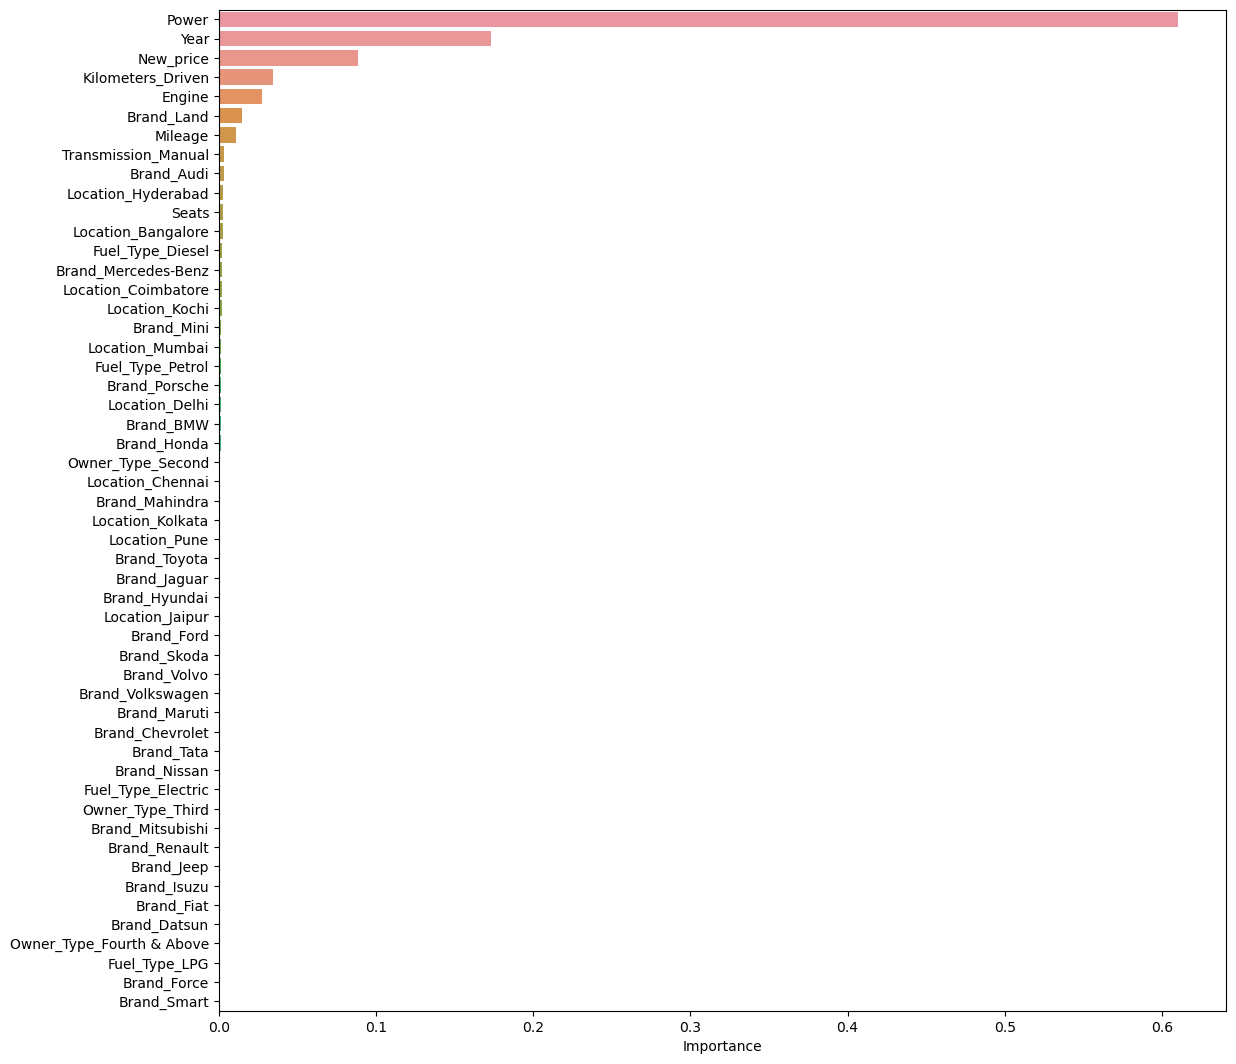

In [211]:
# Plot the feature importance

importances = forest_0.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations**

- The results of the Random Forest are superior to the decision tree and the OLS models. 
- These results show the importance of KNN Imputer, as shall be demonstrated after the hyperparameter tuning.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of regressor
rforest_estimator_0 = RandomForestRegressor(random_state = 1)


# Hyper parameters range intialization for tuning 

parameters_2={"max_depth" : [None,1,5],
           "min_samples_leaf":[1,3,5],
           "min_weight_fraction_leaf":[0.0,0.3,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50],
             "n_jobs": [-1]}


# Run the grid search
gridCV_3 = GridSearchCV(rforest_estimator_0, param_grid = parameters_2, scoring = 'r2', cv = 2)

# Fitting the grid search on the train data
gridCV_3 = gridCV_3.fit(X_train, y_train)

# best hyperparameters 
gridCV_3.best_params_

In [ ]:
# Set the classifier to the best combination of parameters
rforest_estimator_0 = gridCV_3.best_estimator_

# Fit the best estimator to the data
rforest_estimator_0.fit(X_train, y_train)

In [ ]:
# Getting performance metrics for the model
rforest_model_train_perf_1 = model_performance_regression(rforest_estimator_0, X_test, y_test)
rforest_model_train_perf_1

**Feature Importance**

In [ ]:
# Plot the feature importance

importances = rforest_estimator_0.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations**

- Contrary to intuition, hyoerparameter optimization did not contribute to improve the random fores scores. Too many features lost explanability. This might indicate a poor data Preprocessing. 

## XGBoost

In [212]:
import xgboost as xgb
# Importing the XGBClassifier from the xgboost library
from xgboost import XGBRegressor


In [213]:
# XGBoost Regressor
xgb = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=1, ...)

In [214]:
# Getting performance metrics for the model
xgb_model_train_perf = model_performance_regression(xgb, X_test, y_test)
xgb_model_train_perf

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  2.798054  1.274769   0.935655        0.932738  15.004509

<AxesSubplot:xlabel='Importance'>

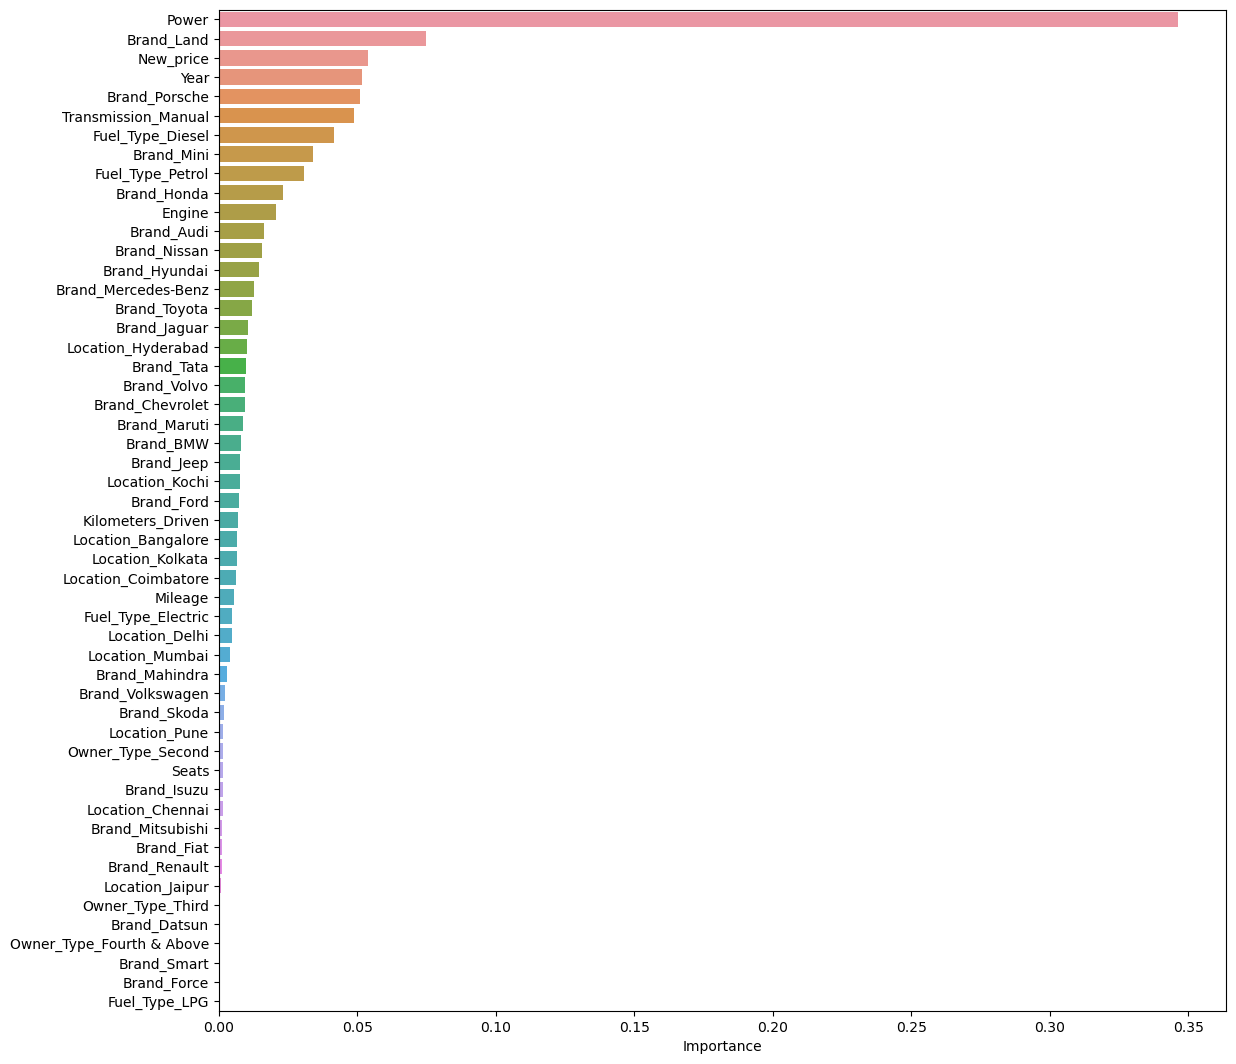

In [215]:
# Plot the feature importance

importances = xgb.feature_importances_

columns = X_test.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

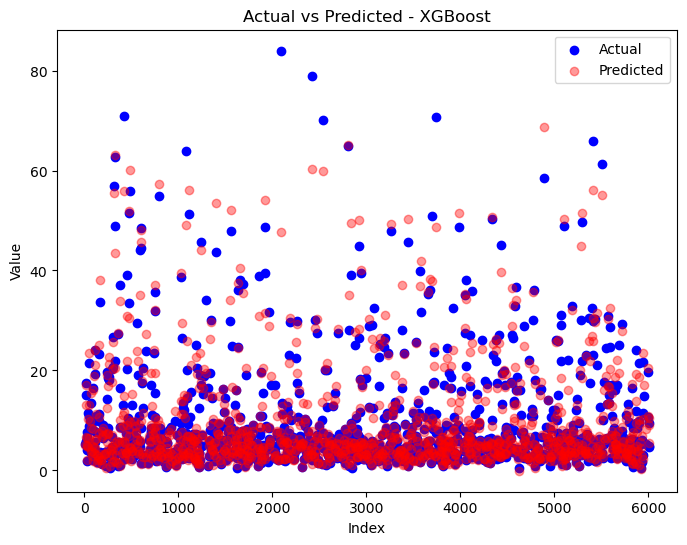

In [216]:
# Predicting the target variable for y_test
y_pred_XGB = xgb.predict(X_test)

# Creating a DataFrame for comparison
comparison_df_XGB = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_XGB})

# Scatter plot comparing the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_XGB.index, comparison_df_XGB['Actual'], color='blue', label='Actual')
plt.scatter(comparison_df_XGB.index, comparison_df_XGB['Predicted'], color='red', label='Predicted', alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted - XGBoost')
plt.legend()
plt.show()

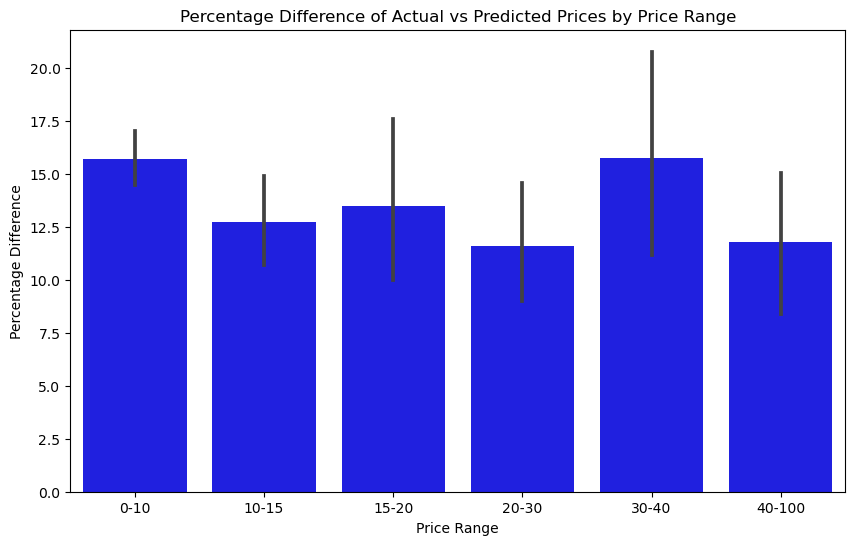

In [217]:
# Binning the values based on 'Price'
bins = [0, 10, 15, 20, 30, 40, 100]
labels = ['0-10', '10-15', '15-20', '20-30', '30-40', '40-100']
comparison_df_XGB['Price Range'] = pd.cut(comparison_df_XGB['Actual'], bins=bins, labels=labels)

# Calculate the percentage differences between actual and predicted prices in each bin
percentage_diff = (abs(comparison_df_XGB['Predicted'] - comparison_df_XGB['Actual']) / comparison_df_XGB['Actual']) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y=percentage_diff, data=comparison_df_XGB, color='blue')

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference of Actual vs Predicted Prices by Price Range')

# Show the plot
plt.show()


In [218]:
# Calculating the absolute percentage difference
comparison_df_XGB['Percentage Difference'] = np.abs((comparison_df_XGB['Actual'] - comparison_df_XGB['Predicted']) / comparison_df_XGB['Actual']) * 100
comparison_df_XGB

Actual  Predicted Price Range  Percentage Difference
85      3.25   2.861243        0-10              11.961768
2415    3.90   4.176873        0-10               7.099313
5006    5.50   4.920847        0-10              10.530047
348     5.25   5.947007        0-10              13.276327
80      3.75   3.851633        0-10               2.710222
996     4.50   4.798651        0-10               6.636683
4961    5.00   6.619373        0-10              32.387457
4085    5.67   5.551002        0-10               2.098730
3946    3.46   3.258215        0-10               5.831938
1873    4.25   3.872669        0-10               8.878371
4470   17.00  16.762400       15-20               1.397649
754     8.46   7.760178        0-10               8.272127
1750    5.99   6.938032        0-10              15.826914
3657    4.50   4.366048        0-10               2.976704
1237   17.00  17.619476       15-20               3.643978
5437    1.90   2.305937        0-10              21.365108
3167    2.25   2.878546        0-10              27.935357
5618    5.50   4.338776        0-10              21.113162
3313    8.50   7.419744        0-10              12.708894
3200    4.00   2.738106        0-10              31.547356
4859    3.10   2.728854        0-10              11.972438
3241    4.67   4.135750        0-10              11.440037
532     8.36   9.964269        0-10              19.189817
1583    3.02   3.515731        0-10              16.414945
3927   32.50  24.057964       30-40              25.975494
3686    1.49   1.734389        0-10              16.401943
2842    0.45   1.038870        0-10             130.859995
765     7.75   8.902165        0-10              14.866650
1110    2.50   2.697478        0-10               7.899103
1843    0.90   0.830471        0-10               7.725414
235    19.64  19.163235       15-20               2.427522
3662    3.45   3.051073        0-10              11.563106
4984    5.50   4.477646        0-10              18.588248
179     1.50   2.072964        0-10              38.197629
4329    5.36   5.451319        0-10               1.703708
5298   21.99  18.497099       20-30              15.884043
1536    2.79   2.806898        0-10               0.605667
1440    2.60   2.069180        0-10              20.416144
2821    4.99   4.751607        0-10               4.777416
4084    6.50   6.960588        0-10               7.085969
3364    2.15   2.341143        0-10               8.890356
5671    4.15   4.024056        0-10               3.034785
1185    7.20   8.510272        0-10              18.198223
732     2.90   2.901399        0-10               0.048254
3476    3.25   4.268092        0-10              31.325912
3922    3.75   4.012993        0-10               7.013143
4970    2.20   2.669304        0-10              21.332006
879     5.50   5.793834        0-10               5.342432
2443    3.19   2.668476        0-10              16.348719
169    33.66  38.069939       30-40              13.101422
3016    4.75   6.730996        0-10              41.705172
1482   11.64  13.245642       10-15              13.794173
4871    6.79   7.053584        0-10               3.881945
4034    5.75   5.663064        0-10               1.511922
1364    3.34   3.799119        0-10              13.746085
327    62.67  63.080540      40-100               0.655082
5798    9.66  10.812686        0-10              11.932567
5685   25.00  19.425060       20-30              22.299759
4426    2.44   2.604662        0-10               6.748440
4848   16.00  15.000772       15-20               6.245172
1572   24.90  16.658133       20-30              33.099869
3390    1.80   1.070195        0-10              40.544718
2560    5.17   5.643813        0-10               9.164664
5766    2.60   3.288262        0-10              26.471611
5145    3.95   3.192359        0-10              19.180786
5465    2.75   3.473316        0-10              26.302416
474     4.50   4.483470        0-10               0.3

In [219]:
Perc_Diff = comparison_df_XGB.assign(bin_label=lambda x: np.where(x['Percentage Difference'] < 2.5, 'bin1',
                                                                  np.where(x['Percentage Difference'] < 5, 'bin2',
                                                                           np.where(x['Percentage Difference'] < 7.5, 'bin3',
                                                                                    np.where(x['Percentage Difference'] < 10, 'bin4',
                                                                                             np.where(x['Percentage Difference'] >= 10, 'bin5', ''))))))

Perc_Diff

Actual  Predicted Price Range  Percentage Difference bin_label
85      3.25   2.861243        0-10              11.961768      bin5
2415    3.90   4.176873        0-10               7.099313      bin3
5006    5.50   4.920847        0-10              10.530047      bin5
348     5.25   5.947007        0-10              13.276327      bin5
80      3.75   3.851633        0-10               2.710222      bin2
996     4.50   4.798651        0-10               6.636683      bin3
4961    5.00   6.619373        0-10              32.387457      bin5
4085    5.67   5.551002        0-10               2.098730      bin1
3946    3.46   3.258215        0-10               5.831938      bin3
1873    4.25   3.872669        0-10               8.878371      bin4
4470   17.00  16.762400       15-20               1.397649      bin1
754     8.46   7.760178        0-10               8.272127      bin4
1750    5.99   6.938032        0-10              15.826914      bin5
3657    4.50   4.366048        0-10               2.976704      bin2
1237   17.00  17.619476       15-20               3.643978      bin2
5437    1.90   2.305937        0-10              21.365108      bin5
3167    2.25   2.878546        0-10              27.935357      bin5
5618    5.50   4.338776        0-10              21.113162      bin5
3313    8.50   7.419744        0-10              12.708894      bin5
3200    4.00   2.738106        0-10              31.547356      bin5
4859    3.10   2.728854        0-10              11.972438      bin5
3241    4.67   4.135750        0-10              11.440037      bin5
532     8.36   9.964269        0-10              19.189817      bin5
1583    3.02   3.515731        0-10              16.414945      bin5
3927   32.50  24.057964       30-40              25.975494      bin5
3686    1.49   1.734389        0-10              16.401943      bin5
2842    0.45   1.038870        0-10             130.859995      bin5
765     7.75   8.902165        0-10              14.866650      bin5
1110    2.50   2.697478        0-10               7.899103      bin4
1843    0.90   0.830471        0-10               7.725414      bin4
235    19.64  19.163235       15-20               2.427522      bin1
3662    3.45   3.051073        0-10              11.563106      bin5
4984    5.50   4.477646        0-10              18.588248      bin5
179     1.50   2.072964        0-10              38.197629      bin5
4329    5.36   5.451319        0-10               1.703708      bin1
5298   21.99  18.497099       20-30              15.884043      bin5
1536    2.79   2.806898        0-10               0.605667      bin1
1440    2.60   2.069180        0-10              20.416144      bin5
2821    4.99   4.751607        0-10               4.777416      bin2
4084    6.50   6.960588        0-10               7.085969      bin3
3364    2.15   2.341143        0-10               8.890356      bin4
5671    4.15   4.024056        0-10               3.034785      bin2
1185    7.20   8.510272        0-10              18.198223      bin5
732     2.90   2.901399        0-10               0.048254      bin1
3476    3.25   4.268092        0-10              31.325912      bin5
3922    3.75   4.012993        0-10               7.013143      bin3
4970    2.20   2.669304        0-10              21.332006      bin5
879     5.50   5.793834        0-10               5.342432      bin3
2443    3.19   2.668476        0-10              16.348719      bin5
169    33.66  38.069939       30-40              13.101422      bin5
3016    4.75   6.730996        0-10              41.705172      bin5
1482   11.64  13.245642       10-15              13.794173      bin5
4871    6.79   7.053584        0-10               3.881945      bin2
4034    5.75   5.663064        0-10               1.511922      bin1
1364    3.34   3.799119        0-10              13.746085      bin5
327    62.67  63.080540      40-100               0.655082      bin1
5798    9.66  10.812686        0-10              11.932567      bin5
5685

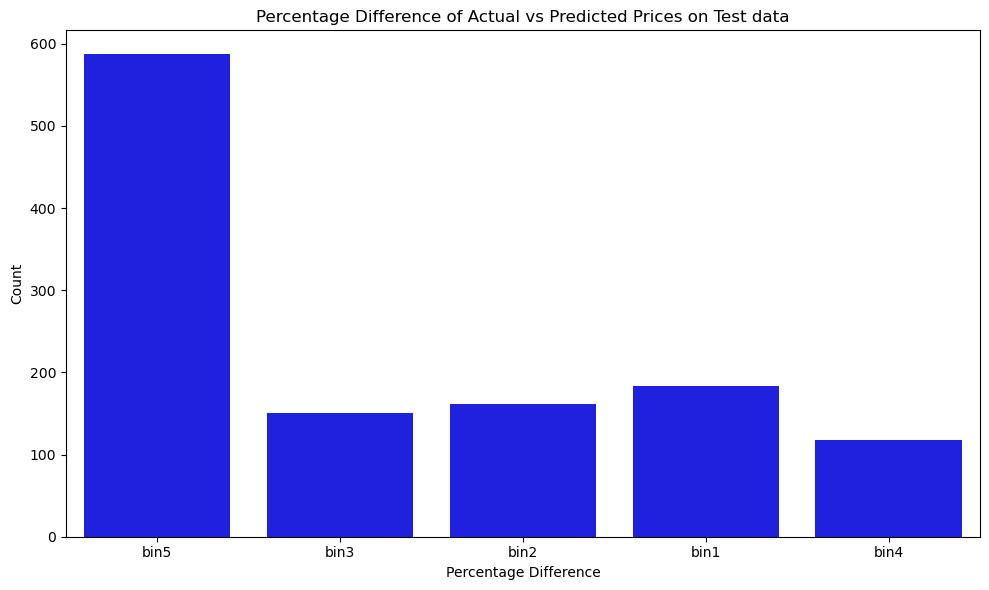

In [220]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='bin_label', data=Perc_Diff, color='blue')

# Add labels and title
plt.xlabel('Percentage Difference')
plt.ylabel('Count')
plt.title('Percentage Difference of Actual vs Predicted Prices on Test data')

# Add value counts to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.tight_layout() 
plt.show()

In [221]:
Perc_Diff['bin_label'].value_counts()

bin5    587
bin1    183
bin2    161
bin3    151
bin4    118
Name: bin_label, dtype: int64

### Retraining the model with Tuned Features

In [245]:
# Creating yet a new df to correct the Mileage values of 0.
cars_df_8 = cars_df_6
#cars_df_8.drop(['Car_Type'], axis = 1, inplace = True)

In [246]:
#Because we mantained the index, we can retrieve an older DF to search for similar cars and input the real Mileage values

cars_df_8[cars_df_8['Mileage'] == 0]

Name    Location  Year  \
14                  Land Rover Freelander 2 TD4 SE        Pune  2012   
67        Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019   
79                          Hyundai Santro Xing XL   Hyderabad  2005   
194                             Honda City 1.5 GXI   Ahmedabad  2007   
229                               Ford Figo Diesel   Bangalore  2015   
262                         Hyundai Santro Xing XL   Hyderabad  2006   
307                         Hyundai Santro Xing XL     Chennai  2006   
422           Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010   
441                  Hyundai Santro GLS I - Euro I  Coimbatore  2012   
542    Mercedes-Benz New C-Class Progressive C 200       Kochi  2019   
629                      Hyundai Santro LS zipPlus     Chennai  2002   
645                         Hyundai Santro Xing XP      Jaipur  2004   
705            Mercedes-Benz M-Class ML 350 4Matic        Pune  2014   
747                   Land Rover Range Rover 3.0 D      Mumbai  2008   
913                            Smart Fortwo CDI AT        Pune  2008   
960       Mercedes-Benz C-Class Progressive C 220d      Mumbai  2018   
994                         Hyundai Santro Xing GL        Pune  2008   
1057                        Hyundai Santro Xing GL   Hyderabad  2010   
1257                 Land Rover Freelander 2 TD4 S   Bangalore  2010   
1269                Hyundai Santro GLS I - Euro II      Jaipur  2009   
1306           Mercedes-Benz M-Class ML 350 4Matic   Bangalore  2014   
1343                             Maruti Baleno Vxi        Pune  2005   
1352                        Hyundai Santro Xing GL       Kochi  2011   
1383                            Honda City 1.5 GXI        Pune  2004   
1417                        Hyundai Santro Xing XL     Chennai  2007   
1458  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1762           Mercedes-Benz M-Class ML 350 4Matic        Pune  2015   
1855                             Hyundai Santro DX   Hyderabad  2007   
2050                       Mahindra Jeep MM 550 PE   Hyderabad  2009   
2093                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2127                Hyundai Santro GLS I - Euro II  Coimbatore  2012   
2264                           Toyota Qualis RS E2        Pune  2004   
2339                             Hyundai Santro AT   Hyderabad  2006   
2538               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2593                        Hyundai Santro Xing XP        Pune  2007   
2677                       Skoda Superb 3.6 V6 FSI   Hyderabad  2010   
2776               Hyundai Santro GLS II - Euro II        Pune  2009   
2837               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3028                        Hyundai Santro Xing XP      Jaipur  2005   
3039                        Hyundai Santro Xing GL     Kolkata  2009   
3056                             Hyundai Santro GS   Ahmedabad  2005   
3087                   Audi A7 2011-2015 Sportback     Kolkata  2012   
3183          Hyundai Santro GS zipDrive - Euro II     Chennai  2002   
3204           Mercedes-Benz M-Class ML 350 4Matic  Coimbatore  2016   
3265                        Hyundai Santro Xing GL   Bangalore  2008   
3510                 Hyundai Santro GLS I - Euro I        Pune  2011   
3516               Hyundai Santro GLS II - Euro II       Kochi  2012   
3639                        Hyundai Santro Xing XP   Bangalore  2004   
4146                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4228           Mercedes-Benz M-Class ML 350 4Matic     Chennai  2012   
4296                        Hyundai Santro Xing GL       Delhi  2012   
4406           Mercedes-Benz M-Class ML 350 4Matic  Coimbatore  2016   
4622                            Fiat Siena 1.2 ELX      Jaipur  2001   
4680                Land Rover Freelander 2 TD4 SE      Jaipur  2012   
4697           Mercedes-Benz M-Class ML 350 4Matic   Bangalore  2015   
5009          

In [247]:
# extracting model names
cars_df_8["Model"] = cars_df_8["Name"].apply(lambda x: x.split(" ")[1].lower())
cars_df_8.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Price  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First   1.75    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First  12.50    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First   4.50    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First   6.00    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second  17.74    15.20  1968.0  140.80    5.0   

   New_price    Brand Car_Class   Model  
0      5.236   Maruti    Class1   wagon  
1     18.392  Hyundai    Class3   creta  
2      8.610    Honda    Class1    jazz  
3     11.692   Maruti    Class2  ertiga  
4     22.518     Audi    Class3      a4

In [248]:
# Let us replace 0 values in mileage_num by NaN
cars_df_8.loc[cars_df_8.Mileage == 0, "Mileage"] = np.nan

In [249]:
# Creating median values for each Model and Brand
mean_mileage = cars_df_8.groupby(["Brand", "Model"]).agg({'Mileage':'median'}).rename(columns = {'Mileage':'median_mileage'}).reset_index()

cars_df_9 = cars_df_8.merge(mean_mileage, on = ["Brand", "Model"], how = 'left')


In [250]:
# Inputing values for Mileage nulls


cars_df_9['Mileage'] = cars_df_9['Mileage'].fillna(cars_df_9['median_mileage'])

#Finding remaining nulls
cars_df_9[cars_df_9['Mileage'].isnull()]

Name    Location  Year  \
67    Mercedes-Benz C-Class Progressive C 220d  Coimbatore  2019   
911                        Smart Fortwo CDI AT        Pune  2008   
958   Mercedes-Benz C-Class Progressive C 220d      Mumbai  2018   
2045                   Mahindra Jeep MM 550 PE   Hyderabad  2009   
4615                        Fiat Siena 1.2 ELX      Jaipur  2001   
5856  Mercedes-Benz C-Class Progressive C 220d   Ahmedabad  2019   
5923                   Mahindra Jeep MM 540 DP     Chennai  2002   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Price  Mileage  \
67                15369    Diesel    Automatic      First  35.67      NaN   
911              103000    Diesel    Automatic     Second   3.00      NaN   
958                8682    Diesel    Automatic      First  39.50      NaN   
2045              26000    Diesel       Manual      First   6.99      NaN   
4615              70000    Petrol       Manual      Third   0.55      NaN   
5856               4000    Diesel    Automatic      First  35.00      NaN   
5923              75000    Diesel       Manual      First   1.70      NaN   

      Engine   Power  Seats  New_price          Brand Car_Class    Model  \
67    1950.0  194.00    5.0     49.140  Mercedes-Benz    Class4  c-class   
911    799.0  133.06    2.0     42.722          Smart    Class1   fortwo   
958   1950.0  194.00    5.0     52.260  Mercedes-Benz    Class4  c-class   
2045  2498.0  115.00    6.0     53.348       Mahindra    Class2     jeep   
4615  1242.0   67.34    5.0     42.722           Fiat    Class1    siena   
5856  1950.0  194.00    5.0     49.140  Mercedes-Benz    Class4  c-class   
5923  2112.0  115.00    6.0     53.348       Mahindra    Class1     jeep   

      median_mileage  
67               NaN  
911              NaN  
958              NaN  
2045             NaN  
4615             NaN  
5856             NaN  
5923             NaN

In [251]:
# A search allows us to input real values for the Mileage remaining nulls

cars_df_9.loc[cars_df_9['Brand'] == 'Mercedes-Benz', 'Mileage'] = 12.06
cars_df_9.loc[cars_df_9['Brand'] == 'Smart', 'Mileage'] = 29.04
cars_df_9.loc[cars_df_9['Brand'] == 'Mahindra', 'Mileage'] = 10
cars_df_9.loc[cars_df_9['Brand'] == 'Fiat', 'Mileage'] = 15.5

In [252]:
# Calculating the mean depreciation for the cars in the dataset
depreciation_mean = ((cars_df_9['New_price'] - cars_df_9['Price']) / cars_df_9['New_price']) * 100
mean_depreciation_percentage = depreciation_mean.mean()
print(mean_depreciation_percentage)

51.33857431447154


In [253]:
cars_df_10 = cars_df_9

# Perform one-hot encoding on categorical features
cars_df_10 = pd.get_dummies(cars_df_10, columns=['Location', 'Fuel_Type', 'Owner_Type','Brand', 'Model', 'Car_Class', 'Transmission'])


In [254]:
cars_df_9.loc[[1235, 3307, 763, 167, 3753, 2531]]

Name    Location  Year  \
1235  Mercedes-Benz New C-Class C 220d Avantgarde Ed...      Mumbai  2013   
3307                         Hyundai Elantra CRDi SX AT        Pune  2013   
763                                 Chevrolet Cruze LTZ      Jaipur  2017   
167           Mercedes-Benz New C-Class C 220 CDI Style  Coimbatore  2017   
3753                             Maruti Swift Dzire VXI        Pune  2016   
2531  Mercedes-Benz E-Class 2015-2017 E350 CDI Avant...       Kochi  2018   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Price  Mileage  \
1235              87000    Diesel    Automatic     Second  17.00    12.06   
3307              48823    Diesel    Automatic      First   8.50    19.50   
763               51087    Diesel       Manual      First   7.75    17.90   
167               23550    Diesel    Automatic      First  33.66    12.06   
3753              32000    Petrol       Manual      First   5.30    19.10   
2531              21603    Diesel    Automatic      First  70.15    12.06   

      Engine   Power  Seats  New_price          Brand Car_Class    Model  \
1235  2143.0  167.62    5.0     64.044  Mercedes-Benz    Class3      new   
3307  1582.0  126.24    5.0     17.114        Hyundai    Class2  elantra   
763   1998.0  163.70    5.0     39.214      Chevrolet    Class2    cruze   
167   2143.0  167.62    5.0     64.044  Mercedes-Benz    Class4      new   
3753  1197.0   85.80    5.0     10.214         Maruti    Class2    swift   
2531  2987.0  265.00    5.0    167.800  Mercedes-Benz    Class5  e-class   

      median_mileage  
1235           14.84  
3307           22.62  
763            17.90  
167            14.84  
3753           20.85  
2531           13.00

In [255]:
#Filtering the data to include only prices below 70
filtered_cars_df = cars_df_9[cars_df_9['Price'] < 70]

#Grouping the filtered data by "Location" and calculating the median "Price"
median_prices = filtered_cars_df.groupby('Location')['Price'].median()

#Calculating the percentage difference between median prices
percentage_diff = (median_prices - median_prices.median()) / median_prices.median() * 100

#Displaying the median prices and percentage differences
result_df = pd.DataFrame({'Median Price': median_prices, 'Percentage Difference': percentage_diff})
print(result_df)

            Median Price  Percentage Difference
Location                                       
Ahmedabad          5.900               2.608696
Bangalore          6.750              17.391304
Chennai            4.500             -21.739130
Coimbatore         8.240              43.304348
Delhi              5.500              -4.347826
Hyderabad          5.800               0.869565
Jaipur             4.250             -26.086957
Kochi              6.695              16.434783
Kolkata            3.650             -36.521739
Mumbai             5.750               0.000000
Pune               4.250             -26.086957


In [256]:
cars_df_10.drop(['Name', 'median_mileage'], axis = 1, inplace = True)

In [257]:
# Split the data for XGBoost training and testing

X_xgb = cars_df_10.drop('Price', axis=1)  # Features 
y_xgb = cars_df_10['Price']  # Target variable

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train_xgb.shape, y_train_xgb.shape)
print("Test set shape:", X_test_xgb.shape, y_test_xgb.shape)

Training set shape: (4799, 271) (4799,)
Test set shape: (1200, 271) (1200,)


In [258]:
# XGBoost Regressor
xgb2 = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb2.fit(X_train_xgb,y_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=1, ...)

In [259]:
xgb2.save_model("xgboost_model.json")

In [260]:
# Getting performance metrics for the model
xgb_model_train_perf_2 = model_performance_regression(xgb2, X_test_xgb, y_test_xgb)
xgb_model_train_perf_2

RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  1.780271  0.947408   0.973952        0.966345  11.518727

In [261]:
# Plot the feature importance

importances = xgb2.feature_importances_

columns = X_test_xgb.columns


In [262]:
total_importance = np.sum(importances)
importance_percentages = importances / total_importance * 100
importance_df_xgb = pd.DataFrame({'Feature': columns, 'Importance': importance_percentages})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)
importance_df_xgb.head(20)

Feature  Importance
267        Car_Class_Class5   28.234138
268        Car_Class_Class6   26.361862
4                     Power   12.882906
264        Car_Class_Class2    8.134122
266        Car_Class_Class4    8.016291
263        Car_Class_Class1    5.561041
265        Car_Class_Class3    2.722761
48            Brand_Porsche    0.718489
42           Brand_Mahindra    0.391828
41               Brand_Land    0.373382
6                 New_price    0.322015
190                Model_q5    0.197227
19         Fuel_Type_Diesel    0.187606
269  Transmission_Automatic    0.166046
247                Model_x5    0.162003
246                Model_x3    0.159913
59                  Model_5    0.157879
44      Brand_Mercedes-Benz    0.149149
53             Brand_Toyota    0.145615
3                    Engine    0.137836

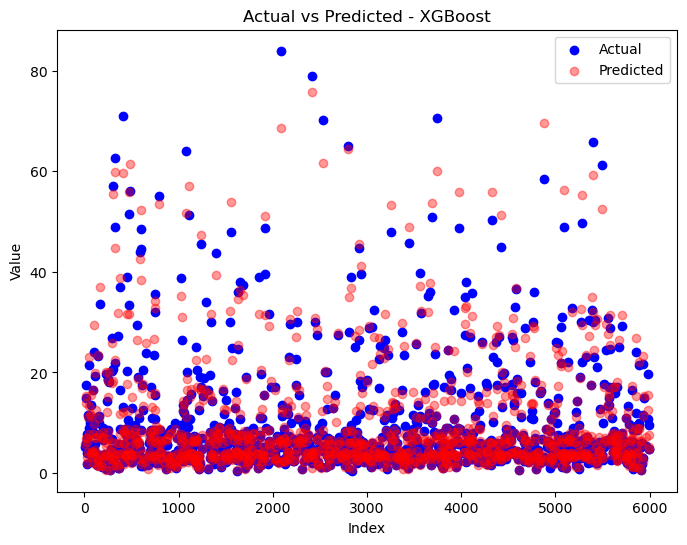

In [263]:
# Predicting the target variable for y_test
y_pred_XGB_2 = xgb2.predict(X_test_xgb)

# Creating a DataFrame for comparison
comparison_df_XGB_2 = pd.DataFrame({'Actual': y_test_xgb, 'Predicted': y_pred_XGB_2})

# Scatter plot comparing the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(comparison_df_XGB_2.index, comparison_df_XGB_2['Actual'], color='blue', label='Actual')
plt.scatter(comparison_df_XGB_2.index, comparison_df_XGB_2['Predicted'], color='red', label='Predicted', alpha=0.4)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted - XGBoost')
plt.legend()
plt.show()

**Observations**

- The Tuned XGBoost Model obtained the best results so far. The improved data preprocessing and perfected feature engineering were certainly a very big contributor for these excelent results.

# Implementing Model

In [319]:
cars_df_predict = cars_df_3

In [320]:
# Extracting a new column "Brand" from the "Name" column.
cars_df_predict_1 = cars_df_predict
cars_df_predict_1['Brand'] = cars_df_predict_1['Name'].str.split().str[0]

In [321]:
# extracting model names
cars_df_predict_2 = cars_df_predict_1
cars_df_predict_2["Model"] = cars_df_predict_2["Name"].apply(lambda x: x.split(" ")[1].lower())


In [322]:
cars_df_predict_3 = cars_df_predict_2.drop('Name', axis = 1)

In [323]:
cars_df_predict_4 = cars_df_predict_3
cars_df_predict_4['Car_Class'] = pd.cut(cars_df_predict_4['New_price'],[-np.inf,4.99,9.99,20.99,49.99,89.99,np.inf],
                       labels=["Class1","Class2","Class3","Class4","Class5","Class6"])

cars_df_predict_4['Car_Class'].value_counts()

Class2    2586
Class3    2340
Class4    1220
Class5     444
Class1     347
Class6     308
Name: Car_Class, dtype: int64

In [324]:
cars_df_predict_5 = cars_df_predict_4
cars_df_predict_5 = pd.get_dummies(cars_df_predict_4, columns=['Location', 'Fuel_Type', 'Owner_Type','Brand', 'Model', 'Car_Class', 'Transmission'])

In [325]:
cars_df_predict_noprice = cars_df_predict_5[cars_df_predict_5['Price'].isnull()]
cars_df_predict_6 = cars_df_predict_5[~cars_df_predict_5['Price'].isnull()]

In [329]:
# Split the data for XGBoost training and testing

X_xgb_2 = cars_df_predict_6.drop('Price', axis=1)  # Features 
y_xgb_2 = cars_df_predict_6['Price']  # Target variable

X_train_xgb_2, X_test_xgb_2, y_train_xgb_2, y_test_xgb_2 = train_test_split(X_xgb_2, y_xgb_2, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train_xgb_2.shape, y_train_xgb_2.shape)
print("Test set shape:", X_test_xgb_2.shape, y_test_xgb_2.shape)

Training set shape: (4809, 286) (4809,)
Test set shape: (1203, 286) (1203,)


In [330]:
# XGBoost Regressor
xgb3 = XGBRegressor(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb3.fit(X_train_xgb_2,y_train_xgb_2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=1, ...)

In [351]:
# Getting performance metrics for the model
xgb_model_train_perf_3 = model_performance_regression(xgb3, X_test_xgb_2, y_test_xgb_2)
xgb_model_train_perf_3

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  3.502515  1.336915   0.894669        0.861782  17.49306

In [352]:
cars_df_predict_noprice_2 = cars_df_predict_noprice.drop('Price', axis=1)

In [353]:
xgb3.predict(cars_df_predict_noprice_2)

array([ 2.973951 ,  2.8428223, 19.49924  , ...,  2.8754356,  5.3058996,
       19.682411 ], dtype=float32)

In [354]:
cars_df_predict_noprice_2['Price'] = xgb3.predict(cars_df_predict_noprice_2)

In [355]:
cars_df_predict_noprice_2

Year  Kilometers_Driven  Mileage  Engine    Power  Seats  New_price  \
6012  2014              40929    32.26   998.0   58.200    4.0      5.320   
6013  2013              54493    24.70   796.0   47.300    5.0      4.622   
6014  2017              34000    13.68  2393.0  147.800    7.0     25.270   
6015  2012             139000    23.59  1364.0   67.058    5.0      9.010   
6016  2014              29000    18.50  1197.0   82.850    5.0      8.824   
...    ...                ...      ...     ...      ...    ...        ...   
7240  2011              89411    20.54  1598.0  103.600    5.0     13.166   
7241  2015              59000    17.21  1197.0  103.600    5.0     11.254   
7242  2012              28000    23.08  1461.0   63.100    5.0      9.292   
7243  2013              52262    17.20  1197.0  103.600    5.0     11.254   
7244  2014              72443    10.00  2148.0  170.000    5.0     68.014   

      Location_Ahmedabad  Location_Bangalore  Location_Chennai  ...  \
6012                   0                   0                 0  ...   
6013                   0                   0                 0  ...   
6014                   0                   0                 0  ...   
6015                   0                   0                 0  ...   
6016                   0                   0                 0  ...   
...                  ...                 ...               ...  ...   
7240                   0                   0                 0  ...   
7241                   0                   0                 0  ...   
7242                   0                   0                 0  ...   
7243                   0                   0                 0  ...   
7244                   0                   0                 0  ...   

      Model_zest  Car_Class_Class1  Car_Class_Class2  Car_Class_Class3  \
6012           0                 0                 1                 0   
6013           0                 1                 0                 0   
6014           0                 0                 0                 0   
6015           0                 0                 1                 0   
6016           0                 0                 1                 0   
...          ...               ...               ...               ...   
7240           0                 0                 0                 1   
7241           0                 0                 0                 1   
7242           0                 0                 1                 0   
7243           0                 0                 0                 1   
7244           0                 0                 0                 0   

      Car_Class_Class4  Car_Class_Class5  Car_Class_Class6  \
6012                 0                 0                 0   
6013                 0                 0                 0   
6014                 1                 0                 0   
6015                 0                 0                 0   
6016                 0                 0                 0   
...                ...               ...               ...   
7240                 0                 0                 0   
7241                 0                 0                 0   
7242                 0                 0                 0   
7243                 0                 0                 0   
7244                 0                 1                 0   

      Transmission_Automatic  Transmission_Manual      Price  
6012                       0                    1   2.973951  
6013                       0                    1   2.842822  
6014                       0                    1  19.499241  
6015                       0                    1   4.630861  
6016                       0                    1   4.514929  
...                      ...                  ...        ...  
7240                       0                    1   4.829603  
7241                       1                    0   6.017411  
7242                       

In [356]:
cars_df_predict_noprice_3 = cars_df_predict_noprice_2
cars_df_predict_noprice_3[['Location', 'Fuel_Type', 'Owner_Type','Brand', 'Model',
                           'Car_Class', 'Transmission']] = cars_df_predict_4[['Location', 'Fuel_Type', 'Owner_Type','Brand', 'Model',
                           'Car_Class', 'Transmission']]

In [357]:
cars_df_predict_noprice_4 = cars_df_predict_noprice_3[cars_df_predict_4.columns]

cars_df_predict_noprice_4

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6012       Delhi  2014              40929       CNG       Manual      First   
6013  Coimbatore  2013              54493    Petrol       Manual     Second   
6014      Mumbai  2017              34000    Diesel       Manual      First   
6015   Hyderabad  2012             139000    Diesel       Manual      First   
6016      Mumbai  2014              29000    Petrol       Manual      First   
...          ...   ...                ...       ...          ...        ...   
7240   Hyderabad  2011              89411    Diesel       Manual      First   
7241      Mumbai  2015              59000    Petrol    Automatic      First   
7242     Kolkata  2012              28000    Diesel       Manual      First   
7243        Pune  2013              52262    Petrol    Automatic      Third   
7244       Kochi  2014              72443    Diesel    Automatic      First   

          Price  Mileage  Engine    Power  Seats  New_price          Brand  \
6012   2.973951    32.26   998.0   58.200    4.0      5.320         Maruti   
6013   2.842822    24.70   796.0   47.300    5.0      4.622         Maruti   
6014  19.499241    13.68  2393.0  147.800    7.0     25.270         Toyota   
6015   4.630861    23.59  1364.0   67.058    5.0      9.010         Toyota   
6016   4.514929    18.50  1197.0   82.850    5.0      8.824        Hyundai   
...         ...      ...     ...      ...    ...        ...            ...   
7240   4.829603    20.54  1598.0  103.600    5.0     13.166     Volkswagen   
7241   6.017411    17.21  1197.0  103.600    5.0     11.254     Volkswagen   
7242   2.875436    23.08  1461.0   63.100    5.0      9.292         Nissan   
7243   5.305900    17.20  1197.0  103.600    5.0     11.254     Volkswagen   
7244  19.682411    10.00  2148.0  170.000    5.0     68.014  Mercedes-Benz   

        Model Car_Class  
6012     alto    Class2  
6013     alto    Class1  
6014   innova    Class4  
6015    etios    Class2  
6016      i20    Class2  
...       ...       ...  
7240    vento    Class3  
7241     polo    Class3  
7242    micra    Class2  
7243     polo    Class3  
7244  e-class    Class5  

[1233 rows x 15 columns]

In [358]:
cars_df_predict_noprice_4[cars_df_predict_noprice_4['Model'] == 'swift']

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
6025  Coimbatore  2008              87628    Diesel       Manual      First   
6030       Kochi  2019              15409    Petrol    Automatic      First   
6031      Jaipur  2015              36502    Petrol       Manual      First   
6046     Kolkata  2015             107000    Diesel       Manual      First   
6047     Chennai  2015              51000    Petrol       Manual      First   
...          ...   ...                ...       ...          ...        ...   
7113        Pune  2007             102000    Diesel       Manual      First   
7122     Kolkata  2014              32000    Diesel       Manual      First   
7163       Delhi  2011              72329    Petrol       Manual      First   
7184     Chennai  2012              35161    Petrol       Manual      First   
7199   Hyderabad  2016              46372    Diesel       Manual      First   

         Price  Mileage  Engine  Power  Seats  New_price   Brand  Model  \
6025  3.326012    17.80  1248.0   75.0    5.0      7.030  Maruti  swift   
6030  7.850015    22.00  1197.0   81.8    5.0      8.664  Maruti  swift   
6031  5.406284    17.50  1298.0   85.8    5.0     10.330  Maruti  swift   
6046  4.393048    23.40  1248.0   74.0    5.0      8.334  Maruti  swift   
6047  5.452498    19.10  1197.0   85.8    5.0     10.214  Maruti  swift   
...        ...      ...     ...    ...    ...        ...     ...    ...   
7113  2.558219    17.80  1248.0   75.0    5.0      7.030  Maruti  swift   
7122  4.386293    26.59  1248.0   74.0    5.0      9.626  Maruti  swift   
7163  2.987008    17.50  1197.0   85.8    5.0     10.330  Maruti  swift   
7184  4.137220    17.50  1298.0   85.8    5.0     10.330  Maruti  swift   
7199  6.414334    26.59  1248.0   74.0    5.0      9.626  Maruti  swift   

     Car_Class  
6025    Class2  
6030    Class2  
6031    Class3  
6046    Class2  
6047    Class3  
...        ...  
7113    Class2  
7122    Class2  
7163    Class3  
7184    Class3  
7199    Class2  

[64 rows x 15 columns]

In [359]:
cars_df_predict_noprice_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 6012 to 7244
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           1233 non-null   object  
 1   Year               1233 non-null   int64   
 2   Kilometers_Driven  1233 non-null   int64   
 3   Fuel_Type          1233 non-null   object  
 4   Transmission       1233 non-null   object  
 5   Owner_Type         1233 non-null   object  
 6   Price              1233 non-null   float32 
 7   Mileage            1233 non-null   float64 
 8   Engine             1233 non-null   float64 
 9   Power              1233 non-null   float64 
 10  Seats              1233 non-null   float64 
 11  New_price          1233 non-null   float64 
 12  Brand              1233 non-null   object  
 13  Model              1233 non-null   object  
 14  Car_Class          1233 non-null   category
dtypes: category(1), float32(1), float64(5), int64(2), ob

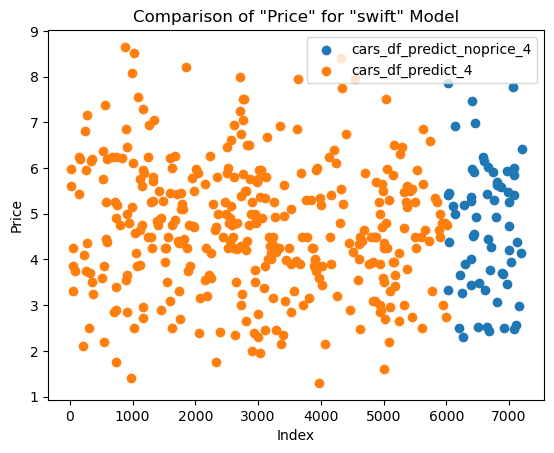

In [361]:
# Filter the data for "swift" in the "Model" column in both variables
df_noprice_swift = cars_df_predict_noprice_4[cars_df_predict_noprice_4['Model'] == 'swift']
df_swift = cars_df_predict_4[cars_df_predict_4['Model'] == 'swift']

# Plotting the scatter plot
plt.scatter(df_noprice_swift.index, df_noprice_swift['Price'], label='cars_df_predict_noprice_4')
plt.scatter(df_swift.index, df_swift['Price'], label='cars_df_predict_4')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Comparison of "Price" for "swift" Model')
plt.legend()
plt.show()

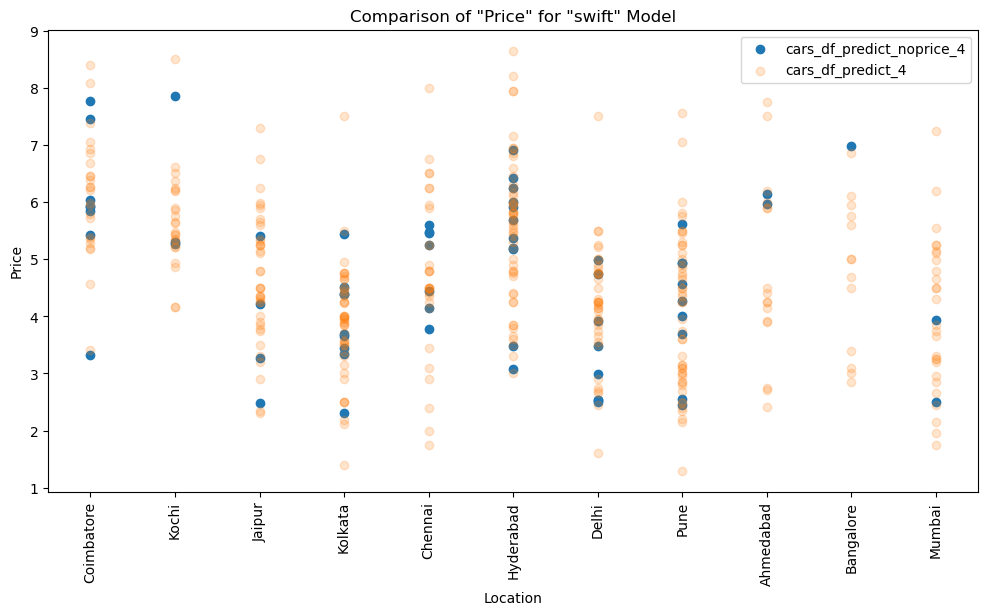

In [366]:
# Filter the data for "swift" in the "Model" column in both variables
df_noprice_swift = cars_df_predict_noprice_4[cars_df_predict_noprice_4['Model'] == 'swift']
df_swift = cars_df_predict_4[cars_df_predict_4['Model'] == 'swift']

plt.figure(figsize=(12, 6))
# Plotting the scatter plot
plt.scatter(df_noprice_swift['Location'], df_noprice_swift['Price'], label='cars_df_predict_noprice_4')
plt.scatter(df_swift['Location'], df_swift['Price'], label='cars_df_predict_4', alpha = 0.2)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Comparison of "Price" for "swift" Model')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

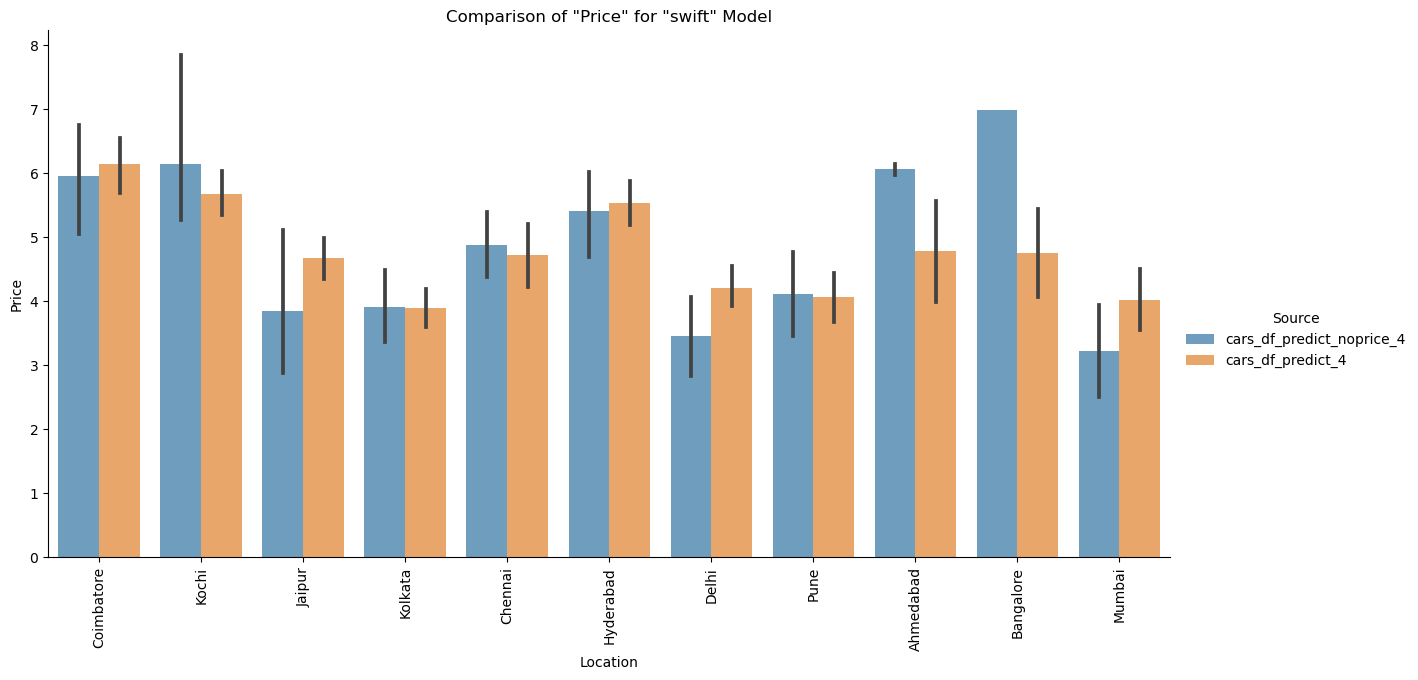

In [376]:
import seaborn as sns

# Filter the data for "swift" in the "Model" column in both variables
df_noprice_swift = cars_df_predict_noprice_4[cars_df_predict_noprice_4['Model'] == 'swift']
df_swift = cars_df_predict_4[cars_df_predict_4['Model'] == 'swift']

# Add a new column to indicate the source dataframe
df_noprice_swift['Source'] = 'cars_df_predict_noprice_4'
df_swift['Source'] = 'cars_df_predict_4'

# Concatenate the two dataframes for plotting
df_combined = pd.concat([df_noprice_swift, df_swift])

# Plotting the bar plot
sns.catplot(x='Location', y='Price', data=df_combined, kind='bar', hue='Source', alpha=0.7, height=6, aspect=2)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Comparison of "Price" for "swift" Model')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


## Model Scores Comparison

In [ ]:
models_test_comp_df = pd.concat([lin_reg_test_scaled_6.T, lasso_reg_tuned.T, dtree_model_train_perf_1.T, dtree_model_train_perf_2.T, 
        forest_model_train_perf_0.T, rforest_model_train_perf_1.T, xgb_model_train_perf.T, xgb_model_train_perf_2.T], axis = 1,)

models_test_comp_df.columns = [
    "Linear Regression",
    "Lasso Regression",
    "Decision Tree Regressor",
    "Tuned Decision Tree Regressor",
    "Random Forest Regressor",
    "Tuned Random Forest Regressor",
    "XGBoost Regressor",
    "XGBoost Regressor Tuned Features"]


In [ ]:
models_test_comp_df.T

## **Conclusions and Recommendations - Milestone**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 


How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Answer**
- After testing all of the models, it seems that the most efficient in everyway is Random Forest. Not only it is much more tolerant of non-linear features, its also tolerant to overfitted values, however explainability is lost in this method.
Linear Regression and Lasso Regression, although with lower scores, provide much more explainability for the data, which might be useful in a situation where some variables might gain relevance in certain situations. For example, if we wanted to tune the model and implement it to the luxury car segment, we could much more easily pick up the variables that would influence those decisons using Linear or lasso regression.
To add to the argument made above, the computational requirements to effectively run Random Forest model are far higher than the Linear And Lasso regression options. Decision Trees do perform better in those terms but lack explainability.
Lasso Regression also provides better robustness to outliers when compared to Linear Regression. It also has the best scores for RMSE and MAE than any other model. 

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**Answer**


- It is  my understanding that in a relatively small dataset such as this, in order to obtain palpable and realistic results, we must perform a vry strong EDA and data Preprocesing. Specifically in this datast, one of the challenges was the amount of missing values and the methods used to solve them. I think the kNN imputer used is testament to how it can impact the results of the dataset. There are no r2 results below 0.83 and RMSE and MAR present very very stron results in Linear and Lasso regression and very good results in Decision trees and random forests.

- From a business perception, it seems that we can conclude that New_price and Power, Engine and Year (in a lesser degree), are the meaningful variables that drive the price. Companies should look for these verifiable variables before adopting a strategy.

- There are several segmets of the markets to choose from if the company does not desire to have a general, more competitors intensive, approach to the business model. 

- Simply based on data analysis, we can find solutions that will maximize the profit margin of the business. Different cities have substatially lower prices for the same products than other. New cost like transportation will come into play, but can be minimized with scale.

### **3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

**Answer**

- Taking everything that was said in the asnwer to question 1, for this model and considering mostly the explainability of the data and the **Balanced** performance scores, I propose the Lasso Regression model. Random Forest would be more powerful but far more computanional intensive. Something that could be solved quite easily with cloud computing or other similar solutions, but for the purpose of this exercise, I am considering the ease of use, after data preprocessing and engineering. Again, one could argue that random forest doens't need the same kind of data preprocessing or feature engineering, but in order to have the best possible model, those would always be necessary. Therefore the answer stands, Lasso Regression is the more manageable solution in this situation in my perspective.

#  **Final Project - Business Strategies and Implementations**

## Executive summary


**Given more time to explore the dataset and the work performed on the Milestone, further analysis was performed and better results achieved by tuning simple aspects of the data and models.**



**Summary of Milestone VS Final Project**

- The Milestone achieved good results in Decision Trees and in Random Forests models, however, upon further feature engineering, XGBoost revealied unbeatable with scores that easily justify some loss on explainability.


- Further data analysis when compared with the Milestone provided valuable insight into some variables that were not considered as relevant before. 


- Comparing to the features used in the Milestone submission, the Final Project used features in a very simple but much more efficient way.


- The creation of the "Car_Class" and "Model" Variables was key to the tuning of the XGBoost model.


- The same data analysis as mentioned above alowed the recommendation for the model implementation to come to mind.


- Other models were tried but were very far from the Tuned XGBoost model scores in every measure. 

## Problem and solution summary 

- After the Milestone, I now consider the biggest challenge to be the capacity to be able to understand the data on a **deep and multidimensional level**


- The fact that "Car_Class" feature is able to explain more than **73%** of the data in impressive to me. The best results I had on the Milestone phase had the best features explaining about **35%** of the predictions.  


- XGBoost with tuned settings achieved very high results of an adjusted r2 of **0.965** and a **MAPE** Score of 10%. 



-  During this Final Project phase, Variables like "NAME" where invaluable. Extracting "Models" from it proved very valuable.


**THE SOLUTION**


In an unexpected turn of events, the **Tuned XGBoost Model** emerged as the most effective solution for addressing this problem. Unlike other regression models employed in this analysis, the Tuned XGBoost Model demonstrates better adaptability to new data, minimizing the need for significant modifications, although the preprocessing must be repeated if the data collection is not adapted. Despite its reduced explainability compared to other models, the Tuned XGBoost Model exhibits exceptional robustness and performs well on test data, demonstrating its capability to handle previously unseen data effectively.

## Recommendations for implementation

Based on the insights and intuition gained from exploratory data analysis (EDA), univariate, bivariate, and multivariate analyses, it is evident that there is substantial price variation for cars across different cities. Leveraging this understanding, a well-implemented predictive model has the potential to identify cars that are undervalued in certain cities and estimate their prices if transported and sold in cities where prices are significantly higher.

This strategic approach capitalizes on the observed price discrepancies among various geographic locations. By accurately predicting car prices in different cities, one can identify lucrative opportunities for arbitrage, where cars purchased in cities with lower prices can be transported to cities with higher prices for resale, maximizing profitability.

An effective implementation of this model involves leveraging the insights gained from comprehensive EDA and rigorous analysis of various factors influencing car prices. The model should incorporate relevant features such as car specifications, brand, mileage, condition, and location, among others. Through careful feature selection and appropriate data preprocessing techniques, the model can capture the intricate relationships between these variables and the corresponding price variations.

Furthermore, it is crucial to employ a robust machine learning algorithms, such as the Tuned XGBoost to train the model on a the dataset comprising car prices across different cities. By utilizing techniques like cross-validation and hyperparameter tuning, the model can be optimized to provide accurate price predictions for various car types and locations.

To effectively utilize the model for arbitrage opportunities, one needs to identify cities with significant price differentials and target cars that demonstrate undervaluation in their current locations. By leveraging the model's predictions, prospective car buyers and sellers can strategically evaluate potential profits by estimating the price difference between the current location and the target city. This information can guide decision-making regarding the transportation and resale of cars, facilitating profitable transactions.

It is important to note that the success of this approach relies on the accuracy and reliability of the predictive model, as well as other factors such as transportation costs and legal considerations.

# Final Project - Exploring Other Options

## PCA and t-SNE

### PCA

In [ ]:
cars_df_7.head()

Scaling the data for PCA

In [ ]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the features data
cars_df_pca_scaled = scaler.fit_transform(cars_df_7)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
cars_df_pca_scaled = pd.DataFrame(cars_df_pca_scaled, index = cars_df_7.index, columns = cars_df_7.columns)

cars_df_pca_scaled.head()

In [ ]:
# Splitting the data

X_pca = cars_df_pca_scaled.drop('Price', axis=1)  # Features 
y_pca = cars_df_pca_scaled['Price']  # Target variable

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train_pca.shape, y_train_pca.shape)
print("Test set shape:", X_test_pca.shape, y_test_pca.shape)

In [ ]:
# Defining the number of principal components to generate
n = X_train_pca.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
X_train_pca = pd.DataFrame(pca1.fit_transform(X_train_pca))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 53), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):
    
    sum = sum + i
    
    if(sum>0.80):
        print("Number of PCs that explain at least 80% variance: ", ix + 1)
        break

In [ ]:
cars_df_pca_scaled_2 = cars_df_pca_scaled.drop(['Price'], axis=1)

In [ ]:
# Making a new dataframe with first 15 principal components as columns and original features as indices
cols = ['PC' + str(i) for i in range(1, 16)]

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:15], 3), index = cars_df_pca_scaled_2.columns, columns = cols)
pc1

In [ ]:
# Create a scatter plot of PC1 vs PC2
plt.scatter(pc1['PC1'], pc1['PC2'])

# Set x-axis label
plt.xlabel('PC1')

# Set y-axis label
plt.ylabel('PC2')

# Set plot title
plt.title('PCA: PC1 vs PC2')

# Show the plot
plt.show()

In [ ]:
# Extract eigenvalues and eigenvectors
eigenvalues = pca1.explained_variance_
eigenvectors = pca1.components_.T

# Compute explained variance ratio
explained_variance_ratio = pca1.explained_variance_ratio_

from tabulate import tabulate

# Transpose eigenvalues and explained variance ratio
eigenvalues_transposed = eigenvalues.reshape(-1, 1).T
explained_variance_ratio_transposed = explained_variance_ratio.reshape(-1, 1).T

# Create table headers
headers = ["Eigenvalue", "Explained Variance Ratio"]

# Create table data
table_data = []
for i in range(len(eigenvalues)):
    table_data.append([eigenvalues[i], explained_variance_ratio[i]])

# Print the transposed table
print(tabulate(table_data, headers=headers, tablefmt="grid"))


# # Print eigenvectors
# print("\nEigenvectors:")
# for i, column in enumerate(cars_df_7.columns):
#     eigenvector_values = [round(value, 2) for value in eigenvectors[:, i]]
#     print("{}: {}".format(column, eigenvector_values))


In [ ]:
# Plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Convert tuples to arrays
y_train_pca = np.array(y_train_pca)
X_train_pca = np.array(X_train_pca)


# Select the first 15 principal components
X_train_pca_selected = X_train_pca[:, :15]


# Add constant to test data
X_test_const_pca = sm.add_constant(X_train_pca_selected)

# Calling the OLS algorithm on the train features and the target variable
ols_model_pca = sm.OLS(y_train_pca, X_test_const_pca)

# Fitting the Model
ols_res_pca = ols_model_pca.fit()

print(ols_res_pca.summary())

# # Get cross-validation RMSE (train set)
# pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
#                                        pc1, 
#                                        y_train_pca, 
#                                        cv=cv, 
#                                        scoring='neg_root_mean_squared_error').mean()


# # Get first 9 principal components of test set
# X_test_pc = pca.transform(X_test_scaled)

# # Predict on test data
# preds = lin_reg_pc.predict(X_test_pc)
# pcr_score_test = mean_squared_error(y_test, preds, squared=False)

In [ ]:
cars_df_7

In [ ]:
cars_df_pca_dropped = cars_df_7.drop(cars_df_7.columns[cars_df_7.columns.str.contains('Location_|Brand_|Fuel_|Transmission_|Owner')], axis=1)

In [ ]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the features data
cars_df_pca_scaled_2 = scaler.fit_transform(cars_df_pca_dropped)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
cars_df_pca_scaled_2 = pd.DataFrame(cars_df_pca_scaled_2, index = cars_df_pca_dropped.index, columns = cars_df_pca_dropped.columns)

cars_df_pca_scaled_2.head()

In [ ]:
# Splitting the data

X_pca_2 = cars_df_pca_scaled_2.drop('Price', axis=1)  # Features 
y_pca_2 = cars_df_pca_scaled_2['Price']  # Target variable

X_train_pca_1, X_test_pca_1, y_train_pca_1, y_test_pca_1 = train_test_split(X_pca_2, y_pca_2, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train_pca_1.shape, y_train_pca_1.shape)
print("Test set shape:", X_test_pca_1.shape, y_test_pca_1.shape)

In [ ]:
# Defining the number of principal components to generate
n_1 = X_train_pca_1.shape[1]

# Finding principal components for the data
pca2 = PCA(n_components = n_1, random_state = 1)
X_train_pca_1 = pd.DataFrame(pca2.fit_transform(X_train_pca_1))

# The percentage of variance explained by each principal component
exp_var2 = pca2.explained_variance_ratio_

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (8, 8))

plt.plot(range(0, 7), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
y_train_pca_df = pd.DataFrame(y_train_pca_1)

In [ ]:
print(type(y_train_pca_df)) 
print(type(X_test_const_pca_1)) 
print(type(X_train_pca_selected_1)) 

In [ ]:
# Assuming X_train_pca_selected_1 is a pandas DataFrame
X_train_array = X_train_pca_selected_1.values

# Assuming y_train_pca_df is a pandas DataFrame with a single column
y_train_array = y_train_pca_df.iloc[:, 0].values

# Add constant to the feature array
X_train_const = sm.add_constant(X_train_array)

# Perform OLS regression
ols_model = sm.OLS(y_train_array, X_train_const)
ols_results = ols_model.fit()

# Print the results summary
print(ols_results.summary())

In [ ]:
print(type(X_test_const_pca_1))
print(type(X_train_pca_selected_1))
print(type(y_train_pca_df))





In [ ]:
# Select the first 4 principal components
X_train_pca_selected_1 = X_train_pca_1.iloc[:, :4]

# Add constant to test data
X_train_const_pca_1 = sm.add_constant(X_train_pca_selected_1)

# Reset indices of X_test_const_pca_1 and y_train_pca_df
#X_test_const_pca_1.reset_index(drop=True, inplace=True)
#y_train_pca_df.reset_index(drop=True, inplace=True)

# Calling the OLS algorithm on the train features and the target variable
ols_model_pca = sm.OLS(y_train_pca_df, X_train_const_pca_1)

# Fitting the Model
ols_res_pca_1 = ols_model_pca.fit()

print(ols_res_pca_1.summary())

In [ ]:
# Apply PCA transformation on the test data
X_test_pca_1 = pca2.transform(X_test_pca_1)

# Select the same principal components as used in the training data
X_test_pca_selected_1 = X_test_pca_1[:, :4]

# Add constant to the test data
X_test_const_pca_1 = sm.add_constant(X_test_pca_selected_1)

# Make predictions on the test data
y_pred_pca = ols_res_pca_1.predict(X_test_const_pca_1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions on the test data
y_pred_pca = ols_res_pca_1.predict(X_test_const_pca_1)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_pca_1, y_pred_pca)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_pca_1, y_pred_pca)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)


In [ ]:
y_test_pca_1.reset_index(drop=True, inplace=True)

# test predictions
test_predictions = ols_res_pca_1.predict(X_test_const_pca_1)

In [ ]:
# Reset the indices of y_test_pca_1
y_test_pca_1.reset_index(drop=True, inplace=True)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test_pca_1, test_predictions)

rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test_pca_1, test_predictions)

# Print the scores
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

## Exploring Models with Market Segmentation

In [ ]:
# Creating a new dataframe to create market segments based on price like we did in EDA.

cars_df_class_2 = cars_df_7
pd.reset_option('display.max_rows') #revert to the default settings of rows shown

cars_df_class_2['Car_Class'] = pd.cut(cars_df_class_2['Price'],[-np.inf,4.99,9.99,20.99,44.99,74.99,np.inf],
                       labels=["Class1","Class2","Class3","Class4","Class5","Class6"])

cars_df_class_2.reset_index(drop=True, inplace=True)
cars_df_class_2

In [ ]:
cars_df_class_2.drop(['level_0', 'index'], axis = 1)

**Choosing a Middle market segment (Class 3) to test the model.**

In [ ]:
class3_df = cars_df_class_2[cars_df_class_2['Car_Class'] == 'Class3']

In [ ]:
class3_df.drop(['level_0', 'index'], axis = 1, inplace = True)
class3_df

In [ ]:
class3_df.reset_index(drop = True, inplace = True)
class3_df

In [ ]:
class3_df.drop(['Car_Class'], axis = 1, inplace = True)

In [ ]:
# Splitting the data for Class 3 cars.

X = class3_df.drop('Price', axis=1)  # Features 
y = class3_df['Price']  # Target variable

X_train_class3, X_test_class3, y_train_class3, y_test_class3 = train_test_split(X, y, test_size=0.2, random_state=42)


# checking the splitted datasets

print("Training set shape:", X_train_class3.shape, y_train_class3.shape)
print("Test set shape:", X_test_class3.shape, y_test_class3.shape)

In [ ]:
# Fittig the first Random Forest model
forest_class3 = RandomForestRegressor(random_state=1)
forest_class3.fit(X_train_class3, y_train_class3)

In [ ]:
# Getting performance metrics for the model
forest_model_train_perf_class3_0 = model_performance_regression(forest_class3, X_test_class3, y_test_class3)
forest_model_train_perf_class3_0

**Feature Importance**

In [ ]:
# Plot the feature importance

importances = forest_class3.feature_importances_

columns = X_test_class3.columns

importance_df_1 = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df_1.Importance,importance_df_1.index)

In [ ]:
y_class_pred = forest_class3.predict(X_test_class3)

In [ ]:
# Scatter Plot to show the comparison of the distribution between the real values of the test data vs the pedicted data
plt.scatter(X_test_class3['Kilometers_Driven'], y_test_class3, color='red', label='Real')
plt.scatter(X_test_class3['Kilometers_Driven'], y_class_pred, color='blue', label='Predicted')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Comparison of Real Price vs Predicted Price')
plt.legend()
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_class3, y_class_pred)
plt.plot([min(y_test_class3), max(y_test_class3)], [min(y_test_class3), max(y_test_class3)], 'k--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
# Choose the type of regressor
rforest_estimator_class = RandomForestRegressor(random_state = 1)


# Hyper parameters range intialization for tuning 

parameters_class={"max_depth" : [None,1,5],
           "min_samples_leaf":[1,3,5],
           "min_weight_fraction_leaf":[0.0,0.3,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,30,50],
             "n_jobs": [-1]}


# Run the grid search
gridCV_class = GridSearchCV(rforest_estimator_class, param_grid = parameters_class, scoring = 'r2', cv = 2)

# Fitting the grid search on the train data
gridCV_class = gridCV_class.fit(X_train_class3, y_train_class3)

# best hyperparameters 
gridCV_class.best_params_

In [ ]:
  # Set the classifier to the best combination of parameters
rforest_estimator_class = gridCV_class.best_estimator_

# Fit the best estimator to the data
rforest_estimator_class.fit(X_train_class3, y_train_class3)

In [ ]:
# Getting performance metrics for the model
forest_model_train_perf_class3_1 = model_performance_regression(rforest_estimator_class, X_test_class3, y_test_class3)
forest_model_train_perf_class3_1

## LightGBM

# .CSV Exports

In [ ]:
cars_df_6[['Price', 'Year','Location']].to_csv(r'C:\Users\franc\Documents\Data_Science\Jupyter_Notebook\ADSP_MIT\07_Capstone_project\ML\Exports\Price_Location.csv', index=False)

In [ ]:
cars_df_6[cars_df_6['Mileage'] == 0]